# Mental Health in Tech Survey

## Data transformations

The data used herein was sourced from:<br>
https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey/data

The `mhit` project is composed of x notebooks:<br>**A. Data transformations (THIS NOTEBOOK)**<br> 
Because the data is unwieldy in its original form, before it was used for analysis and insights, I transformed it as follows:<br> 1. Created a unique id for each survey respondent (`rid`) and mapped all responses to this id;<br>2. Mapped all survey questions to their unique identifiers (`Q1`-`Q63`) and used the question identifiers as compact column headers.<br>3. Structured responses referencing conditions by first mapping all conditions to their own unique identifier (`C1` - `C51`) and then mapping each respondent to all of the conditions they listed as one they either currently have or one they have been diagnosed with.<br>4. Similarly, mapped all job positions to unique identifiers (`P1`-`P15`) and all respondents to each position they listed as part of their current responsibilities.<br>5. Finally, the responses are captured as text and while most represent ordinal or quantifiable information, further analysis required mapping of the text to numeric values *(e.g. "Yes" = 1 / "No" = 0 or "Yes, all" = 1, "Some of them" = 0.5, "No, none" = 0)*<br>
**B. EDA and additional data cleaning**<br>**C. Analysis and hypothesis testing**<br>**D. NLP and Sentiment Analysis**<br>

### Library imports, notebook settings, and data files

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
import uuid

In [ ]:
pd.set_option('display.max_columns', None)
%config InlineBackend.figure_format = 'retina'

In [3]:
mhit = pd.read_csv('archive/mental-heath-in-tech-2016_20161114.csv')
mhit.sample()

Are you self-employed?  \
0                       0   
1                       0   
2                       0   
3                       1   
4                       0   

  How many employees does your company or organization have?  \
0                                             26-100           
1                                               6-25           
2                                               6-25           
3                                                NaN           
4                                               6-25           

   Is your employer primarily a tech company/organization?  \
0                                                1.0         
1                                                1.0         
2                                                1.0         
3                                                NaN         
4                                                0.0         

   Is your primary role within your company related to tech/IT?  \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                                NaN              
4                                                1.0              

  Does your employer provide mental health benefits as part of healthcare coverage?  \
0                    Not eligible for coverage / N/A                                  
1                                                 No                                  
2                                                 No                                  
3                                                NaN                                  
4                                                Yes                                  

  Do you know the options for mental health care available under your employer-provided coverage?  \
0                                                NaN                                                
1                                                Yes                                                
2                                                NaN                                                
3                                                NaN                                                
4                                                Yes                                                

  Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
0                                                 No                                                                                       
1                                                Yes                                                                                       
2                                                 No                                                                                       
3                                                NaN                                                                                       
4                                                 No                                                                                       

  Does your employer offer resources to learn more about mental health concerns and options for seeking help?  \
0                                                 No                                                            
1                                                Yes                                                            
2                                                 No                                                            
3                                                NaN                                                            
4                                                 No                                                            

  Is your anonymi

In [5]:
mhit.shape

(1433, 63)

## Data transformations

Because the data is unwieldy in its original form, before it was used for analysis and insights, I transformed it as follows:<br> 1. Created a unique id for each survey respondent (`rid`) and mapped all responses to this id;<br>2. Mapped all survey questions to their unique identifiers (`Q1`-`Q63`) and used the question identifiers as compact column headers.<br>3. Structured responses referencing conditions by first mapping all conditions to their own unique identifier (`C1` - `C51`) and then mapping each respondent to all of the conditions they listed as one they either currently have or one they have been diagnosed with.<br>4. Similarly, mapped all job positions to unique identifiers (`P1`-`P15`) and all respondents to each position they listed as part of their current responsibilities.<br>5. Finally, the responses are captured as text and while most represent ordinal or quantifiable information, further analysis required mapping of the text to numeric values *(e.g. "Yes" = 1 / "No" = 0 or "Yes, all" = 1, "Some of them" = 0.5, "No, none" = 0)*

#### 2.1. response identifiers

In [ ]:
identifiers = [str(uuid.uuid4()) for i in mhit.index]

mhit['rid'] = identifiers
mhit.set_index('rid', inplace = True)

mhit.to_csv('all_raw.csv', index_label = 'rid')

#### 2.2. question identifiers

In [48]:
mhit_question_ids = {c: f"Q{i+1}" for i, c in enumerate(mhit.columns)}
mhit_question_ids_rev = {i: q for (q, i) in mhit_question_ids.items()}

In [1391]:
all_question_ids = pd.DataFrame.from_dict({q: [mhit_question_ids[q]] for q in mhit.columns}).T.reset_index().rename({'index': 'question',
                                                                                           0: 'qid'}, axis = 1)
all_question_ids.head(3)

In [571]:
all_question_ids.to_csv('all_question_ids.csv',  index = 0)

#### 2.3. conditions: unstructured --> structured

In [ ]:
condition_qs = responses.iloc[:, 43:48]
condition_qs.columns

In [ ]:
cs = []
for q in condition_qs.select_dtypes('O').columns:
    for c in condition_qs[q].dropna().unique():
        cs += c.split('|')

Counter(cs).most_common(10)

In [328]:
condition_qs.groupby('Do you currently have a mental health disorder?')['If yes, what condition(s) have you been diagnosed with?'].nunique()

Do you currently have a mental health disorder?
0.0      0
0.5      0
1.0    128
Name: If yes, what condition(s) have you been diagnosed with?, dtype: int64

In [329]:
condition_qs.groupby('Do you currently have a mental health disorder?')['If maybe, what condition(s) do you believe you have?'].nunique()

Do you currently have a mental health disorder?
0.0     0
0.5    99
1.0     0
Name: If maybe, what condition(s) do you believe you have?, dtype: int64

In [332]:
condition_qs.groupby('Have you been diagnosed with a mental health condition by a medical professional?')['If so, what condition(s) were you diagnosed with?'].nunique()

Have you been diagnosed with a mental health condition by a medical professional?
0      0
1    116
Name: If so, what condition(s) were you diagnosed with?, dtype: int64

In [333]:
condition_qs[condition_qs['Do you currently have a mental health disorder?']!=
            condition_qs['Have you been diagnosed with a mental health condition by a medical professional?']].shape

(472, 5)

In [341]:
condition_qs.groupby('Have you been diagnosed with a mental health condition by a medical professional?')['Do you currently have a mental health disorder?'].nunique()

Have you been diagnosed with a mental health condition by a medical professional?
0    3
1    3
Name: Do you currently have a mental health disorder?, dtype: int64

In [334]:
condition_qs[condition_qs['Do you currently have a mental health disorder?']!=
            condition_qs['Have you been diagnosed with a mental health condition by a medical professional?']].sample()

Do you currently have a mental health disorder?  \
811                                              0.5   

    If yes, what condition(s) have you been diagnosed with?  \
811                                                NaN        

    If maybe, what condition(s) do you believe you have?  \
811  Anxiety Disorder (Generalized, Social, Phobia,...     

     Have you been diagnosed with a mental health condition by a medical professional?  \
811                                                  0                                   

    If so, what condition(s) were you diagnosed with?  
811                                               NaN

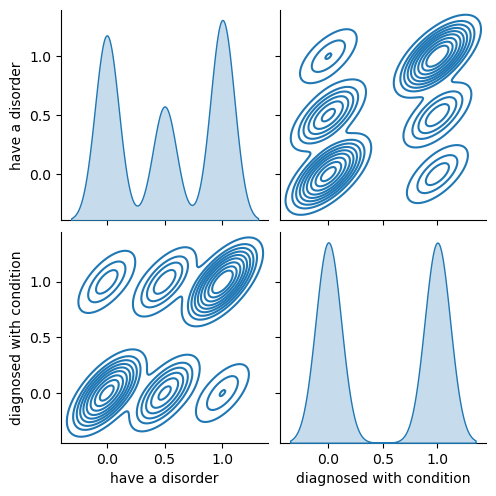

In [354]:
sns.pairplot(data = condition_qs.rename({'Do you currently have a mental health disorder?': 'have a disorder',
                                         'Have you been diagnosed with a mental health condition by a medical professional?': 'diagnosed with condition'}, axis = 1),
             x_vars = ['have a disorder', 'diagnosed with condition' ], kind = 'kde');

In [318]:
condition_qs[condition_qs['If yes, what condition(s) have you been diagnosed with?']!=
            condition_qs['If so, what condition(s) were you diagnosed with?']].shape

(1064, 3)

In [317]:
condition_qs[condition_qs['If yes, what condition(s) have you been diagnosed with?']!=
            condition_qs['If so, what condition(s) were you diagnosed with?']].sample()

If yes, what condition(s) have you been diagnosed with?  \
1405                                                NaN        

     If maybe, what condition(s) do you believe you have?  \
1405  Personality Disorder (Borderline, Antisocial, ...     

      If so, what condition(s) were you diagnosed with?  
1405  Mood Disorder (Depression, Bipolar Disorder, etc)

In [355]:
condition_qs[condition_qs['If yes, what condition(s) have you been diagnosed with?']!=
            condition_qs['If so, what condition(s) were you diagnosed with?']].sample()

Do you currently have a mental health disorder?  \
174                                              1.0   

    If yes, what condition(s) have you been diagnosed with?  \
174  Anxiety Disorder (Generalized, Social, Phobia,...        

    If maybe, what condition(s) do you believe you have?  \
174                                                NaN     

     Have you been diagnosed with a mental health condition by a medical professional?  \
174                                                  1                                   

     If so, what condition(s) were you diagnosed with?  
174  Anxiety Disorder (Generalized, Social, Phobia,...

In [363]:
ucs = []
for cs in (list(condition_qs['If yes, what condition(s) have you been diagnosed with?'].unique())
               +list(condition_qs['If maybe, what condition(s) do you believe you have?'].unique())
               +list(condition_qs['If so, what condition(s) were you diagnosed with?'].unique())):
    if isinstance(cs, str):
        ucs += cs.split('|')

Counter(ucs).most_common(10)

[('Mood Disorder (Depression, Bipolar Disorder, etc)', 198),
 ('Anxiety Disorder (Generalized, Social, Phobia, etc)', 179),
 ('Attention Deficit Hyperactivity Disorder', 94),
 ('Post-traumatic Stress Disorder', 87),
 ('Personality Disorder (Borderline, Antisocial, Paranoid, etc)', 75),
 ('Obsessive-Compulsive Disorder', 66),
 ('Stress Response Syndromes', 60),
 ('Substance Use Disorder', 60),
 ('Addictive Disorder', 57),
 ('Eating Disorder (Anorexia, Bulimia, etc)', 38)]

In [541]:
current_conditions = pd.DataFrame(index = mhit.index, columns = list(Counter(ucs).keys()), 
                        data = np.array([[0 if (isinstance(mhit.loc[i, 'If yes, what condition(s) have you been diagnosed with?'], float) and 
                                                isinstance(mhit.loc[i, 'If maybe, what condition(s) do you believe you have?'], float))
                                          else 1 if c in str(mhit.loc[i, 'If yes, what condition(s) have you been diagnosed with?'])
                                          else 0.5 if c in str(mhit.loc[i, 'If maybe, what condition(s) do you believe you have?'])
                                          else 0
                                          for c in list(Counter(ucs).keys())] for i in mhit.index]))

In [540]:
diagnosed_conditions = pd.DataFrame(index = mhit.index, columns = list(Counter(ucs).keys()), 
                        data = np.array([[0 if isinstance(mhit.loc[i, 'If so, what condition(s) were you diagnosed with?'], float)  
                                          else 1 if c in mhit.loc[i, 'If so, what condition(s) were you diagnosed with?']
                                          else 0
                                          for c in list(Counter(ucs).keys())] for i in mhit.index]))

In [ ]:
i = np.random.choice(mhit[~mhit['If so, what condition(s) were you diagnosed with?'].isna()].index)

current_conditions.loc[i, current_conditions.columns[current_conditions.loc[i]>0]]

In [394]:
diagnosed_conditions.loc[i, diagnosed_conditions.columns[diagnosed_conditions.loc[i]>0]]

Anxiety Disorder (Generalized, Social, Phobia, etc)    1
Eating Disorder (Anorexia, Bulimia, etc)               1
Name: 467, dtype: int64

In [543]:
diagnosed_conditions.sample()

Anxiety Disorder (Generalized, Social, Phobia, etc)  \
1123                                                  0     

      Mood Disorder (Depression, Bipolar Disorder, etc)  \
1123                                                  0   

      Stress Response Syndromes  Substance Use Disorder  \
1123                          0                       0   

      Obsessive-Compulsive Disorder  Eating Disorder (Anorexia, Bulimia, etc)  \
1123                              0                                         0   

      Personality Disorder (Borderline, Antisocial, Paranoid, etc)  \
1123                                                  0              

      Attention Deficit Hyperactivity Disorder  Addictive Disorder  \
1123                                         0                   0   

      Post-traumatic Stress Disorder  \
1123                               0   

      Pervasive Developmental Disorder (Not Otherwise Specified)  \
1123                                                  0            

      Seasonal Affective Disorder  Burn out  PDD-NOS  Dissociative Disorder  \
1123                            0         0        0                      0   

      Depression  Autism (Asperger's)  Traumatic Brain Injury  \
1123           0                    0                       0   

      Gender Dysphoria  Asperges  PTSD (undiagnosed)  \
1123                 0         0                   0   

      Psychotic Disorder (Schizophrenia, Schizoaffective, etc)  Autism  \
1123                                                  0              0   

      Sexual addiction  \
1123                 0   

      Combination of physical impairment (strongly near-sighted) with a possibly mental one (MCD / "ADHD", though its actually a stimulus filtering impairment)  \
1123                                                  0                                                                                                           

      Sleeping Disorder  \
1123                  0   

      I haven't been formally diagnosed, so I felt uncomfortable answering, but Social Anxiety and Depression.  \
1123                                                  0                                                          

      Autism Spectrum Disorder  Transgender  Intimate Disorder  \
1123                         0            0                  0   

      ADD (w/o Hyperactivity)  Schizotypal Personality Disorder  \
1123                        0                                 0   

      Autism spectrum disorder  Suicidal Ideation  We're all hurt, right?!  \
1123                         0                  0                        0   

      Burnout  Gender Identity Disorder  Tinnitus  Depersonalisation  \
1123        0                         0         0                  0   

      post-partum / anxiety  Asperger Syndrome  Asperger's  \
1123                      0                  0           0   

      depersonalization disorder  PDD-NOS (see above)  \
1123                           0                    0   

      Autism - while not a "mental illness", still greatly affects how I handle anxiety  \
1123                                                  0                                   

      Attention Deficit Disorder  \
1123                           0   

      MCD (when it was diagnosed, the ultra-mega "disorder" ADHD didn't exist yet)  \
1123                                                  0                              

      posttraumatic stress disourder  \
1123                               0   

      attention deficit disorder (but not the hyperactive version)  Aspergers  \
1123                                                  0                     0   

      autism spectrum disorder                            identifier  
1123                         0  b3f30091-4d87-407f-85e7-d2f562c0b7e8

In [544]:
current_conditions.sample()

Anxiety Disorder (Generalized, Social, Phobia, etc)  \
563                                                0.0     

     Mood Disorder (Depression, Bipolar Disorder, etc)  \
563                                                0.0   

     Stress Response Syndromes  Substance Use Disorder  \
563                        0.0                     0.0   

     Obsessive-Compulsive Disorder  Eating Disorder (Anorexia, Bulimia, etc)  \
563                            0.0                                       0.0   

     Personality Disorder (Borderline, Antisocial, Paranoid, etc)  \
563                                                0.0              

     Attention Deficit Hyperactivity Disorder  Addictive Disorder  \
563                                       0.0                 0.0   

     Post-traumatic Stress Disorder  \
563                             0.0   

     Pervasive Developmental Disorder (Not Otherwise Specified)  \
563                                                0.0            

     Seasonal Affective Disorder  Burn out  PDD-NOS  Dissociative Disorder  \
563                          0.0       0.0      0.0                    0.0   

     Depression  Autism (Asperger's)  Traumatic Brain Injury  \
563         0.0                  0.0                     0.0   

     Gender Dysphoria  Asperges  PTSD (undiagnosed)  \
563               0.0       0.0                 0.0   

     Psychotic Disorder (Schizophrenia, Schizoaffective, etc)  Autism  \
563                                                0.0            0.0   

     Sexual addiction  \
563               0.0   

     Combination of physical impairment (strongly near-sighted) with a possibly mental one (MCD / "ADHD", though its actually a stimulus filtering impairment)  \
563                                                0.0                                                                                                           

     Sleeping Disorder  \
563                0.0   

     I haven't been formally diagnosed, so I felt uncomfortable answering, but Social Anxiety and Depression.  \
563                                                0.0                                                          

     Autism Spectrum Disorder  Transgender  Intimate Disorder  \
563                       0.0          0.0                0.0   

     ADD (w/o Hyperactivity)  Schizotypal Personality Disorder  \
563                      0.0                               0.0   

     Autism spectrum disorder  Suicidal Ideation  We're all hurt, right?!  \
563                       0.0                0.0                      0.0   

     Burnout  Gender Identity Disorder  Tinnitus  Depersonalisation  \
563      0.0                       0.0       0.0                0.0   

     post-partum / anxiety  Asperger Syndrome  Asperger's  \
563                    0.0                0.0         0.0   

     depersonalization disorder  PDD-NOS (see above)  \
563                         0.0                  0.0   

     Autism - while not a "mental illness", still greatly affects how I handle anxiety  \
563                                                0.0                                   

     Attention Deficit Disorder  \
563                         0.0   

     MCD (when it was diagnosed, the ultra-mega "disorder" ADHD didn't exist yet)  \
563                                                0.0                              

     posttraumatic stress disourder  \
563                             0.0   

     attention deficit disorder (but not the hyperactive version)  Aspergers  \
563                                                0.0                   0.0   

     autism spectrum disorder                            identifier  
563                       0.0  5b03c76d-b1c6-496d-88b6-74370b581f6d

In [546]:
all(current_conditions.columns == diagnosed_conditions.columns)

True

In [ ]:
condition_ids = {c: f"C{i+1}" for i, c in enumerate(current_conditions.columns[:-1])}

condition_ids['identifier'] = 'rid'

In [549]:
pd.DataFrame.from_dict({c: [condition_ids[c]] for c in current_conditions}).T.reset_index().rename({'index': 'condition',
                                                                                           0: 'cid'}, axis = 1).head(3)#.to_csv('all_question_ids', index = 0)

condition cid
0  Anxiety Disorder (Generalized, Social, Phobia,...  C1
1  Mood Disorder (Depression, Bipolar Disorder, etc)  C2
2                          Stress Response Syndromes  C3

In [551]:
current_conditions.columns = [condition_ids[c] for c in current_conditions.columns]
current_conditions['rid'] = mhit.index
current_conditions.set_index('rid', inplace = True)
diagnosed_conditions.columns = [condition_ids[c] for c in diagnosed_conditions.columns]
diagnosed_conditions['rid'] = mhit.index
diagnosed_conditions.set_index('rid', inplace = True)

In [552]:
diagnosed_conditions.sample()

C1  C2  C3  C4  C5  C6  C7  C8  C9  C10  C11  C12  C13  C14  C15  C16  \
1370   1   1   0   0   0   0   0   1   0    0    0    0    0    0    0    1   

      C17  C18  C19  C20  C21  C22  C23  C24  C25  C26  C27  C28  C29  C30  \
1370    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

      C31  C32  C33  C34  C35  C36  C37  C38  C39  C40  C41  C42  C43  C44  \
1370    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

      C45  C46  C47  C48  C49  C50  C51                                   rid  
1370    0    0    0    0    0    0    0  882c5d5a-f072-4cd8-8797-3b44d930b6cb

In [553]:
current_conditions.sample()

C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12  C13  C14  \
144  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   

     C15  C16  C17  C18  C19  C20  C21  C22  C23  C24  C25  C26  C27  C28  \
144  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     C29  C30  C31  C32  C33  C34  C35  C36  C37  C38  C39  C40  C41  C42  \
144  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     C43  C44  C45  C46  C47  C48  C49  C50  C51  \
144  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                                      rid  
144  0500eed3-028f-4b6f-80ec-2c012bc8e9ba

In [ ]:
diagnosed_conditions.to_csv('current_conditions_w_ids.csv', index_label = 'rid')
current_conditions.to_csv('diagnosed_conditions_w_ids.csv', index_label = 'rid')

#### 2.4. positions: unstructured --> structured

In [35]:
demo['Which of the following best describes your work position?'].nunique()

264

In [36]:
demo['Which of the following best describes your work position?'] = demo['Which of the following best describes your work position?'].apply(lambda x: x.replace('|', '/'))

In [37]:
(demo['Which of the following best describes your work position?'].value_counts().cumsum()/demo.shape[0]).head(20)

Which of the following best describes your work position?
Back-end Developer                                             0.183531
Front-end Developer                                            0.270761
Other                                                          0.348918
Supervisor/Team Lead                                           0.396371
Back-end Developer/Front-end Developer                         0.438939
DevOps/SysAdmin                                                0.476622
One-person shop                                                0.511514
Executive Leadership                                           0.543615
Front-end Developer/Back-end Developer                         0.571528
Support                                                        0.595255
Dev Evangelist/Advocate                                        0.614794
Designer                                                       0.634334
Supervisor/Team Lead/Back-end Developer                        0.647592
Front-

In [38]:
positions = []
for p in mhit['Which of the following best describes your work position?'].apply(lambda x: x.replace('|', '/')).unique():
    sep = ['/' if '/' in p else '']
    if sep[0] != '':
        positions+=(p.split(sep[0]))
    else:
        positions.append(p)

unique_positions = list(set(positions))
len(unique_positions)

15

In [39]:
Counter(positions)

Counter({'Back-end Developer': 174,
         'Front-end Developer': 142,
         'Supervisor': 113,
         'Team Lead': 113,
         'DevOps': 104,
         'SysAdmin': 104,
         'Support': 94,
         'One-person shop': 76,
         'Designer': 72,
         'Other': 59,
         'Dev Evangelist': 56,
         'Advocate': 56,
         'Executive Leadership': 50,
         'Sales': 28,
         'HR': 8})

In [40]:
positions = pd.DataFrame(index = demo.index, columns = unique_positions, 
                        data = np.array([[p in mhit.loc[i, 'Which of the following best describes your work position?']
                                          for p in unique_positions] for i in demo.index]))

In [529]:
positions.sample()

Executive Leadership  Advocate  Supervisor  Front-end Developer  \
1084                 False     False       False                False   

      Support  One-person shop     HR  Back-end Developer  Team Lead  \
1084    False            False  False                True      False   

      Dev Evangelist  Designer  Other  Sales  DevOps  SysAdmin  \
1084           False     False  False  False   False     False   

                                identifier  
1084  4a86bf1a-7456-4de3-b684-b89d39da2d8d

In [530]:
position_ids = {c: f"P{i+1}" for i, c in enumerate(positions.columns[:-1])}

In [533]:
pd.DataFrame.from_dict({q: [position_ids[q]] for q in positions}).T.reset_index().rename({'index': 'position',
                                                                                           0: 'pid'}, axis = 1).head(3)#.to_csv('all_question_ids', index = 0)

position pid
0  Executive Leadership  P1
1              Advocate  P2
2            Supervisor  P3

In [ ]:
pd.DataFrame.from_dict({q: [position_ids[q]] for q in positions}).T.reset_index().rename({'index': 'position',
                                                                                           0: 'pid'}, axis = 1).to_csv('all_position_ids.csv', 
                                                                                                                       index = 0)
positions.index = mhit.index

positions.columns = [position_ids[c] for c in positions.columns]

In [536]:
positions.sample()

P1    P2     P3    P4    P5     P6     P7    P8     P9   P10    P11  \
573  False  True  False  True  True  False  False  True  False  True  False   

       P12    P13    P14    P15                                   rid  
573  False  False  False  False  2fb57af1-2bec-4f8b-a571-238712cfa708

In [1381]:
positions.to_csv('positions_w_ids.csv', index_label = 'rid')

#### 2.5. survey responses: qualitative --> quantitative

In [1603]:
responses = mhit.drop(demo.columns, axis = 1)

responses.sample()

Does your employer provide mental health benefits as part of healthcare coverage?  \
rid                                                                                                                      
5e59b3a5-b739-4823-9eef-9555b5ae9859                                                                               Yes   

                                     Do you know the options for mental health care available under your employer-provided coverage?  \
rid                                                                                                                                    
5e59b3a5-b739-4823-9eef-9555b5ae9859                                                                                              No   

                                     Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
rid                                                                                                                                                                           
5e59b3a5-b739-4823-9eef-9555b5ae9859                                                                                                                                     No   

                                     Does your employer offer resources to learn more about mental health concerns and options for seeking help?  \
rid                                                                                                                                                
5e59b3a5-b739-4823-9eef-9555b5ae9859                                                                                                I don't know   

                                     Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?  \
rid                                                                                                                                                                                   
5e59b3a5-b739-4823-9eef-9555b5ae9859                                                                                                                                            Yes   

                                     If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:  \
rid                                                                                                                                                
5e59b3a5-b739-4823-9eef-9555b5ae9859                                                                                              Very difficult   

                                     Do you think that discussing a mental health disorder with your employer would have negative consequences?  \
rid                                                                                                                                               
5e59b3a5-b739-4823-9eef-9555b5ae9859                                                                                                         No   

                                     Do you think that discussing a physical health issue with your employer would have negative consequences?  \
rid                                                                                                                                              
5e59b3a5-b739-4823-9eef-9555b5ae9859                                                                                                        No   

                                     Would you feel comfortable discussing a mental health disorder with your coworkers?  \
rid                                                                                                                        
5e59b3a5-b739-4823-9eef-9555b5ae9859                                                                                  No   

                                     Woul

In [199]:
for i, q in enumerate(responses.columns):
    print(f"{i+1}. {q}")

1. Does your employer provide mental health benefits as part of healthcare coverage?
2. Do you know the options for mental health care available under your employer-provided coverage?
3. Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
4. Does your employer offer resources to learn more about mental health concerns and options for seeking help?
5. Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
6. If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
7. Do you think that discussing a mental health disorder with your employer would have negative consequences?
8. Do you think that discussing a physical health issue with your employer would have negative consequences?
9. Would you feel comfortable discussing a mental health disorder with your coworkers?
10. 

In [267]:
Counter(responses.drop(conditions.columns, axis = 1).dtypes)

Counter({dtype('O'): 44, dtype('float64'): 2, dtype('int64'): 2})

In [396]:
responses.drop(conditions.columns, axis = 1).select_dtypes(exclude = 'O').sample(3)

Does your employer provide mental health benefits as part of healthcare coverage?  \
602                                                NaN                                   
637                                                1.0                                   
200                                                1.0                                   

     Do you know the options for mental health care available under your employer-provided coverage?  \
602                                                NaN                                                 
637                                                1.0                                                 
200                                                1.0                                                 

     Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
602                                                NaN                                                                                        
637                                                0.0                                                                                        
200                                                0.0                                                                                        

     Does your employer offer resources to learn more about mental health concerns and options for seeking help?  \
602                                                NaN                                                             
637                                                0.0                                                             
200                                                1.0                                                             

     Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?  \
602                                                NaN                                                                                                
637                                                0.5                                                                                                
200                                                1.0                                                                                                

     If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:  \
602                                                NaN                                                             
637                                               0.25                                                             
200                                               0.75                                                             

     Do you think that discussing a mental health disorder with your employer would have negative consequences?  \
602                                                NaN                                                            
637                                                0.5                                                            
200                                                0.5                                                            

     Do you think that discussing a physical health issue with your employer would have negative consequences?  \
602                                                NaN                                                           
637                                                0.0                                                           
200                                                0.0                                                           

     Would you feel comfortable discussing a mental health disorder with your coworkers?  \
602                                                NaN                                     
637              

In [196]:
responses['Does your employer offer resources to learn more about mental health concerns and options for seeking help?'].unique()

array(['No', 'Yes', nan, "I don't know"], dtype=object)

In [264]:
responses["If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:"].unique()

array(['Very easy', 'Somewhat easy', 'Neither easy nor difficult', nan,
       'Very difficult', 'Somewhat difficult', "I don't know"],
      dtype=object)

In [265]:
easy_diff = {'Very easy': 0, 'Somewhat easy': 0.25, 'Neither easy nor difficult': 0.5,
       'Very difficult': 1, 'Somewhat difficult': 0.75, "I don't know": np.nan}

In [266]:
responses['If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:'] = responses['If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:'].map(easy_diff)

In [274]:
responses['How willing would you be to share with friends and family that you have a mental illness?'].unique()

array(['Somewhat open', 'Neutral',
       'Not applicable to me (I do not have a mental illness)',
       'Very open', 'Not open at all', 'Somewhat not open'], dtype=object)

In [277]:
open_not = {'Somewhat open': 0.25, 'Neutral': 0.5,
       'Not applicable to me (I do not have a mental illness)': np.nan,
       'Very open': 0, 'Not open at all': 1, 'Somewhat not open': 0.75}
responses['How willing would you be to share with friends and family that you have a mental illness?'] = responses['How willing would you be to share with friends and family that you have a mental illness?'].map(open_not)

In [268]:
rs = []
for q in [q for q in responses.columns if not q in conditions.columns]:
    if responses[q].dtype == 'O' and responses[q].nunique()<10:
        rs += list(responses[q].unique())

rs_counts = Counter(rs)

rs_counts.most_common(10)

[(nan, 31),
 ('No', 23),
 ('Yes', 21),
 ("I don't know", 12),
 ('Maybe', 11),
 ('Not applicable to me', 6),
 ('Yes, they all did', 4),
 ('Some did', 4),
 ('Yes, always', 3),
 ('None did', 3)]

In [291]:
for q in responses.drop(conditions.columns, axis = 1).columns:
    responses[q] = responses[q].apply(lambda x: 1 if x == 'Yes' or 'Yes,' in str(x) or 'All ' in str(x)
                                      else 0 if x == 'No' or 'No,' in str(x) or 'None' in str(x) or "Never" in str(x) or "Rarely" in str(x) or "Often" in str(x)
                                     else 0.5 if x == 'Maybe' or x == "I don't know" or x == "I'm not sure" or x == "I am not sure" or "Maybe" in str(x)
                                      or 'Some ' in str(x) or 'Sometimes' in str(x)
                                      else np.nan if str(x) == 'Not applicable to me'
                                     else x)

In [299]:
responses.drop(conditions.columns, axis = 1).select_dtypes('O').sample(3)

Were you aware of the options for mental health care provided by your previous employers?  \
701                           N/A (not currently aware)                                          
1346                          N/A (not currently aware)                                          
561                           N/A (not currently aware)                                          

                                        Why or why not?  \
701   A health issue would have a negative effect on...   
1346   If it's going to impede my ability to work, sure   
561   Physical health issues that impact my job are ...   

                                      Why or why not?.1  
701       It would be a negative in the hiring process.  
1346  If it has an effect on my ability to do work, ...  
561   Mental health issues that impact my job are ne...

In [282]:
responses['Does your employer provide mental health benefits as part of healthcare coverage?'] = responses['Does your employer provide mental health benefits as part of healthcare coverage?'].apply(lambda x: 0.5 if isinstance(x, str) else x)

In [282]:
responses['Does your employer provide mental health benefits as part of healthcare coverage?'] = responses['Does your employer provide mental health benefits as part of healthcare coverage?'].apply(lambda x: 0.5 if isinstance(x, str) else x)

In [282]:
responses['Do you know local or online resources to seek help for a mental health disorder?'] = responses['Do you know local or online resources to seek help for a mental health disorder?'].apply(lambda x: 0.5 if isinstance(x, str) else x)

In [297]:
for question in responses.drop(conditions.columns, axis = 1).select_dtypes('O').columns:
    if responses[question].nunique()<10:
        print(responses[question].value_counts())
        for v in responses[question].unique():
            if type(v) == str:
                try:
                    value = float(input(f'replace {v} str with: '))
                    responses[question] = responses[question].apply(lambda x: value if x == v else x)
                except:
                    pass

If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?
1-25%      92
26-50%     72
51-75%     26
76-100%    14
Name: count, dtype: int64


replace 1-25% str with:  0.25
replace 76-100% str with:  1
replace 26-50% str with:  0.5
replace 51-75% str with:  0.75


Were you aware of the options for mental health care provided by your previous employers?
N/A (not currently aware)    582
I was aware of some          384
1                            181
0                            117
Name: count, dtype: int64


replace N/A (not currently aware) str with:  np.nan
replace I was aware of some str with:  0.5


In [288]:
print(responses[question].value_counts())

Do you know local or online resources to seek help for a mental health disorder?
I know some    141
1               83
0               63
Name: count, dtype: int64


In [201]:
for q in responses.columns:
    if responses[q].dtype == 'O':
        try:
            responses[q] = responses[q].map({'No': 0, 'Yes': 1, "I don't know": 0.5, "Maybe": 0.5, "Unsure": 0.5})
        except:
            pass

In [202]:
Counter(responses.dtypes)

Counter({dtype('float64'): 49, dtype('int64'): 2})

In [204]:
mhit['Do you believe your productivity is ever affected by a mental health issue?'].unique()

array([nan, 'Yes', 'Not applicable to me', 'No', 'Unsure'], dtype=object)

In [203]:
responses['Do you believe your productivity is ever affected by a mental health issue?'].unique()

array([nan,  1.,  0.])

In [897]:
responses.to_csv('responses_w_ids.csv', index_label = 'rid')

#### 4.1. Conditions and diagnoses

In [391]:
dc_conditions = [c for c in diagnosed_conditions.columns if diagnosed_conditions[c].sum()>0 and current_conditions[c].sum()>0]

In [397]:
conditions_map = pd.read_csv('all_condition_ids.csv', index_col = 'cid')

##### Impact of conditions on job functions:

In [418]:
mhit_question_ids['If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?']

'Q24'

In [424]:
calculate_avg_effect = lambda c: responses.loc[current_conditions.index[current_conditions[c]>0], 'Q24'].mean()

In [469]:
calculate_wtd_effect = lambda c: (np.dot(responses.loc[current_conditions.index[current_conditions[c]>0], 'Q24'].fillna(0), 
                                  responses.loc[current_conditions.index[current_conditions[c]>0], mhit_question_ids['Do you currently have a mental health disorder?']])/
                                 responses.loc[current_conditions.index[current_conditions[c]>0], mhit_question_ids['Do you currently have a mental health disorder?']].sum())

In [436]:
avg_effect_by_current_condition = {c: calculate_avg_effect(c) for c in current_conditions.columns[current_conditions.sum()>5]}

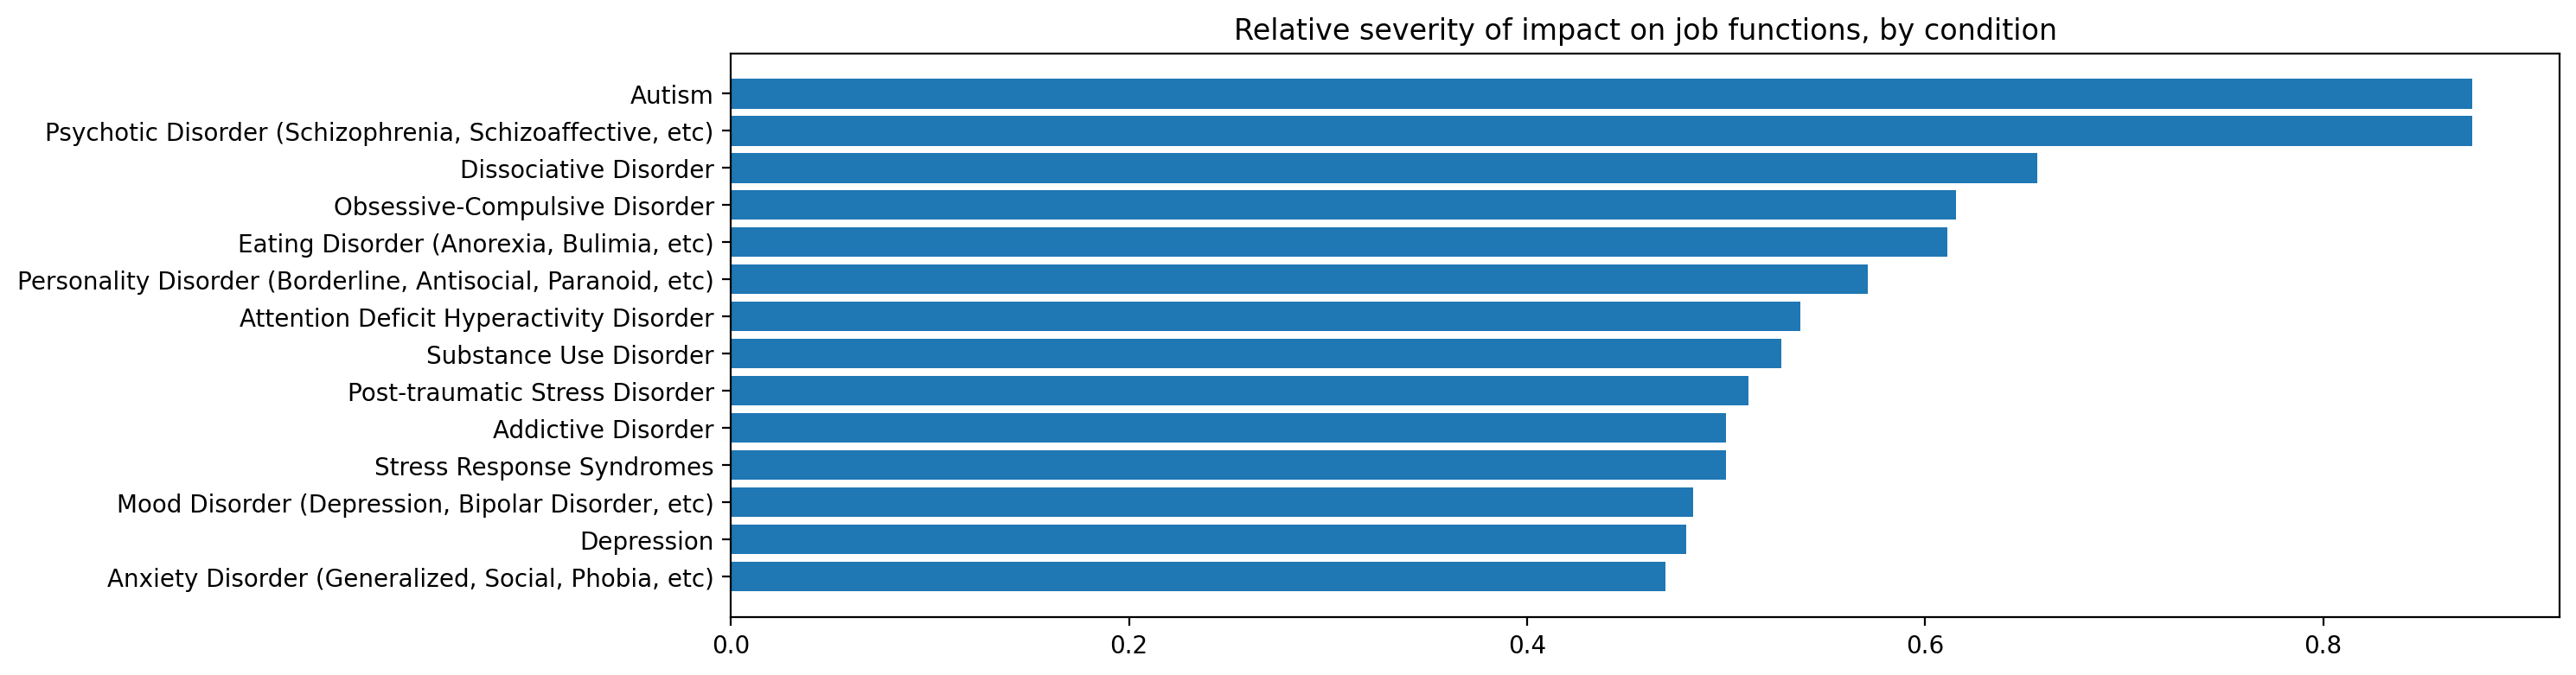

In [472]:
plt.figure(figsize = (15,4))
plt.barh(y = range(len(avg_effect_by_current_condition)), 
        width = sorted(avg_effect_by_current_condition.values(), reverse = False))
plt.yticks(range(len(avg_effect_by_current_condition)),
           [conditions_map.loc[cid, 'condition'] for cid in sorted(avg_effect_by_current_condition.keys(), 
                                                                   key= lambda c: avg_effect_by_current_condition[c], 
                                              reverse = False)], rotation = 0);
plt.title('Relative severity of impact on job functions, by condition');
plt.grid(axis = 'x', which = 'major')
plt.tight_layout()

In [473]:
wtd_effect_by_current_condition = {c: calculate_wtd_effect(c) for c in current_conditions.columns[current_conditions.sum()>5]}

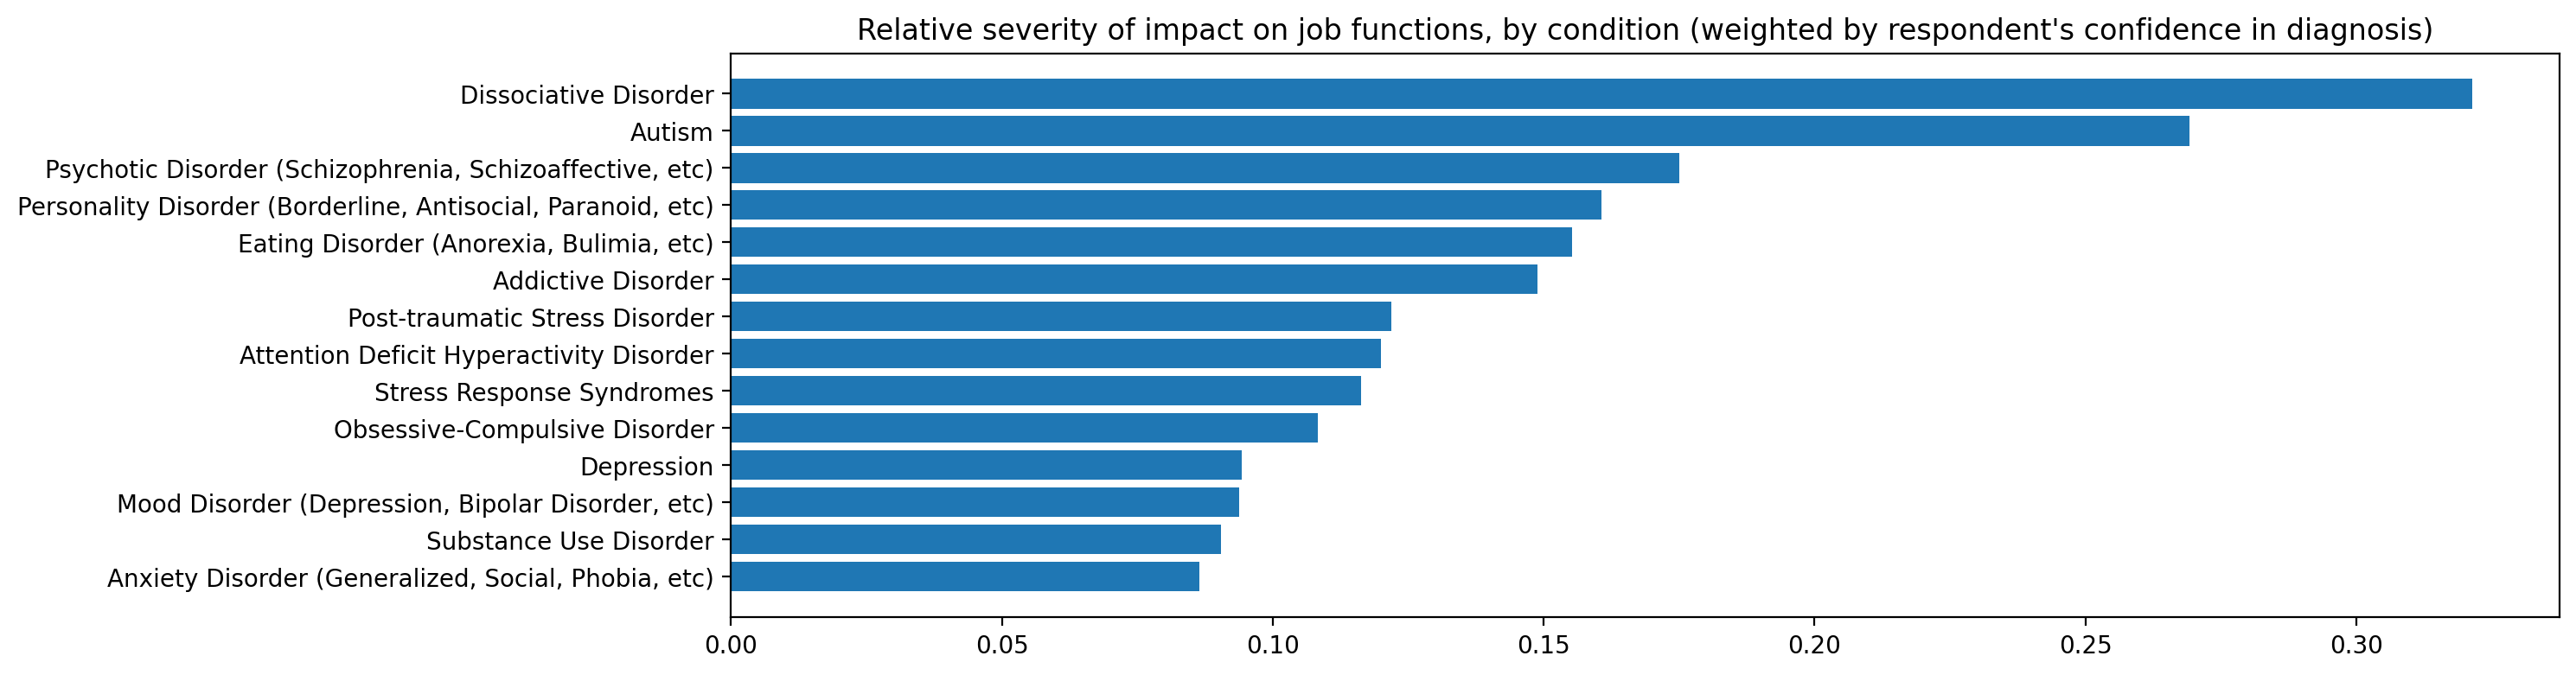

In [474]:
plt.figure(figsize = (15,4))
plt.barh(y = range(len(wtd_effect_by_current_condition)), 
        width = sorted(wtd_effect_by_current_condition.values(), reverse = False))
plt.yticks(range(len(wtd_effect_by_current_condition)),
           [conditions_map.loc[cid, 'condition'] for cid in sorted(wtd_effect_by_current_condition.keys(), 
                                                                   key= lambda c: wtd_effect_by_current_condition[c], 
                                              reverse = False)], rotation = 0);
plt.grid(axis = 'x', which = 'major')
plt.title('Relative severity of impact on job functions, by condition (weighted by respondent\'s confidence in diagnosis)');
plt.tight_layout()

##### Relationship btw condition and family history

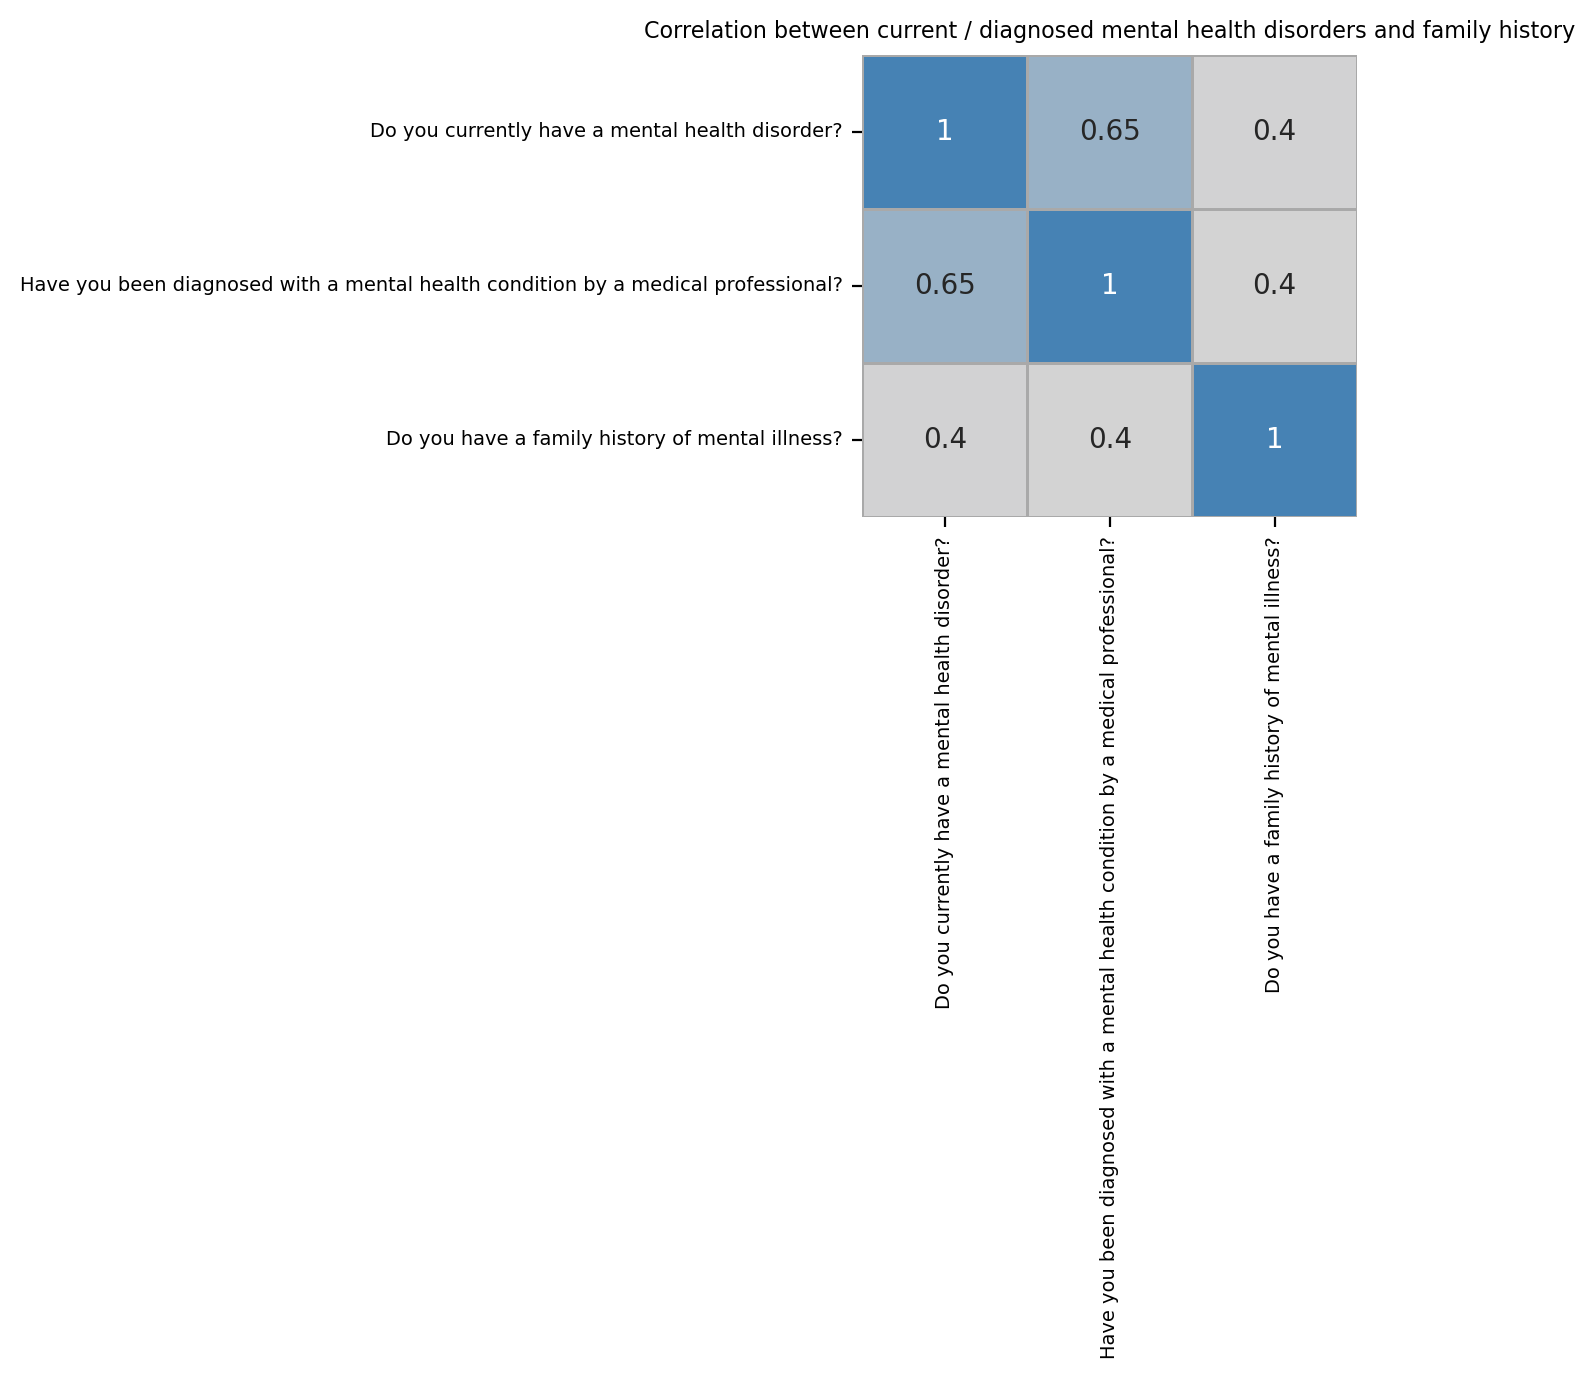

In [1633]:
plt.figure(figsize = (7,7))
plt.title('Correlation between current / diagnosed mental health disorders and family history')
sns.heatmap(np.corrcoef(responses[[mhit_question_ids['Do you currently have a mental health disorder?'], 
            mhit_question_ids['Have you been diagnosed with a mental health condition by a medical professional?']]],
           responses[[mhit_question_ids['Do you have a family history of mental illness?']]], 
            #mhit_question_ids['Do you have a family history of mental illness?']]
             rowvar = False), cbar = False, annot = True, cmap = mhit_cmap, linecolor = 'darkgray', linewidth = 1, 
           xticklabels= ['Do you currently have a mental health disorder?',
                        'Have you been diagnosed with a mental health condition by a medical professional?',
                        'Do you have a family history of mental illness?'],
                      yticklabels= ['Do you currently have a mental health disorder?',
                        'Have you been diagnosed with a mental health condition by a medical professional?',
                        'Do you have a family history of mental illness?']);
plt.tight_layout()

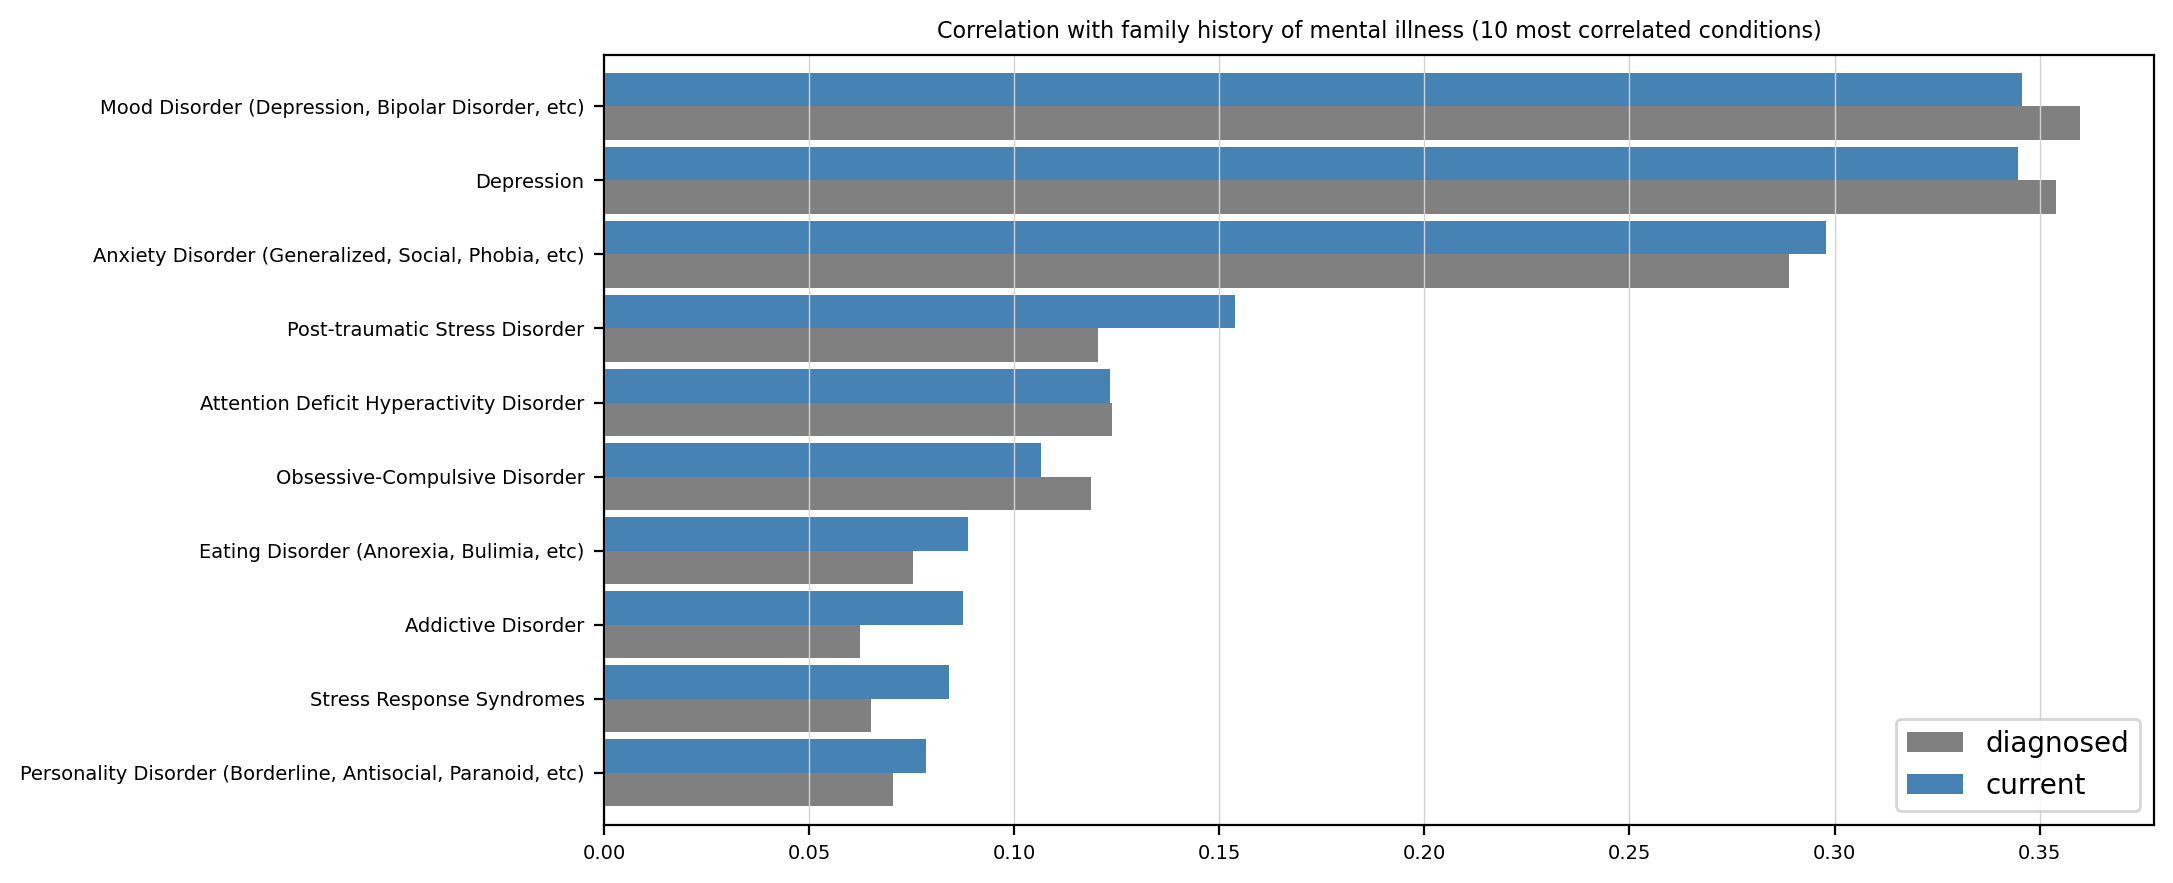

In [1600]:
cond_vs_fhist[cond_vs_fhist.mean().abs().T.sort_values().index[-10:]].T.plot(kind = 'barh', color = ['gray', 'steelblue'],
                                                                 width = 0.9, figsize = (10,5));
plt.yticks(range(10), [conditions_map.loc[cid, 'condition'] for cid in cond_vs_fhist.mean().abs().T.sort_values().index[-10:]]);
plt.grid(which = 'major', axis = 'x', zorder = 0);
plt.title('Correlation with family history of mental illness (10 most correlated conditions)');

In [1011]:
cond_vs_fhist = pd.concat([df[dc_conditions].apply(lambda c: responses[[mhit_question_ids['Do you have a family history of mental illness?']]].corrwith(c, axis = 0))
                                              for df in [diagnosed_conditions, current_conditions]], axis = 0)

cond_vs_fhist.index = ['diagnosed', 'current']

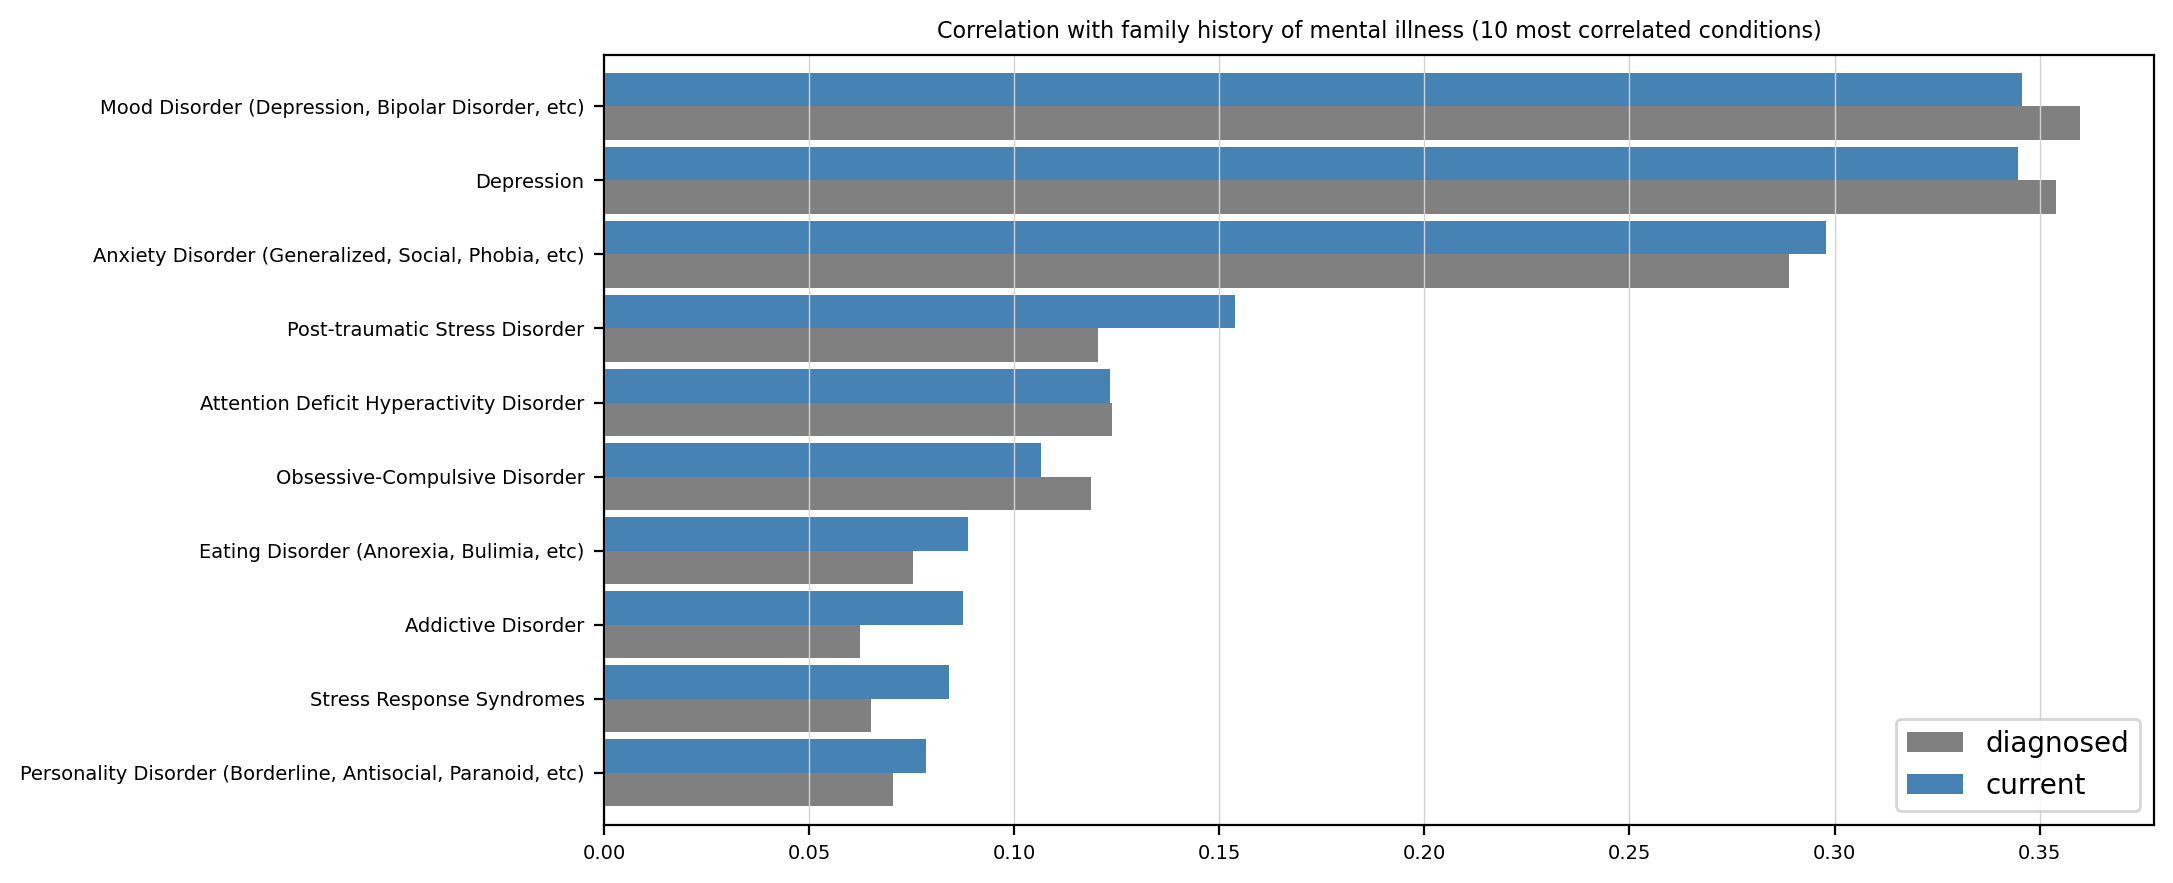

In [1600]:
cond_vs_fhist[cond_vs_fhist.mean().abs().T.sort_values().index[-10:]].T.plot(kind = 'barh', color = ['gray', 'steelblue'],
                                                                 width = 0.9, figsize = (10,5));
plt.yticks(range(10), [conditions_map.loc[cid, 'condition'] for cid in cond_vs_fhist.mean().abs().T.sort_values().index[-10:]]);
plt.grid(which = 'major', axis = 'x', zorder = 0);
plt.title('Correlation with family history of mental illness (10 most correlated conditions)');

##### Relationship between diagnosed condition and condition described as "current"

In [392]:
diag_x_current_corr = diagnosed_conditions[dc_conditions].apply(lambda s: current_conditions[dc_conditions].corrwith(s, axis = 0))

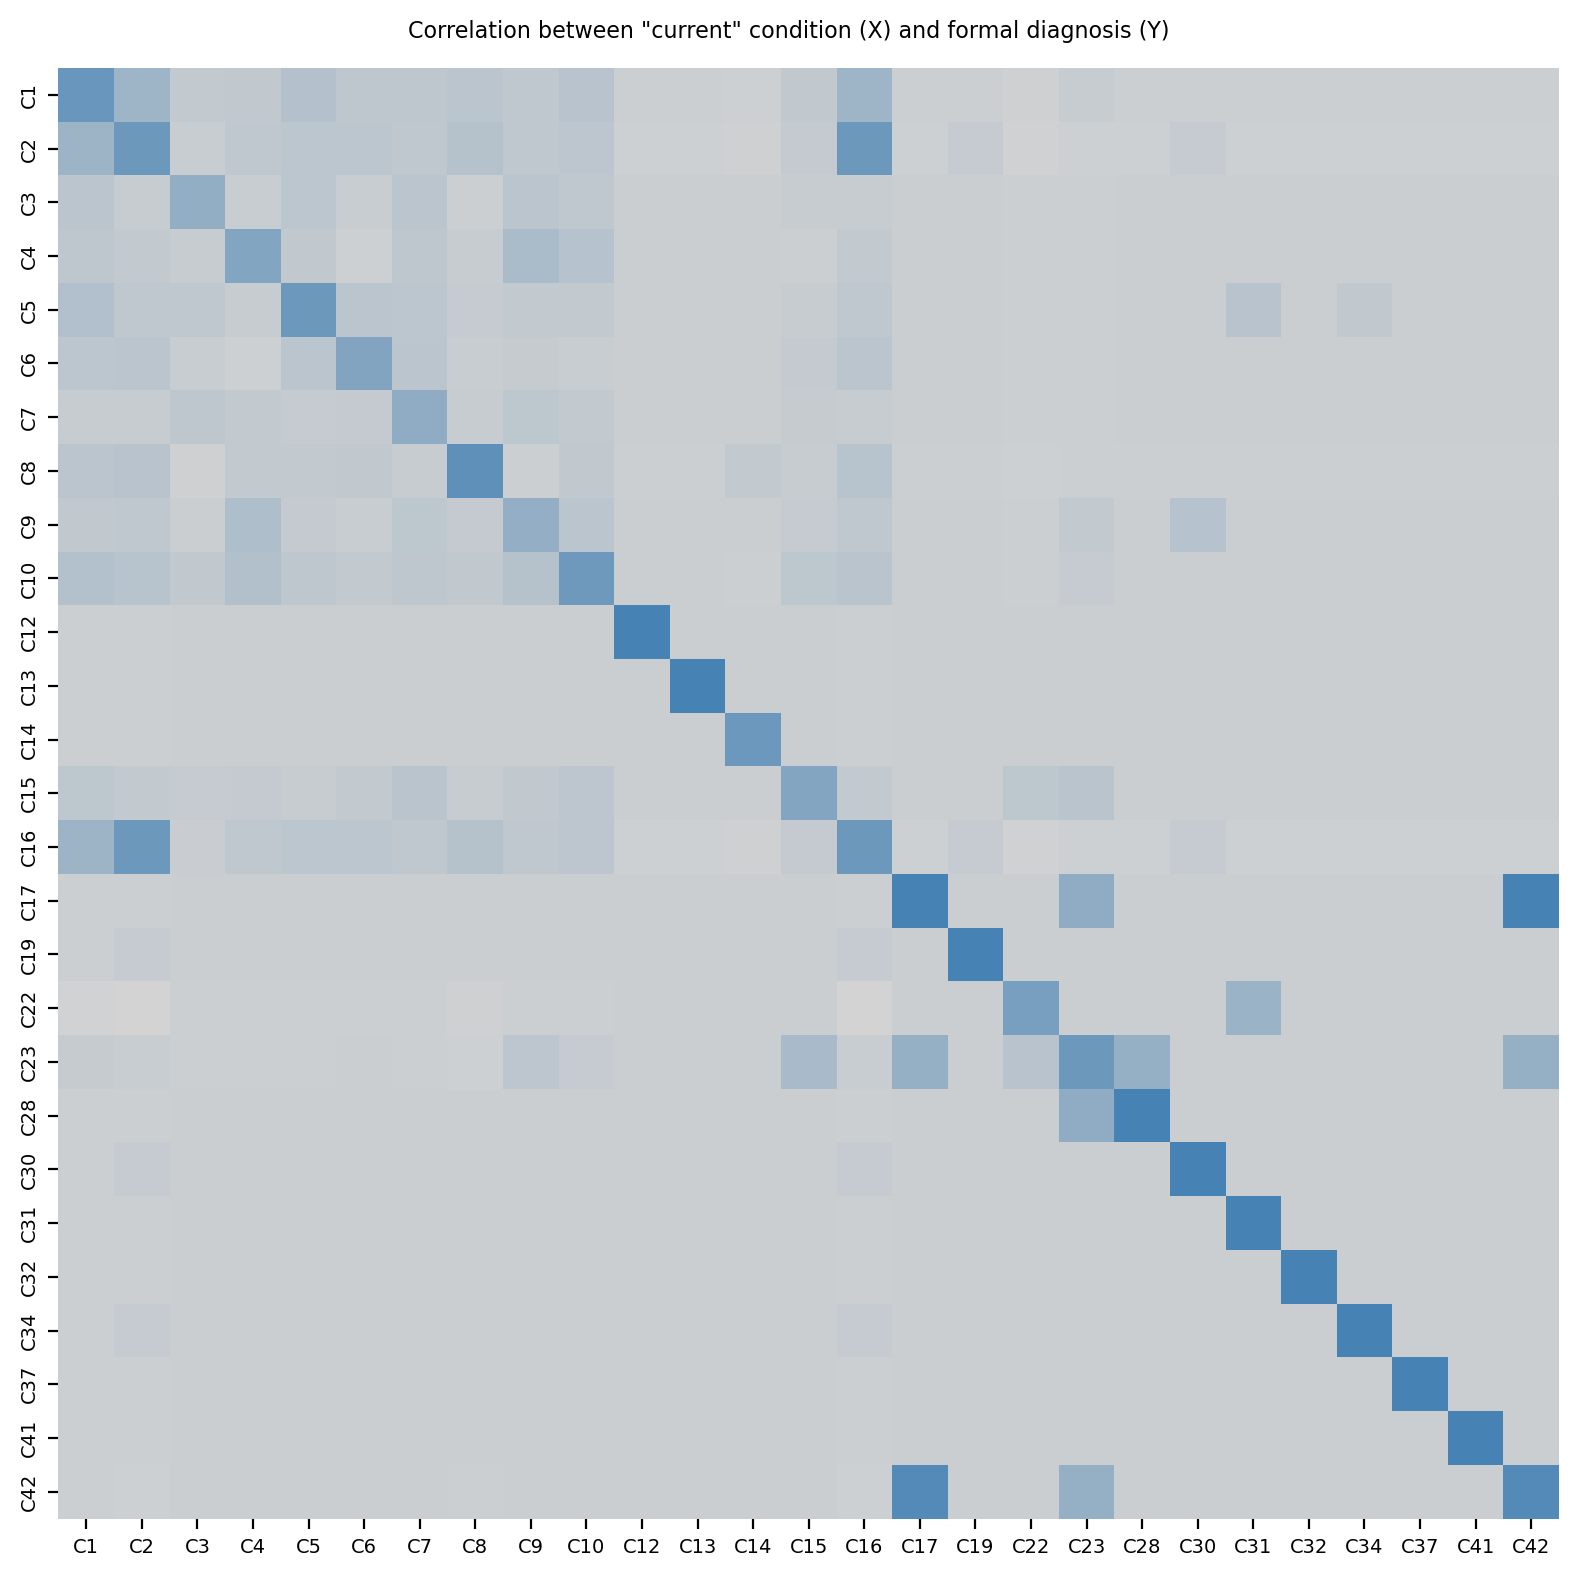

In [1637]:
plt.figure(figsize = (8,8))
plt.suptitle('Correlation between "current" condition (X) and formal diagnosis (Y)')
sns.heatmap(diag_x_current_corr, xticklabels=diag_x_current_corr.columns, yticklabels=diag_x_current_corr.index, 
            cmap = mhit_cmap, cbar = False);
plt.tight_layout()

In [1644]:
dc_corr = diag_x_current_corr.unstack().reset_index().rename({'level_0': 'diagnosis', 
                                                    'level_1': 'current condition', 0: 'correlation'}, 
                                                   axis = 1).sort_values('correlation', ascending = False)

In [1648]:
dc_corr['diagnosis'] = dc_corr['diagnosis'].apply(lambda x: conditions_map.loc[x])
dc_corr['current condition'] = dc_corr['current condition'].apply(lambda x: conditions_map.loc[x])

In [1650]:
dc_corr[dc_corr['diagnosis']!=dc_corr['current condition']].head(10)

diagnosis  \
717                                         Asperger's   
431                                Autism (Asperger's)   
41   Mood Disorder (Depression, Bipolar Disorder, etc)   
379                                         Depression   
505                                             Autism   
501                                             Autism   
531                           Autism Spectrum Disorder   
423                                Autism (Asperger's)   
720                                         Asperger's   
512                                             Autism   

                                     current condition  correlation  
717                                Autism (Asperger's)     1.000000  
431                                         Asperger's     0.894365  
41                                          Depression     0.711759  
379  Mood Disorder (Depression, Bipolar Disorder, etc)     0.710433  
505                           Autism Spectrum Disorder     0.446589  
501                                Autism (Asperger's)     0.446589  
531                                             Autism     0.399267  
423                                             Autism     0.399267  
720                                             Autism     0.399267  
512                                         Asperger's     0.398853

##### TBD

In [ ]:
diagnosed_df = diagnosed_conditions[diagnosed_conditions.sum().sort_values(ascending = False).head(10).index]
diagnosed_df = diagnosed_df.unstack().reset_index()
diagnosed_df = diagnosed_df[diagnosed_df[0]==1]
diagnosed_df.rename({'level_0': 'condition'}, axis = 1, inplace = True)
diagnosed_df = diagnosed_df.merge(responses[include_in_condition_analysis], left_on = 'rid', right_index = True)
diagnosed_df['condition'] = diagnosed_df['condition'].map({cid: c for cid, c in zip(conditions_map.index, conditions_map['condition'])})

In [590]:
diagnosed_df.sample(3)

condition  \
10447  Personality Disorder (Borderline, Antisocial, ...   
2079   Mood Disorder (Depression, Bipolar Disorder, etc)   
5336            Attention Deficit Hyperactivity Disorder   

                                        rid  0  Q46  Q47  Q53  Q54  Q55  
10447  f82bc029-ed6d-4236-9c5b-3f2f8bbfbe33  1  0.0  1.0    1  0.5  0.5  
2079   2419cd1a-4954-499a-8c27-20db34501ff9  1  0.0  1.0    1  0.5  0.5  
5336   e1186951-2e5b-4ddf-8ec5-0d747bb3c406  1  1.0  0.0    1  0.0  0.0

In [591]:
current_df = current_conditions[current_conditions.sum().sort_values(ascending = False).head(10).index]
current_df = current_df.unstack().reset_index()
current_df = current_df[current_df[0]==1]
current_df.rename({'level_0': 'condition'}, axis = 1, inplace = True)
current_df = current_df.merge(responses[include_in_condition_analysis], left_on = 'rid', right_index = True)
current_df['condition'] = current_df['condition'].map({cid: c for cid, c in zip(conditions_map.index, conditions_map['condition'])})

In [617]:
#for question in include_in_condition_analysis[:1]:
question = include_in_condition_analysis[2]
print(mhit_question_ids_rev[question])
posthoc_df = sp.posthoc_ttest(diagnosed_df, group_col = 'condition', val_col = question, 
                              equal_var=(diagnosed_df.groupby('condition')[question].std().max()
                                         -diagnosed_df.groupby('condition')[question].std().min()<=0.05), p_adjust="bonferroni")

posthoc_df.style.applymap(lambda x: "background-color:lightsteelblue" if x<0.05 else "background-color: white")

Have you ever sought treatment for a mental health issue from a mental health professional?


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/var/folders/s5/1c98d9r93rg6lzxgmf01jj0m0000gn/T/ipykernel_914/3240598965.py:11: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  posthoc_df.style.applymap(lambda x: "background-color:steelblue" if x<0.05 else "background-color: white")


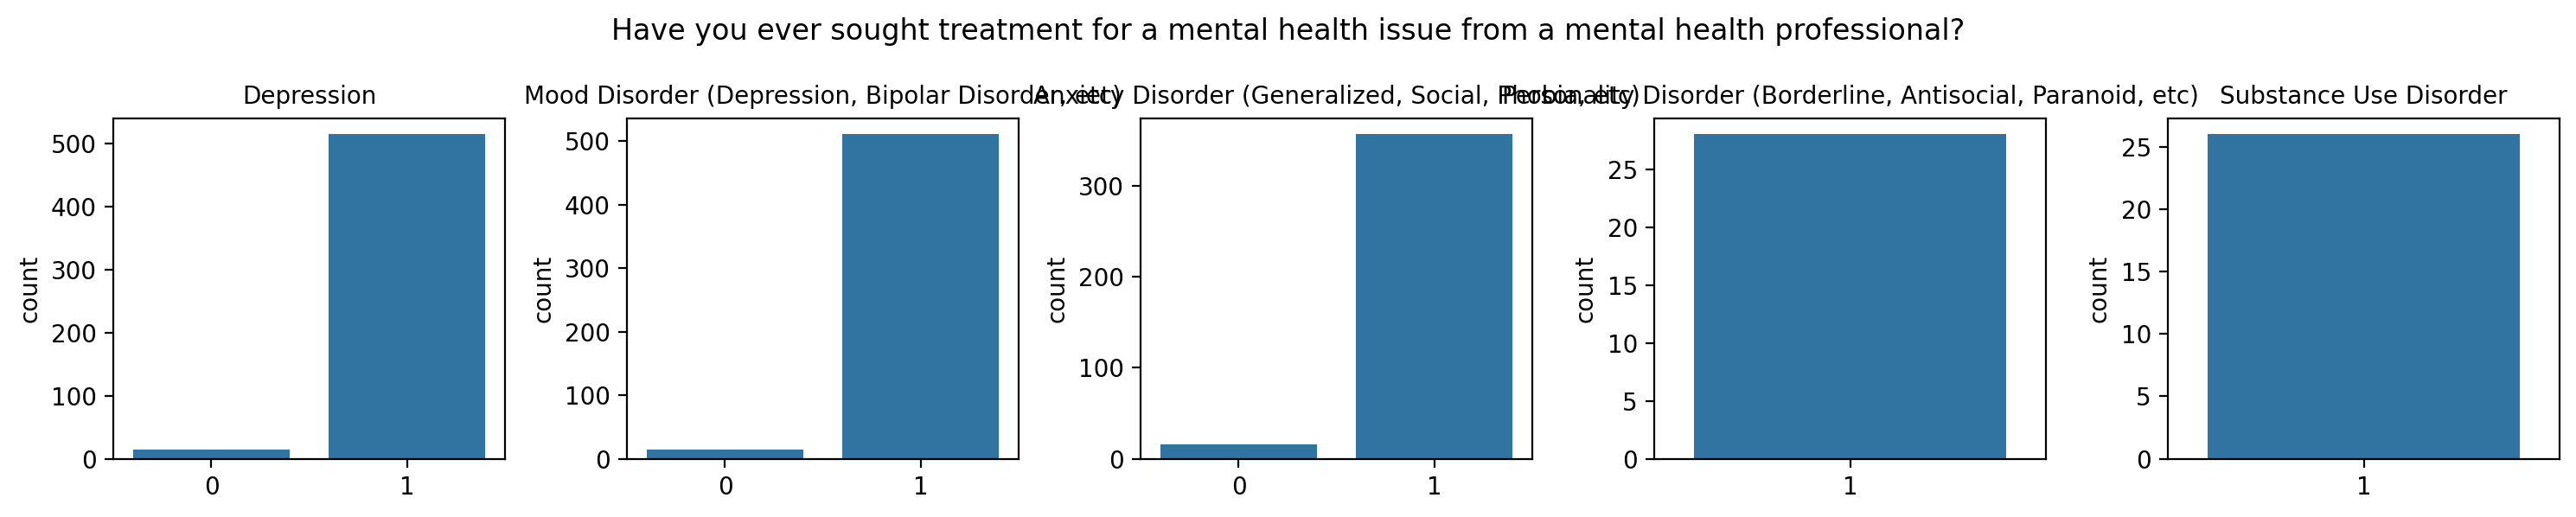

In [627]:
cwd = list(posthoc_df.columns[:3])+list(posthoc_df.columns[-3:-1])
fig, axs = plt.subplots(1,len(cwd), figsize = (len(cwd)*3,3), sharey=False)
plt.suptitle(mhit_question_ids_rev[question])
for i in range(len(cwd)):
    c = {c: cid for c, cid in zip(conditions_map['condition'], conditions_map.index)}[cwd[i]]
    sns.countplot(mhit.loc[diagnosed_conditions[diagnosed_conditions[c]==1].index], x = mhit_question_ids_rev[question], 
                  stat = 'count', ax = axs[i])
    axs[i].set_xlabel('')
    axs[i].set_title(cwd[i], fontsize = 10);
plt.tight_layout()

In [629]:
#for question in include_in_condition_analysis[:1]:
question = include_in_condition_analysis[2]
print(mhit_question_ids_rev[question])
posthoc_df = sp.posthoc_ttest(current_df, group_col = 'condition', val_col = question, equal_var=True, p_adjust="bonferroni")

#group_names= diagnosed_df['condition'].unique()
#posthoc_df.columns= group_names
#posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:lightsteelblue" if x<0.05 else "background-color: white")

Have you ever sought treatment for a mental health issue from a mental health professional?


/var/folders/s5/1c98d9r93rg6lzxgmf01jj0m0000gn/T/ipykernel_914/4003640908.py:9: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  posthoc_df.style.applymap(lambda x: "background-color:steelblue" if x<0.05 else "background-color: white")


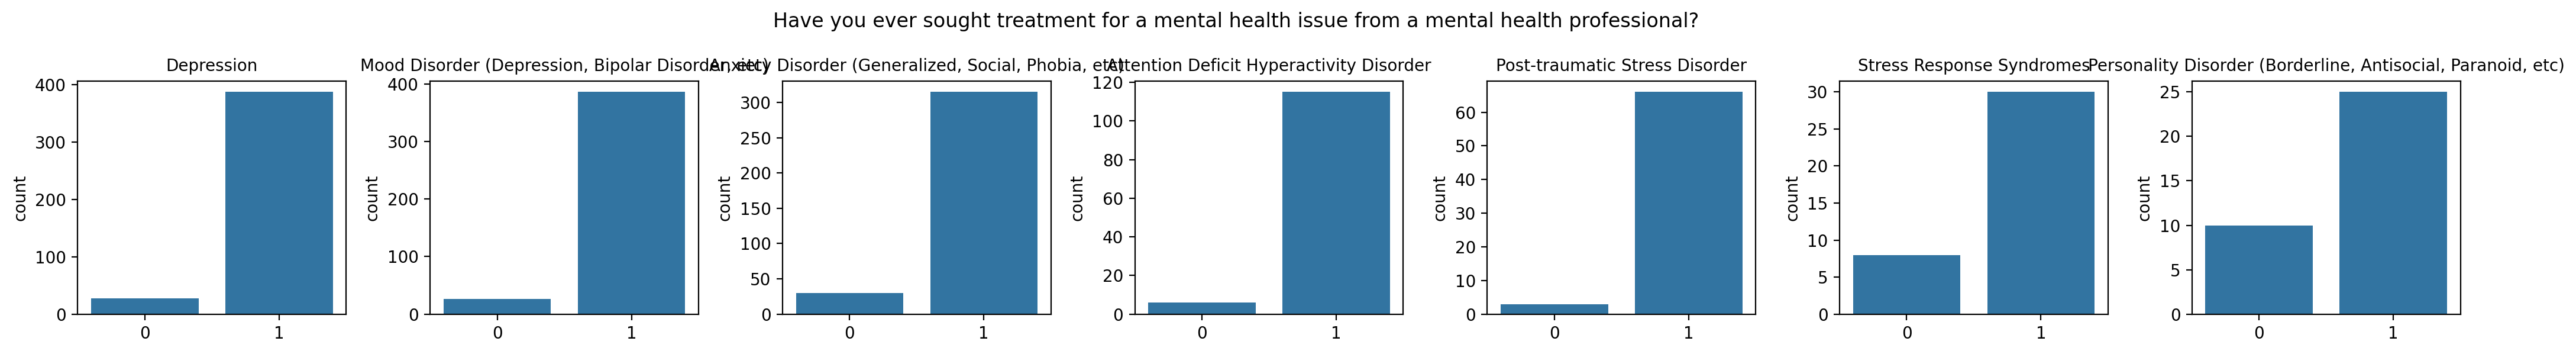

In [630]:
cwd = list(posthoc_df.columns[:5])+list(posthoc_df.columns[-4:-2])
fig, axs = plt.subplots(1,len(cwd), figsize = (len(cwd)*3,3), sharey=False)
plt.suptitle(mhit_question_ids_rev[question])
for i in range(len(cwd)):
    c = {c: cid for c, cid in zip(conditions_map['condition'], conditions_map.index)}[cwd[i]]
    sns.countplot(mhit.loc[current_conditions[current_conditions[c]==1].index], x = mhit_question_ids_rev[question], 
                  stat = 'count', ax = axs[i])
    axs[i].set_xlabel('')
    axs[i].set_title(cwd[i], fontsize = 10);
plt.tight_layout()

##### Relationship between experienced impact of condition and decision to seek treatment

/var/folders/s5/1c98d9r93rg6lzxgmf01jj0m0000gn/T/ipykernel_914/1171769010.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


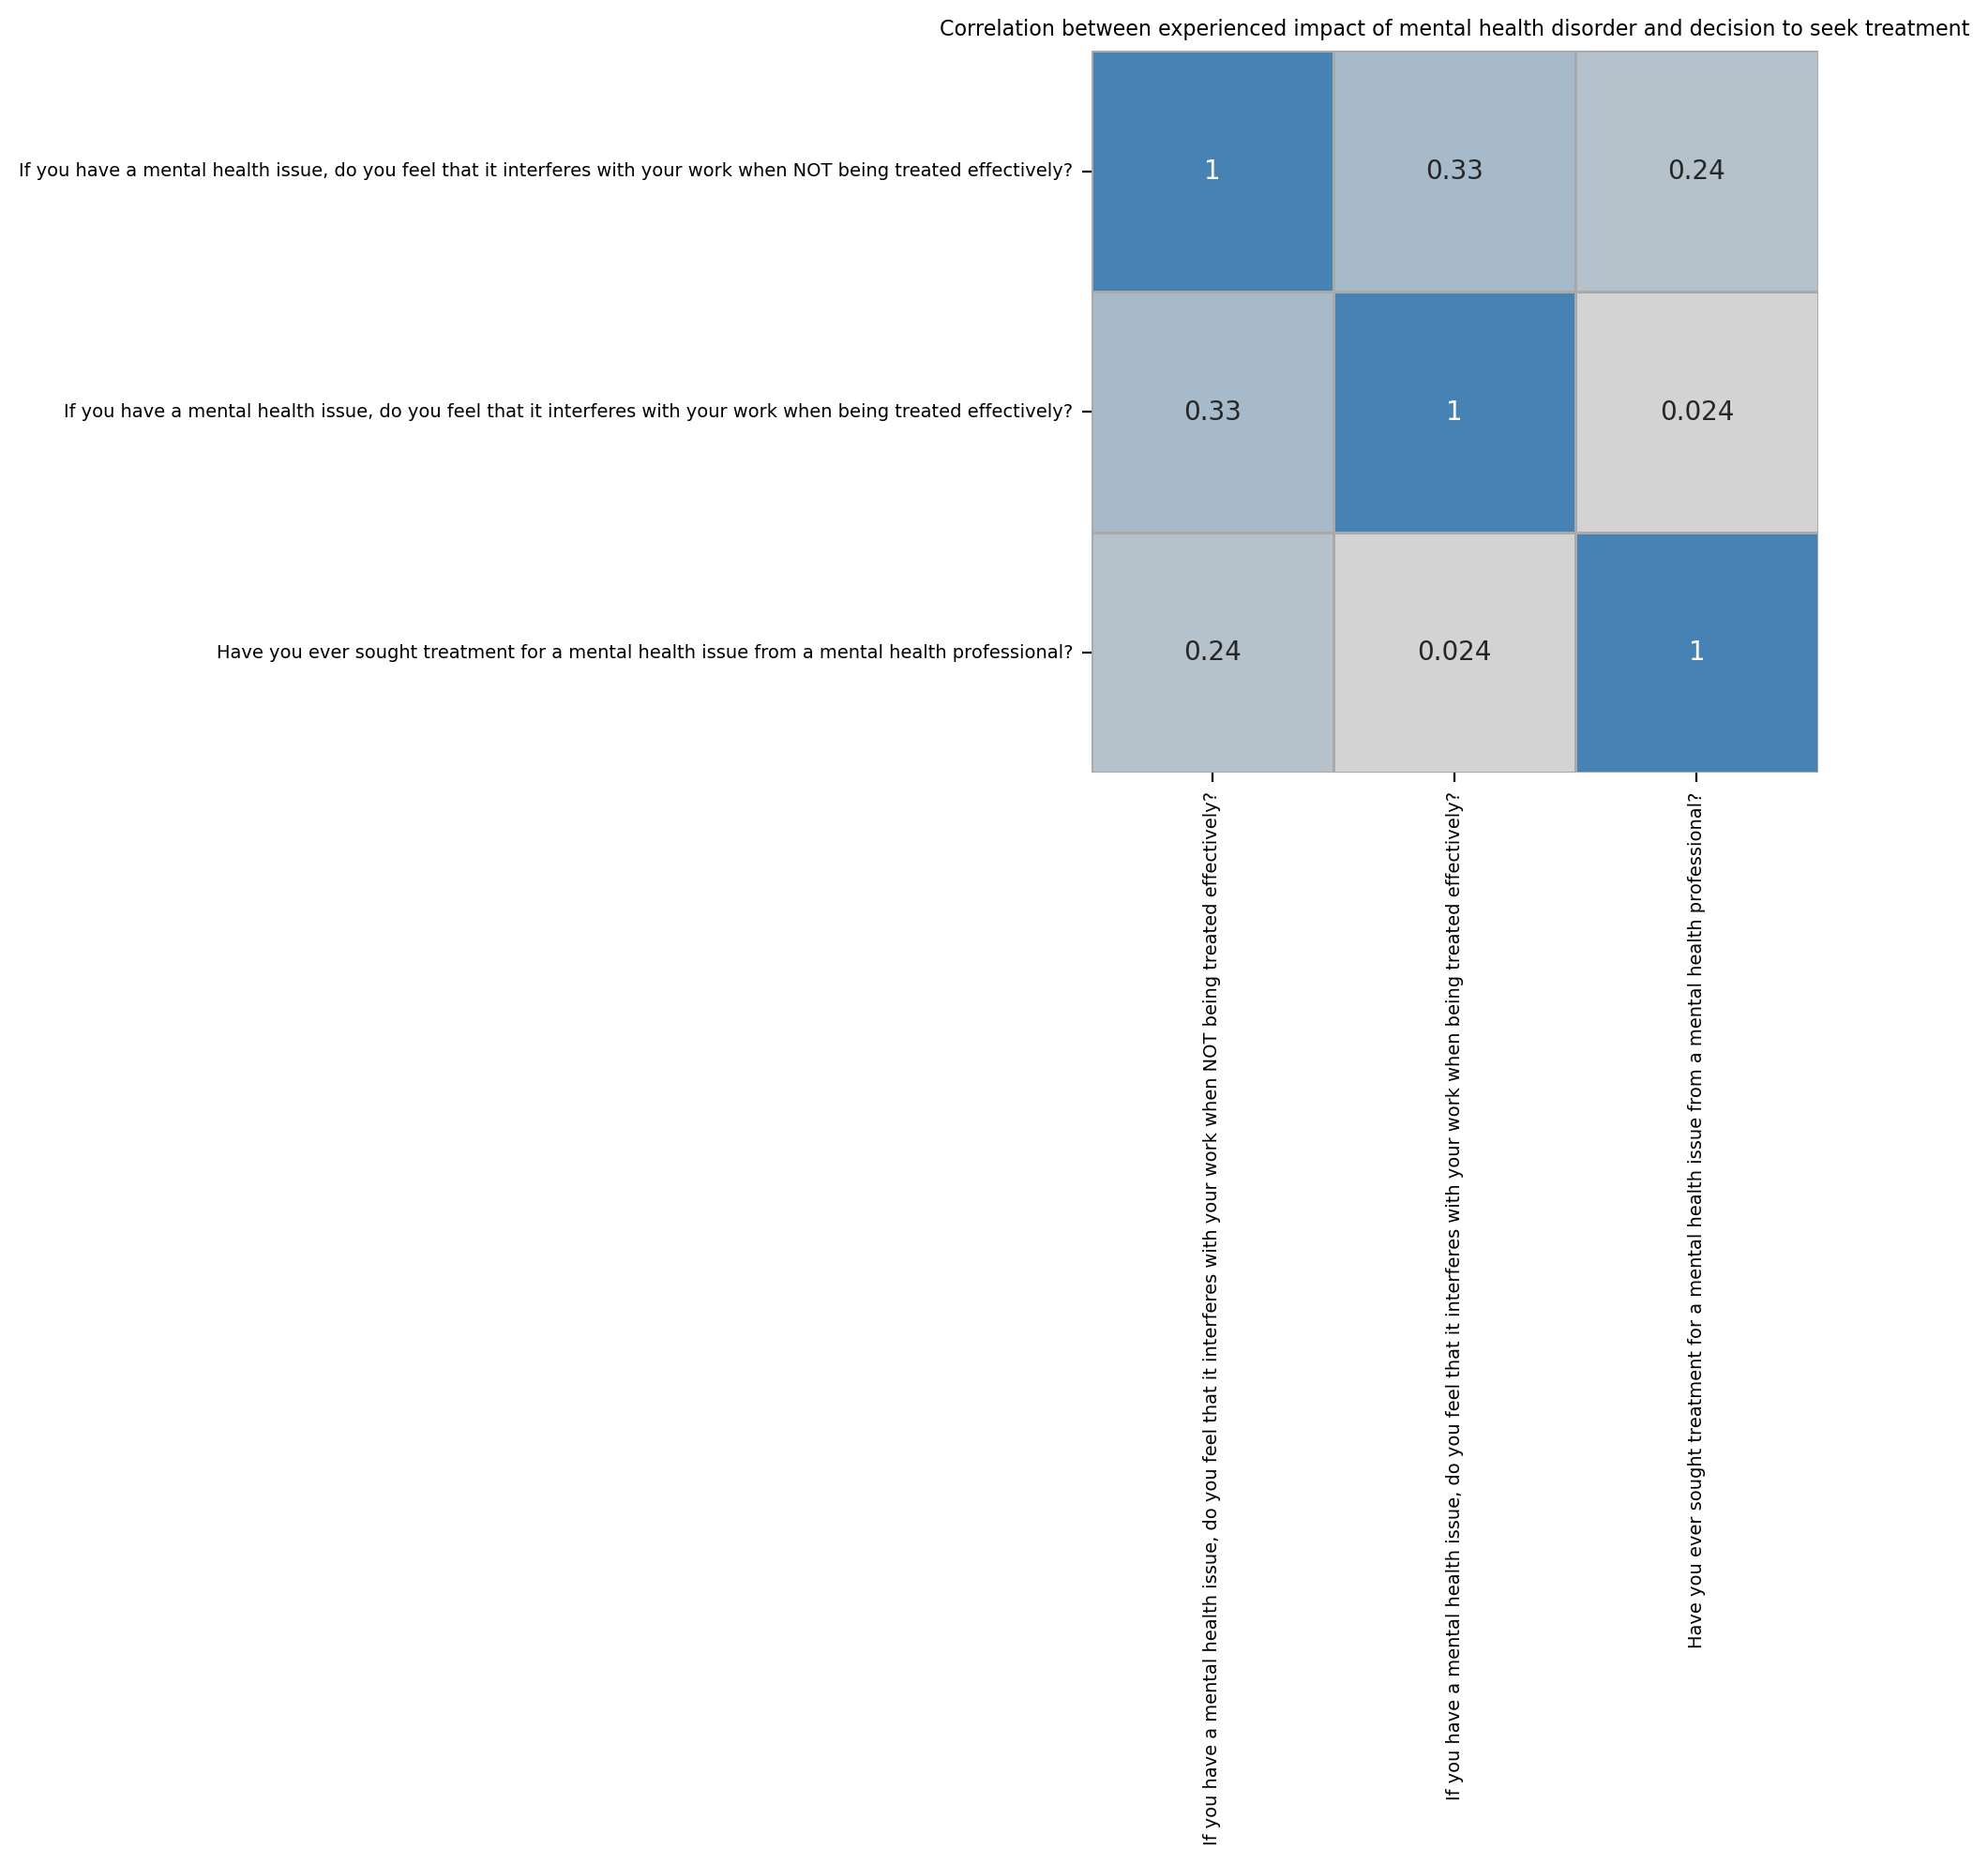

In [1667]:
impact_trtmt_qs = [mhit_question_ids['If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?'], 
            mhit_question_ids['If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?'],
           mhit_question_ids['Have you ever sought treatment for a mental health issue from a mental health professional?']]

plt.figure(figsize = (5,5))
plt.title('Correlation between experienced impact of mental health disorder and decision to seek treatment')
sns.heatmap(np.corrcoef(responses.dropna(subset = impact_trtmt_qs)[impact_trtmt_qs], rowvar = False), 
            cbar = False, annot = True, cmap = mhit_cmap, linecolor = 'darkgray', linewidth = 1, 
           xticklabels= [mhit_question_ids_rev[q] for q in impact_trtmt_qs], 
            yticklabels= [mhit_question_ids_rev[q] for q in impact_trtmt_qs]);
plt.tight_layout()

#### 4.2. Policies, attitudes and perceptions: analysis

##### policy by type of organization / location

In [1047]:
def show_breakdown(question, group_question, order_groups = None):
    
    num_to_verbal = {'values': {n: v for v, n in zip(mhit[question].dropna(), 
                                          responses[mhit_question_ids[question]].dropna())}}
    
    n = min([mhit[group_question].nunique(), 6])
    fig, axs = plt.subplots(1, n, figsize = (4*n,4), sharey=True)
    plt.suptitle(question)
    i = 0
    if order_groups:
        ordered_vs = order_groups
    else:
        ordered_vs = mhit.groupby(group_question)[group_question].count().sort_values(ascending = False).index[:n]
                 
    for v in ordered_vs:
        sns.countplot(mhit[mhit[group_question]==v], 
                      x = question, stat='percent', 
                     order = [num_to_verbal['values'][n] for n in sorted(num_to_verbal['values'].keys(), 
                                                               reverse = ('Yes' in num_to_verbal['values'][0]))], ax = axs[i], 
                      color = cmap(list(mhit.groupby(group_question)[group_question].count().sort_values(ascending = False).index).index(v)/(n-1)), 
                      alpha = 1, legend= False
                 );
        if 0 in mhit[group_question].dropna().unique():
            axs[i].set_title(f"{['non-tech', 'tech'][int(v)]}")
        else:
            axs[i].set_title(v)
        axs[i].set_xlabel('')
        axs[i].grid(axis = 'y', which = 'major', zorder = 1)
        i +=1 
    plt.tight_layout()
    plt.show()

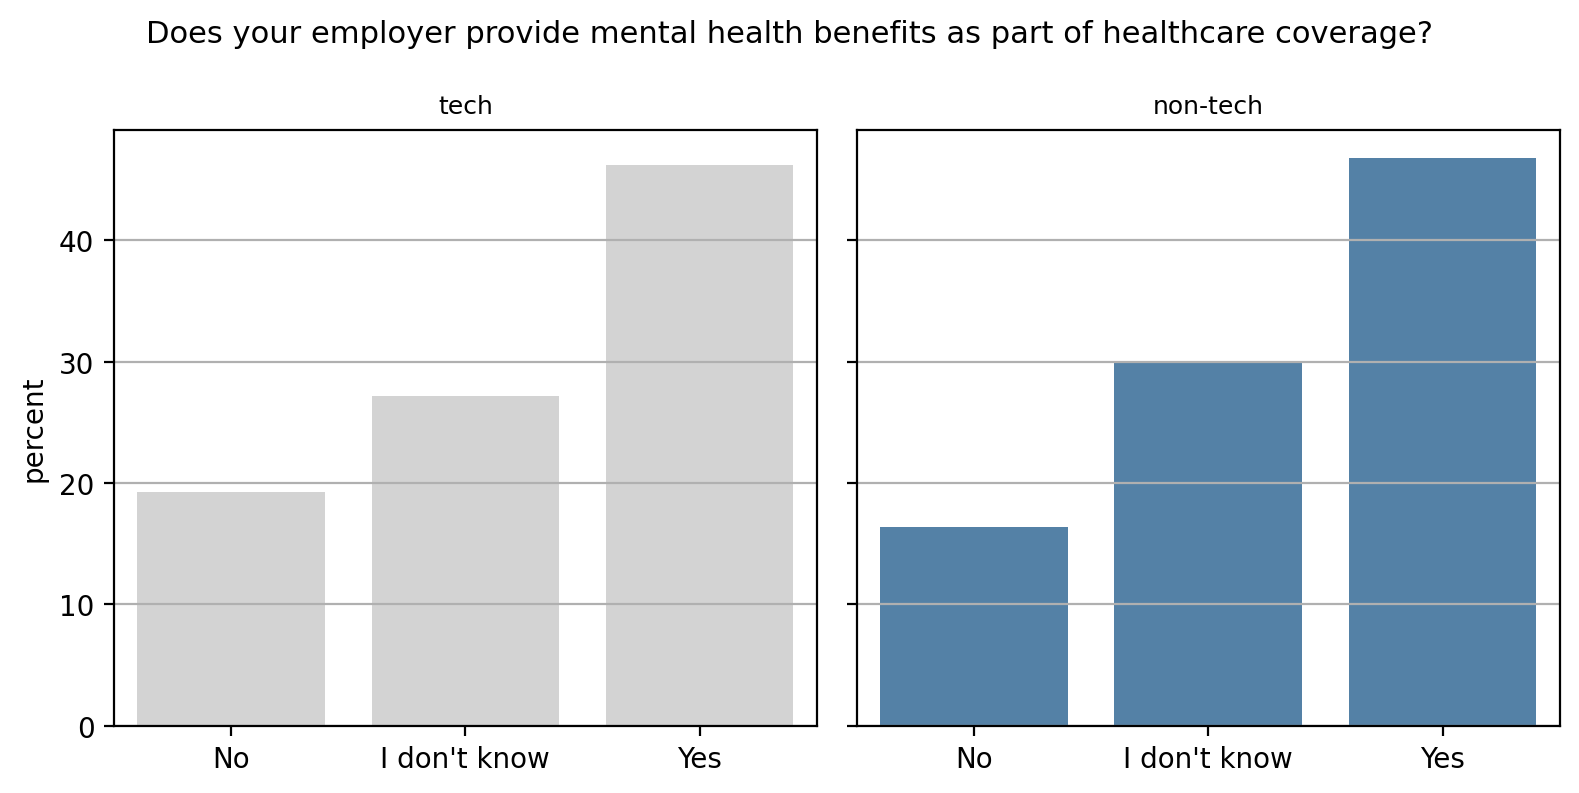

In [996]:
show_breakdown(question = 'Does your employer provide mental health benefits as part of healthcare coverage?',
                  group_question = 'Is your employer primarily a tech company/organization?')

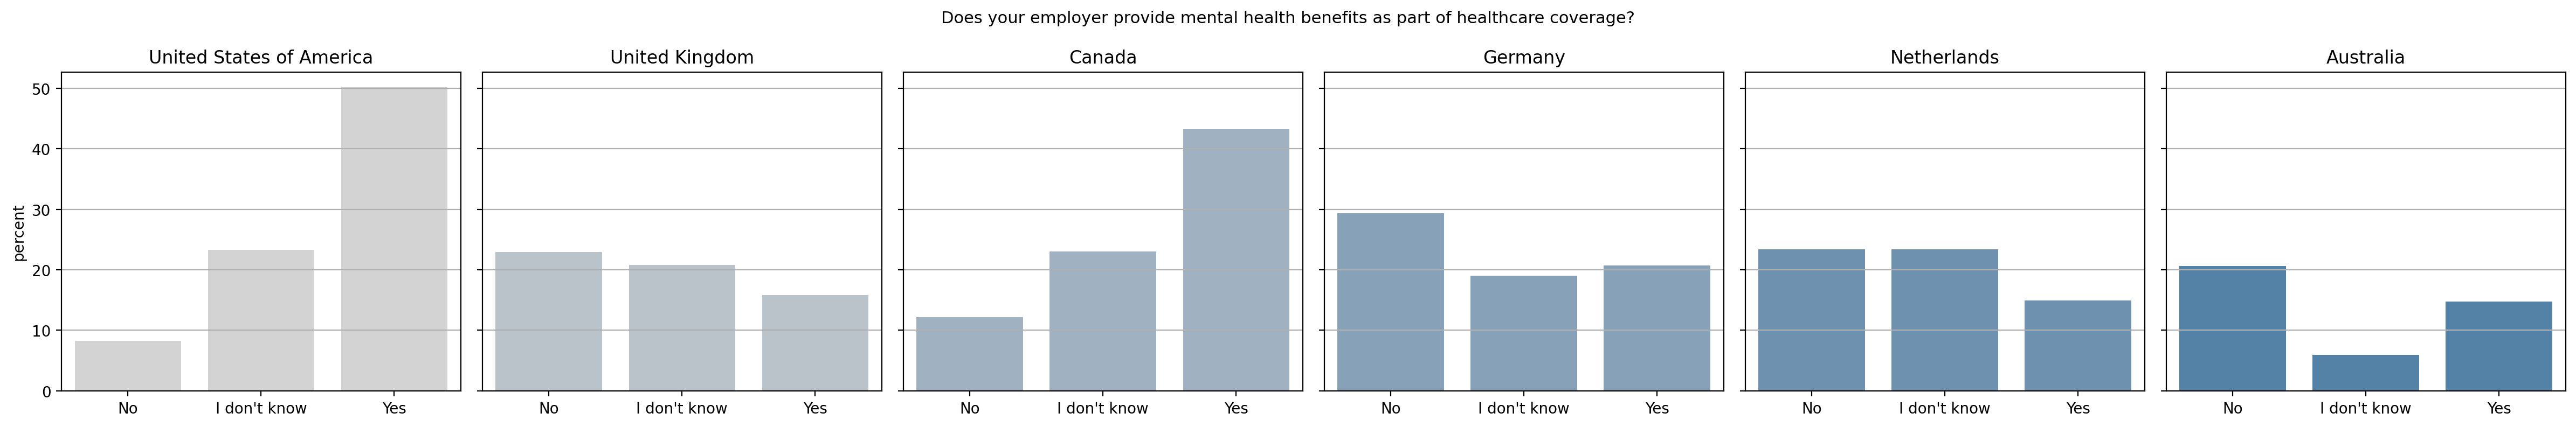

In [1048]:
show_breakdown(question = 'Does your employer provide mental health benefits as part of healthcare coverage?',
                  group_question = 'What country do you work in?')

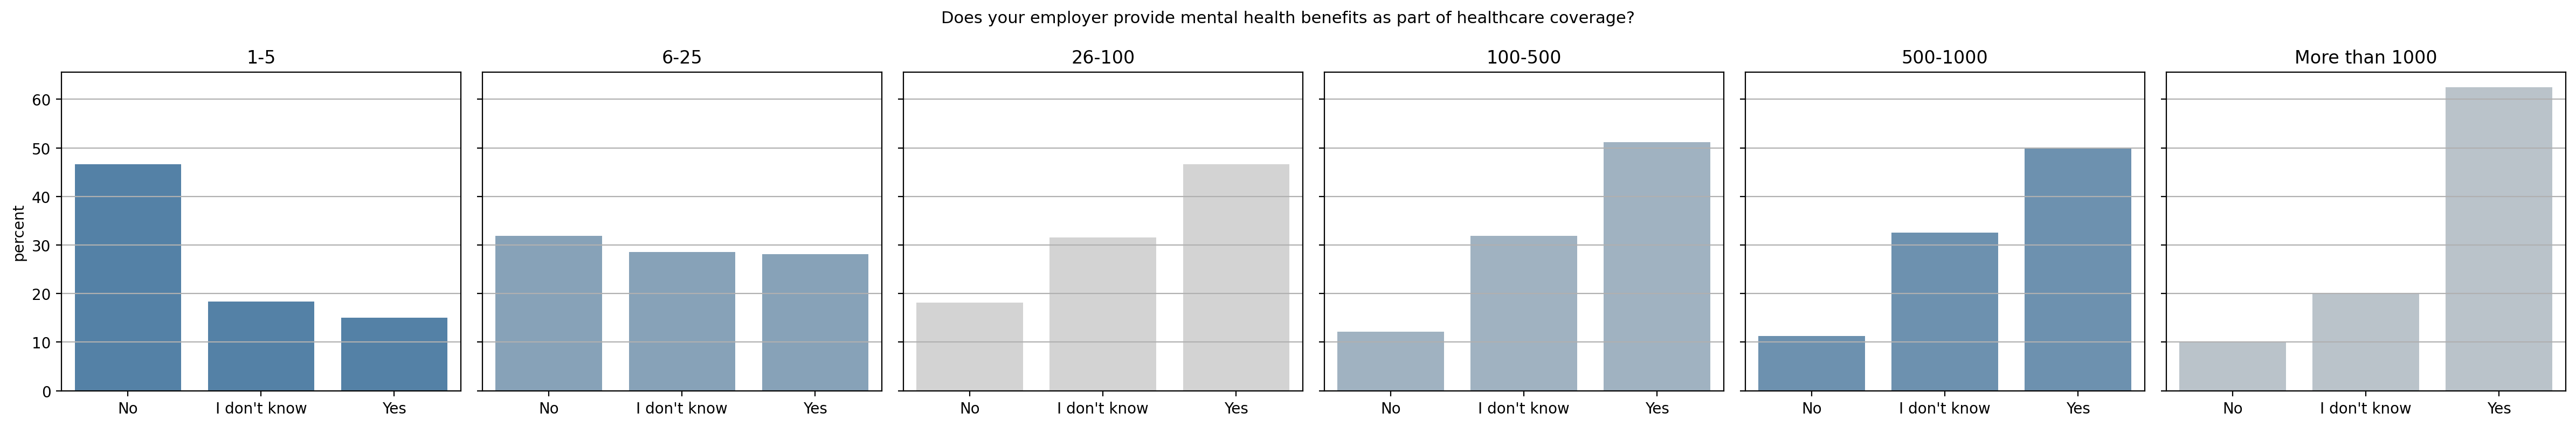

In [1049]:
show_breakdown(question = 'Does your employer provide mental health benefits as part of healthcare coverage?',
                  group_question = 'How many employees does your company or organization have?', 
               order_groups= ['1-5', '6-25', '26-100','100-500', '500-1000','More than 1000'])

##### policy vs treatment-seeking

/var/folders/s5/1c98d9r93rg6lzxgmf01jj0m0000gn/T/ipykernel_914/4162693973.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


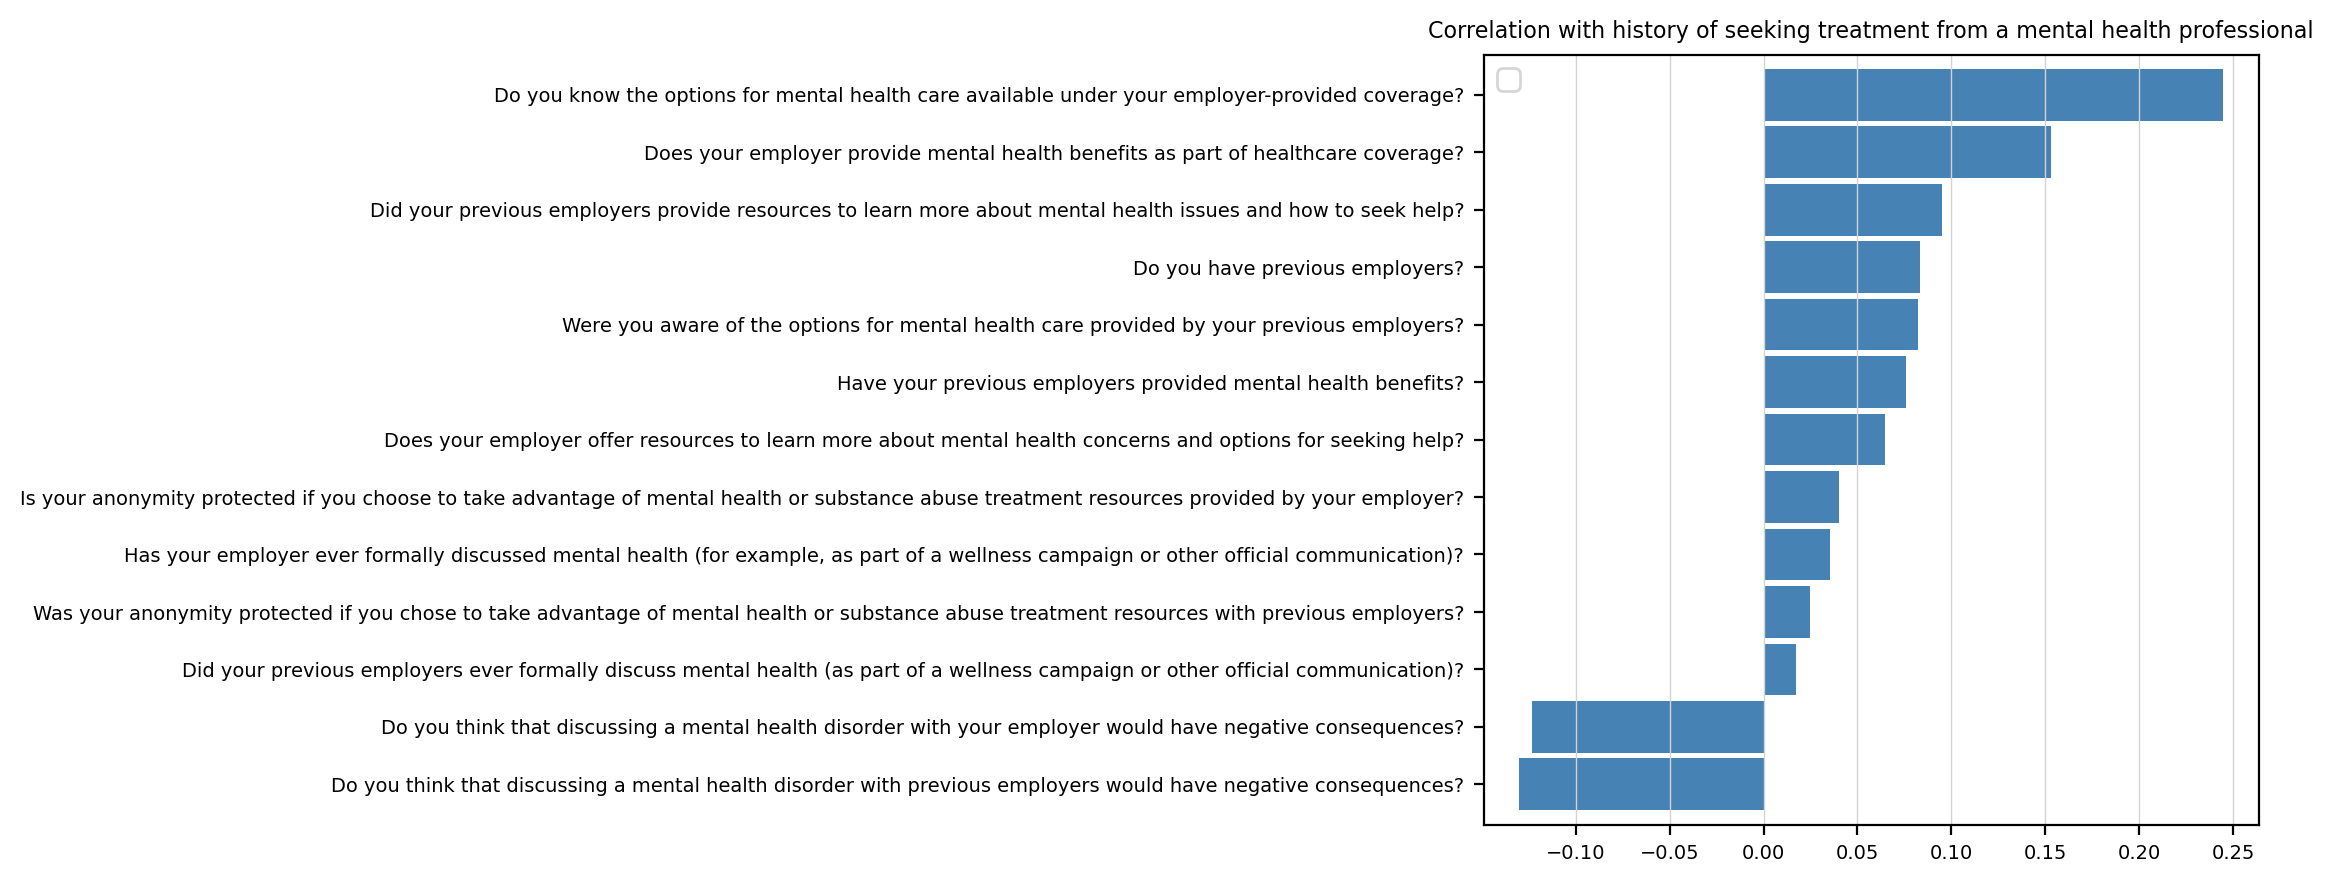

In [1672]:
policy_questions = [q for q in responses.columns if 'employer' in mhit_question_ids_rev[q] 
                    and not any([_ in mhit_question_ids_rev[q] for _ in ['potential', 'physical']])]

trt_vs_policy = responses[policy_questions].apply(lambda c: responses[[mhit_question_ids['Have you ever sought treatment for a mental health issue from a mental health professional?']]].corrwith(c, axis = 0))

trt_vs_policy.index = ['sought_trt']

trt_vs_policy[trt_vs_policy.mean().T.sort_values().index].T.plot(kind = 'barh', color = 'steelblue',
                                                                 width = 0.9, figsize = (5,5));
plt.yticks(range(trt_vs_policy.shape[1]), [mhit_question_ids_rev[qid] for qid in trt_vs_policy.mean().T.sort_values().index]);
plt.grid(which = 'major', axis = 'x', zorder = 0);
plt.title('Correlation with history of seeking treatment from a mental health professional');
plt.legend('')
plt.tight_layout()

##### shifts from previous employee/-s to current employee

In [1688]:
def prev_curr_employer(questions):
    widths = {}
    widths = {['left', 'right'][i]: (responses[mhit_question_ids[questions[i]]].value_counts()/
                      responses[mhit_question_ids[questions[i]]].dropna().shape[0]) for i in range(2)}
    
    lower_bounds = {side: [] for side in ['left', 'right']}
    upper_bounds = {side: [] for side in ['left', 'right']}
    for side in ['left', 'right']:
        for i in sorted(widths[side].index):
            try:
                lower_bounds[side].append(upper_bounds[side][-1])
                upper_bounds[side].append(lower_bounds[side][-1]+widths[side].loc[i])
            except:
                lower_bounds[side].append(0)
                upper_bounds[side].append(widths[side].loc[i])
    
    fig, ax = plt.subplots(1,1, figsize = (6,4))
    sax = ax.twinx()
    #colors = [mhit_cmap(i) for i in np.linspace(0,1,len(widths['left']))]
    left_labels = [{i: w for i, w in zip(responses[mhit_question_ids[questions[0]]], mhit[questions[0]])}[i] for i in sorted(widths['left'].index)]
    right_labels = [{i: w for i, w in zip(responses[mhit_question_ids[questions[1]]], mhit[questions[1]])}[i] for i in sorted(widths['right'].index)]
    if left_labels == right_labels:
        labels = left_labels
    else:
        labels = [f"{left_labels[i]} / {right_labels[i]}" for i in range(len(left_labels))]
    for i in range(len(widths['left'])):
        plt.fill_between(from_to, y1 = np.array([upper_bounds['left'][i],
                                                upper_bounds['right'][i]]), y2= np.array([lower_bounds['left'][i],
                                                                                       lower_bounds['right'][i]]),
                                              alpha=0.3, cmap = mhit_cmap, color = mhit_cmap(np.linspace(0,1,len(widths['left']))[i]), 
                         label = labels[i]
                        )
    
    # Customize the plot
    ax.set_xticks([])
    ax.set_xmargin(0)
    ax.set_ylabel('Previous employer/-s')
    sax.set_ylabel('Current employer')
    ax.set_yticks([np.mean([lower_bounds['left'][i], upper_bounds['left'][i]]) for i in range(len(lower_bounds['left']))], 
                  ["{:.0%}".format(widths['left'].loc[i]) for i in sorted(widths['left'].index)])
    sax.set_yticks([np.mean([lower_bounds['right'][i], upper_bounds['right'][i]]) for i in range(len(lower_bounds['right']))], 
                  ["{:.0%}".format(widths['right'].loc[i]) for i in sorted(widths['right'].index)])
    ax.set_title(questions[1].replace('employer', 'previous/current employer(-s)'))
    sax.legend()
    sax.set_ymargin(0)
    plt.tight_layout()
    plt.show()

In [1674]:
question_sets = [['Have your previous employers provided mental health benefits?',
                    'Does your employer provide mental health benefits as part of healthcare coverage?'],
                ['Were you aware of the options for mental health care provided by your previous employers?',
                   'Do you know the options for mental health care available under your employer-provided coverage?'],
                ['Did you feel that your previous employers took mental health as seriously as physical health?',
                     'Do you feel that your employer takes mental health as seriously as physical health?'],
                ['Do you think that discussing a mental health disorder with previous employers would have negative consequences?',
                   'Do you think that discussing a mental health disorder with your employer would have negative consequences?'],
                ['Do you think that discussing a physical health issue with previous employers would have negative consequences?',
                   'Do you think that discussing a physical health issue with your employer would have negative consequences?']]

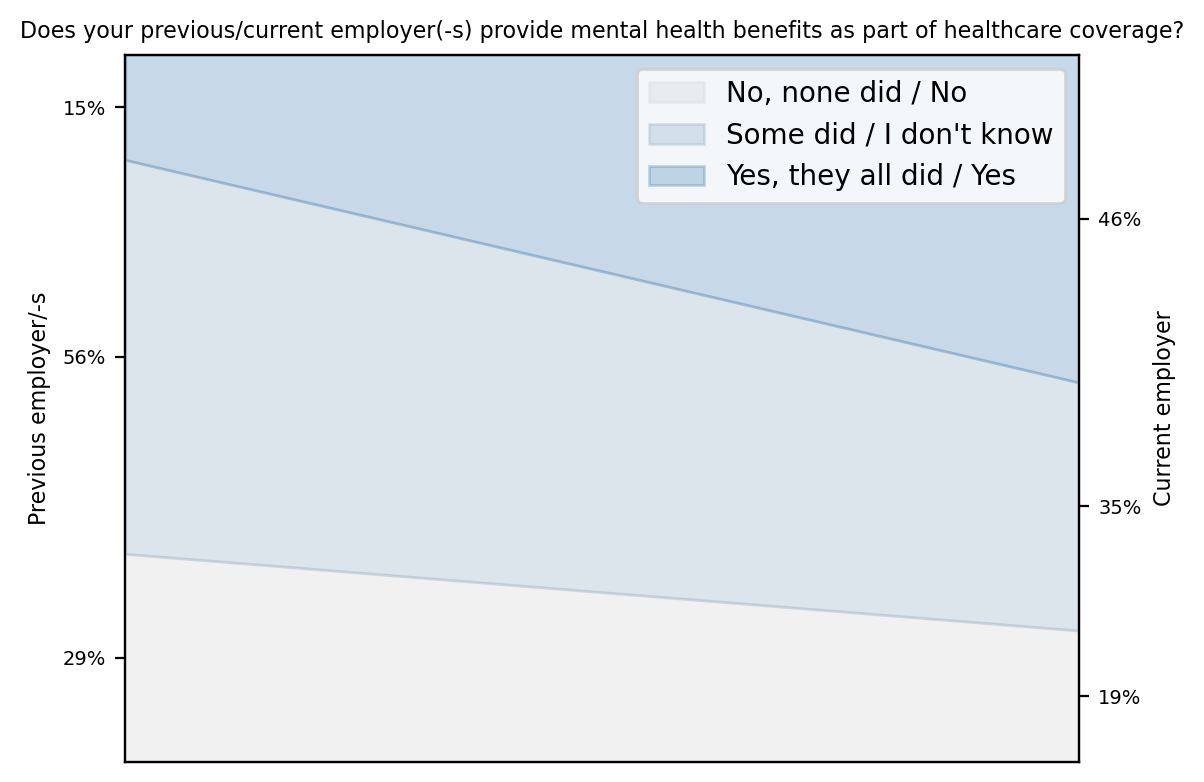

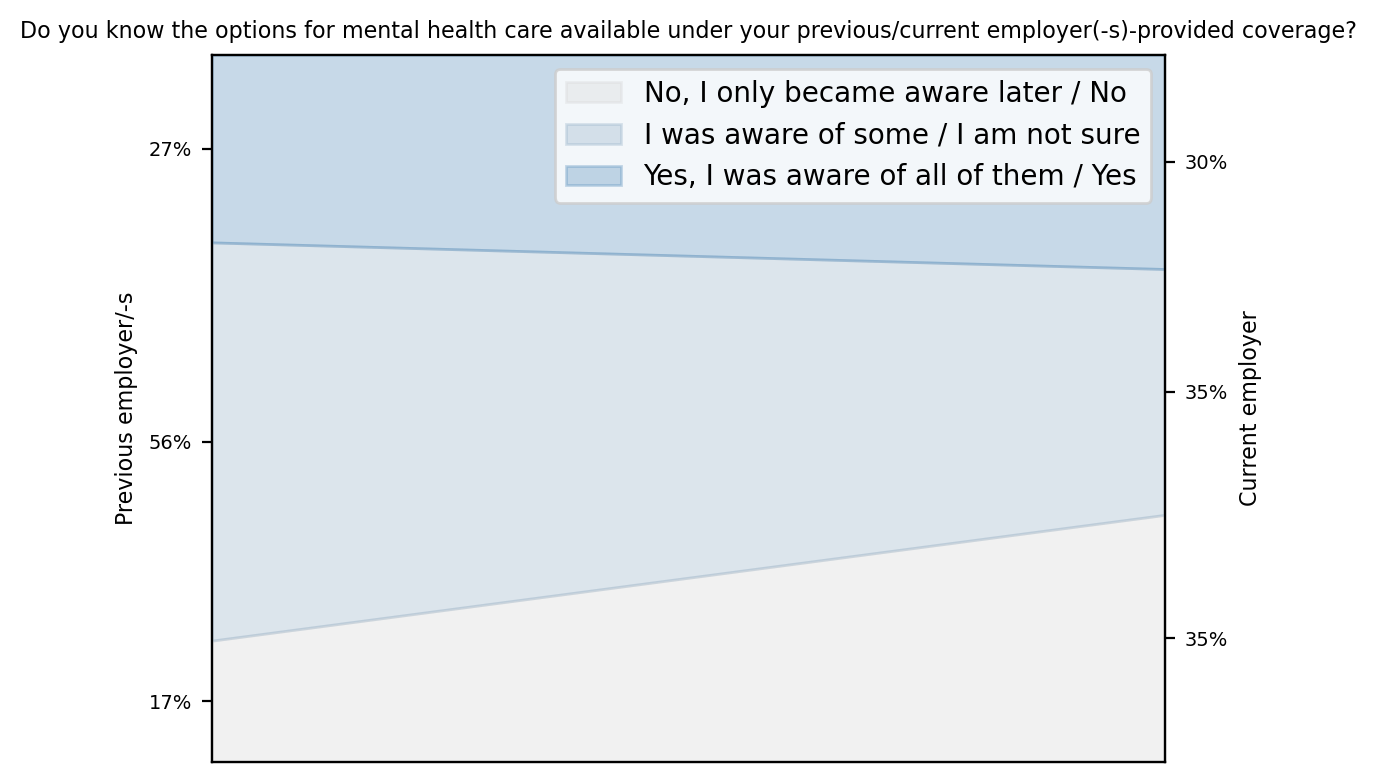

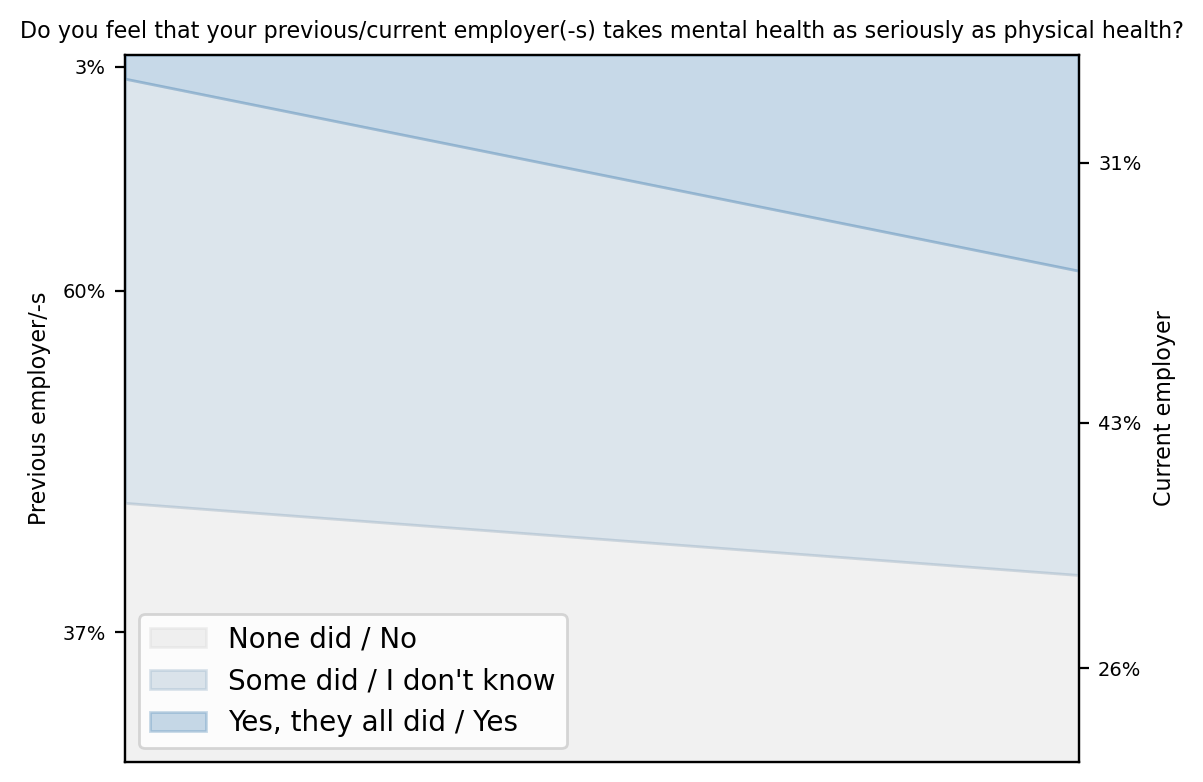

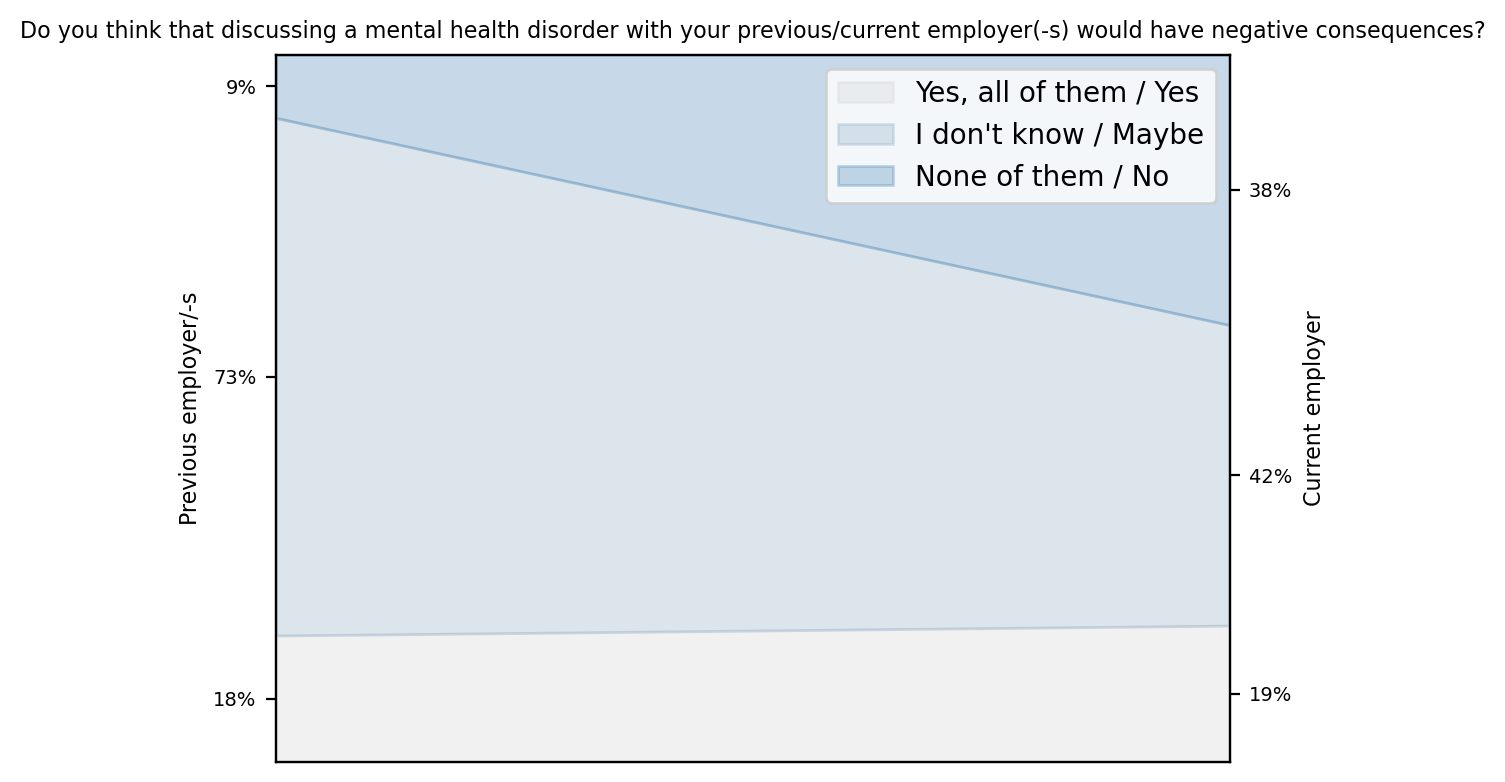

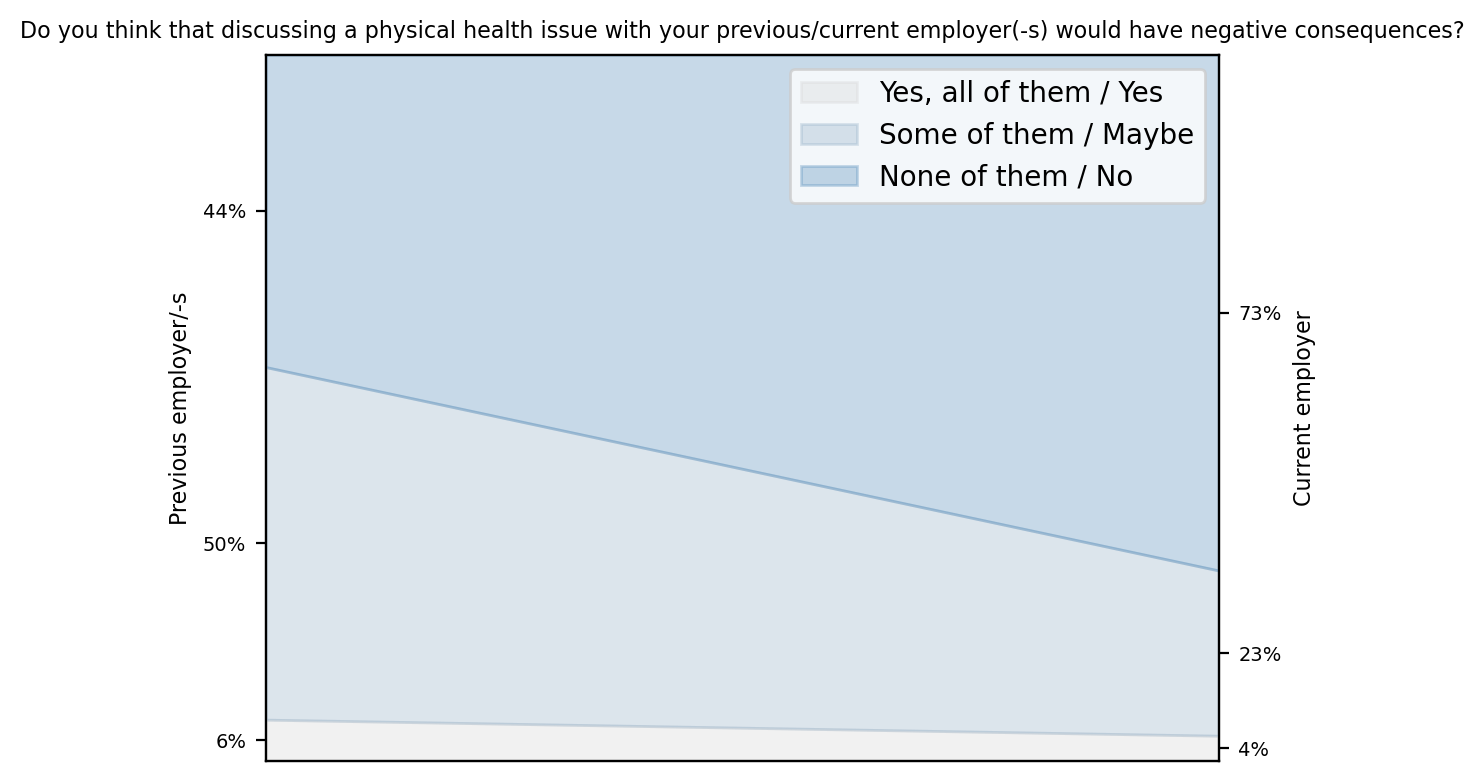

In [1689]:
for q_set in question_sets:
    prev_curr_employer(q_set)

#### 4.3. Policies, attitudes and perceptions: hypothesis testing

In [1713]:
def check_normality(q):
    data = responses[mhit_question_ids[q]].dropna()
    test_stat_normality, p_value_normality=stats.shapiro(data)
    #print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        return False #print("Reject null hypothesis >> The data is not normally distributed")
    else:
        return True #print("Fail to reject null hypothesis >> The data is normally distributed")       

In [1722]:
def check_variance_homogeneity(questions):
    q1, q2 = questions
    data = responses[[mhit_question_ids[q1], mhit_question_ids[q2]]].dropna()
    test_stat_var, p_value_var= stats.levene(data[mhit_question_ids[q1]],data[mhit_question_ids[q2]])
    #print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        return False
    else:
        return True

In [1721]:
def check_significant_diff_paired(questions):
    q1, q2 = questions
    data = responses[[mhit_question_ids[q1], mhit_question_ids[q2]]].dropna()
    if check_normality(q1) and check_normality(q2):
        if check_variance_homogeneity(q1, q2):
            
            t_stat, p_value = ttest_rel(data[mhit_question_ids[q1]],data[mhit_question_ids[q2]], 
                                        equal_var= (abs(data[mhit_question_ids[q1]].std()-data[mhit_question_ids[q2]].std())<0.05))
    else:
        w_stat, p_value = wilcoxon(data[mhit_question_ids[q1]],data[mhit_question_ids[q2]])

    if p_value < 0.05:
        return True
    else:
        return False

In [1724]:
def show_physical_vs_mental(questions):
    num_to_verbal = {n: v for v, n in zip(mhit[questions[0]].dropna(), 
                                          responses[mhit_question_ids[questions[0]]].dropna())}
    fig, axs = plt.subplots(1,2, figsize = (10, 4), sharey=True)
    plt.suptitle(f"{questions[0]}\nvs {questions[1]}", fontsize = 11)
    for i in range(2):
        sns.countplot(data = mhit,
                     x = questions[i], color = ['gray', 'steelblue'][i], stat = 'percent', ax = axs[i],
                      order = [num_to_verbal[n] for n in sorted(num_to_verbal.keys(), reverse = ('Yes' in num_to_verbal[0]))]
                     )
        axs[i].set_ylim(0,100)
        axs[i].set_title(['physical health', 'mental health'][i], fontsize = 10)
        axs[i].set_xlabel('')
        axs[i].set_ylabel('% of respondents')
        axs[i].grid(axis = 'y', which = 'major', zorder = 1)
        axs[i].set_axisbelow(True)
    
    plt.tight_layout()
    plt.show()

##### Differences between responses to similar questions regarding physical health and mental health

**Note:** this section compares responses given by the same group of respondents, which violate the requirement of independent samples, therefore I am applying a paired test

In [1728]:
physical_mental_question_sests = [('Would you be willing to bring up a physical health issue with a potential employer in an interview?',
                              'Would you bring up a mental health issue with a potential employer in an interview?'),
                                 ('Do you think that discussing a physical health issue with your employer would have negative consequences?',
              'Do you think that discussing a mental health disorder with your employer would have negative consequences?'),
                                 ('Do you think that discussing a physical health issue with previous employers would have negative consequences?',
            'Do you think that discussing a mental health disorder with previous employers would have negative consequences?'),
]

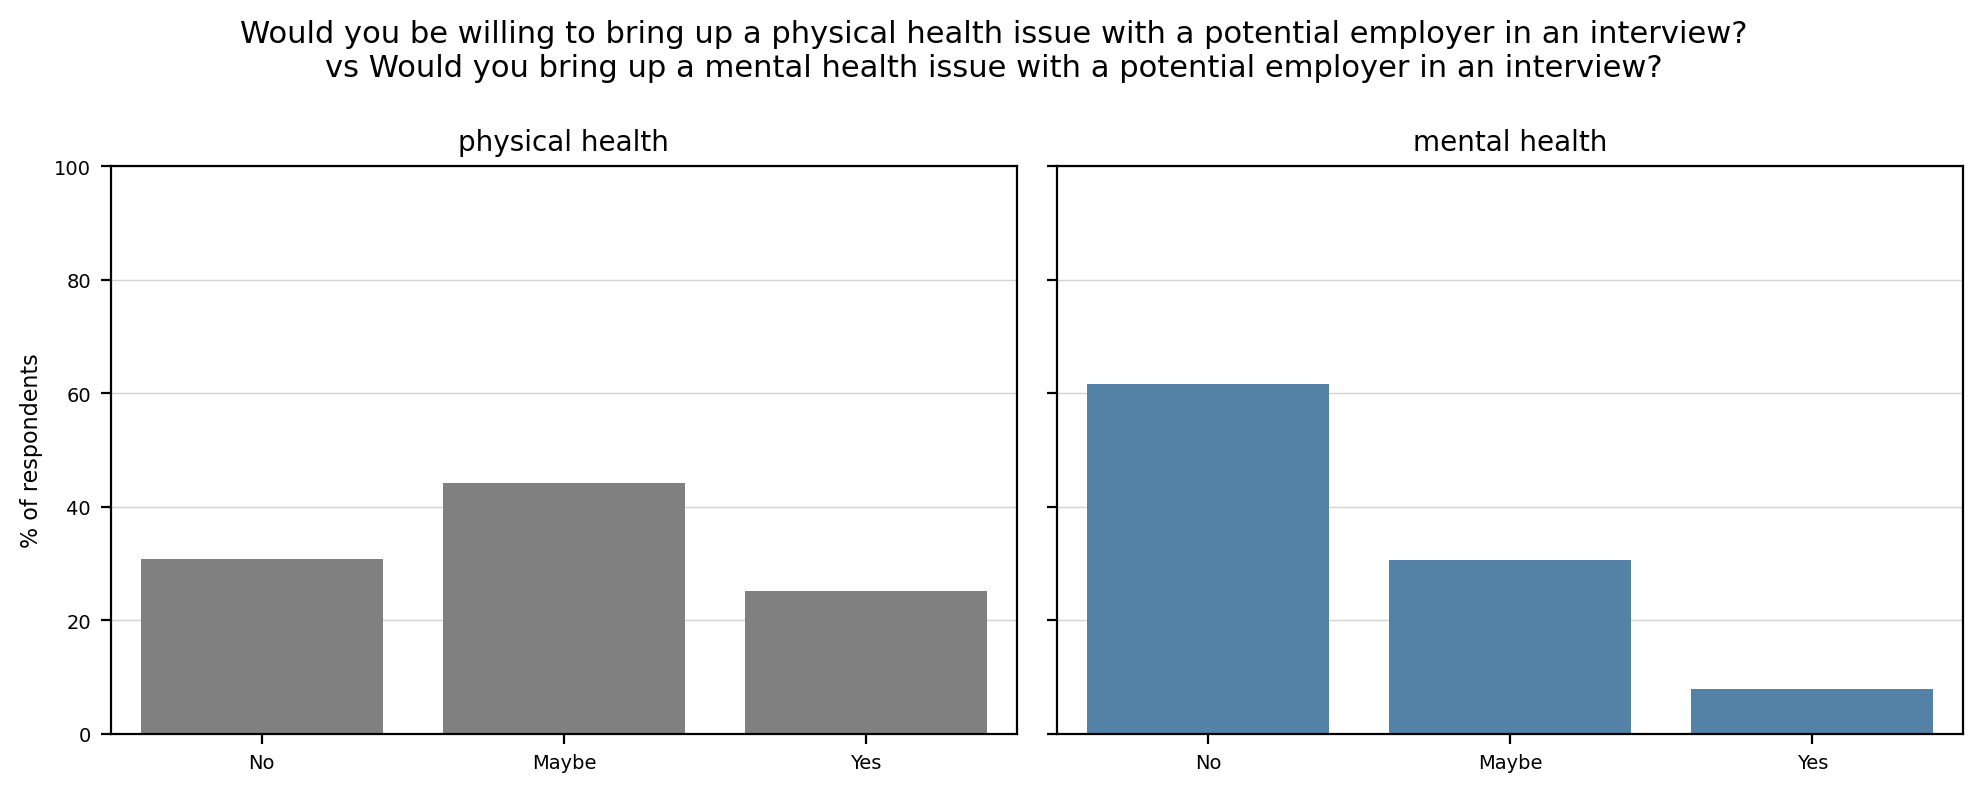

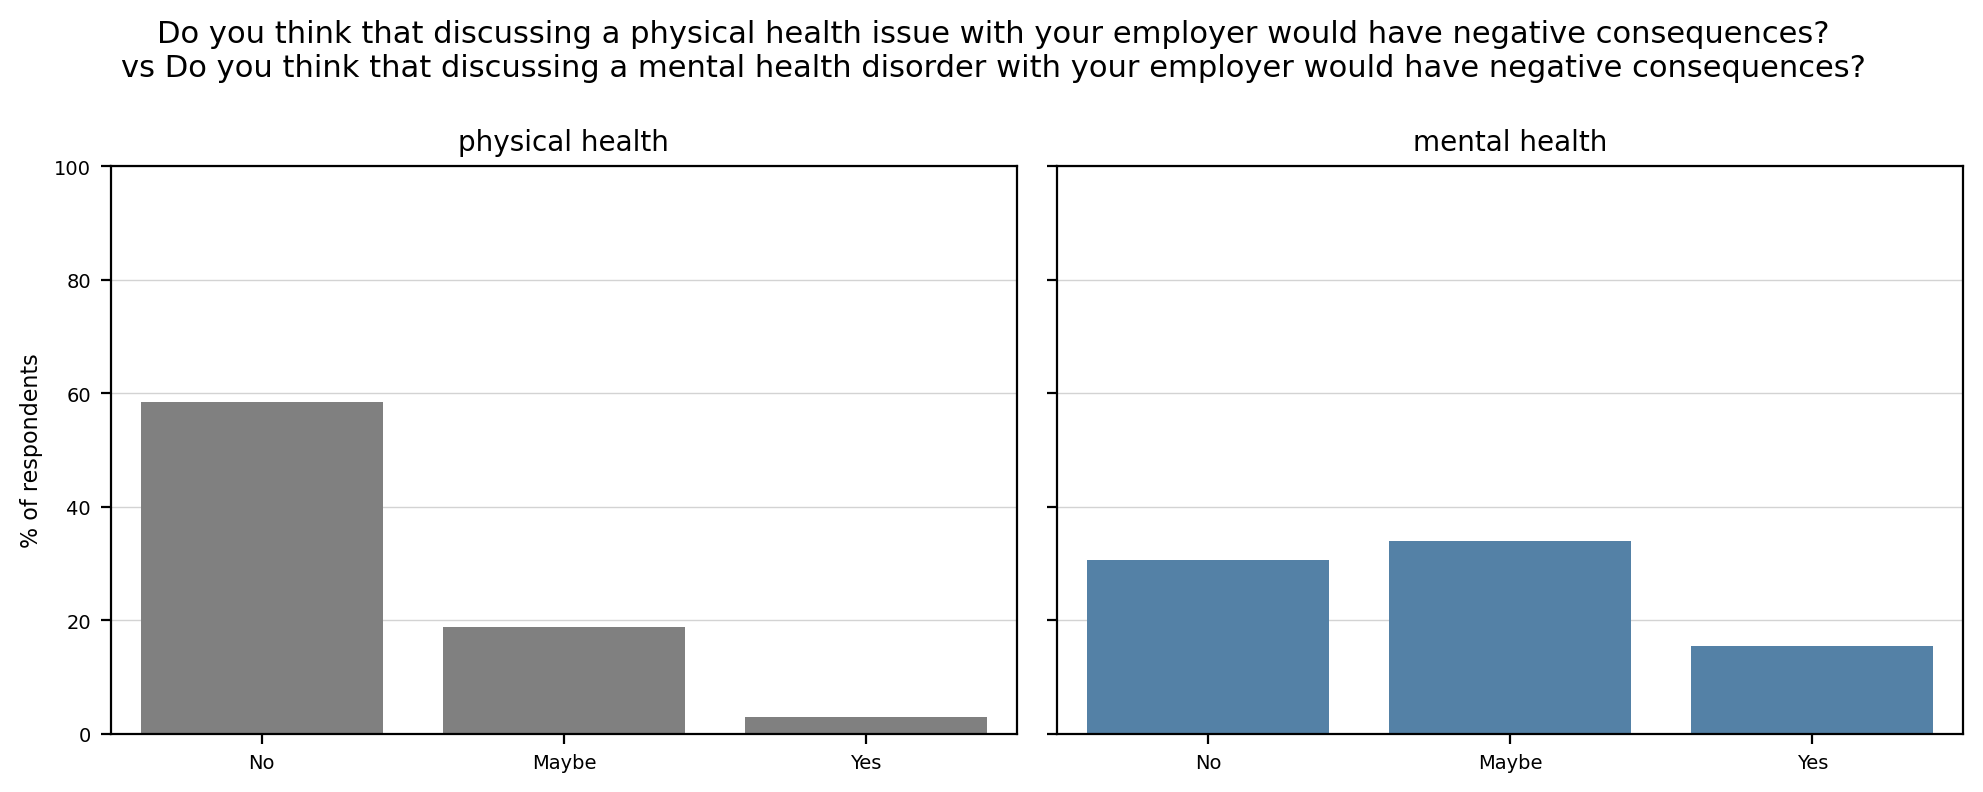

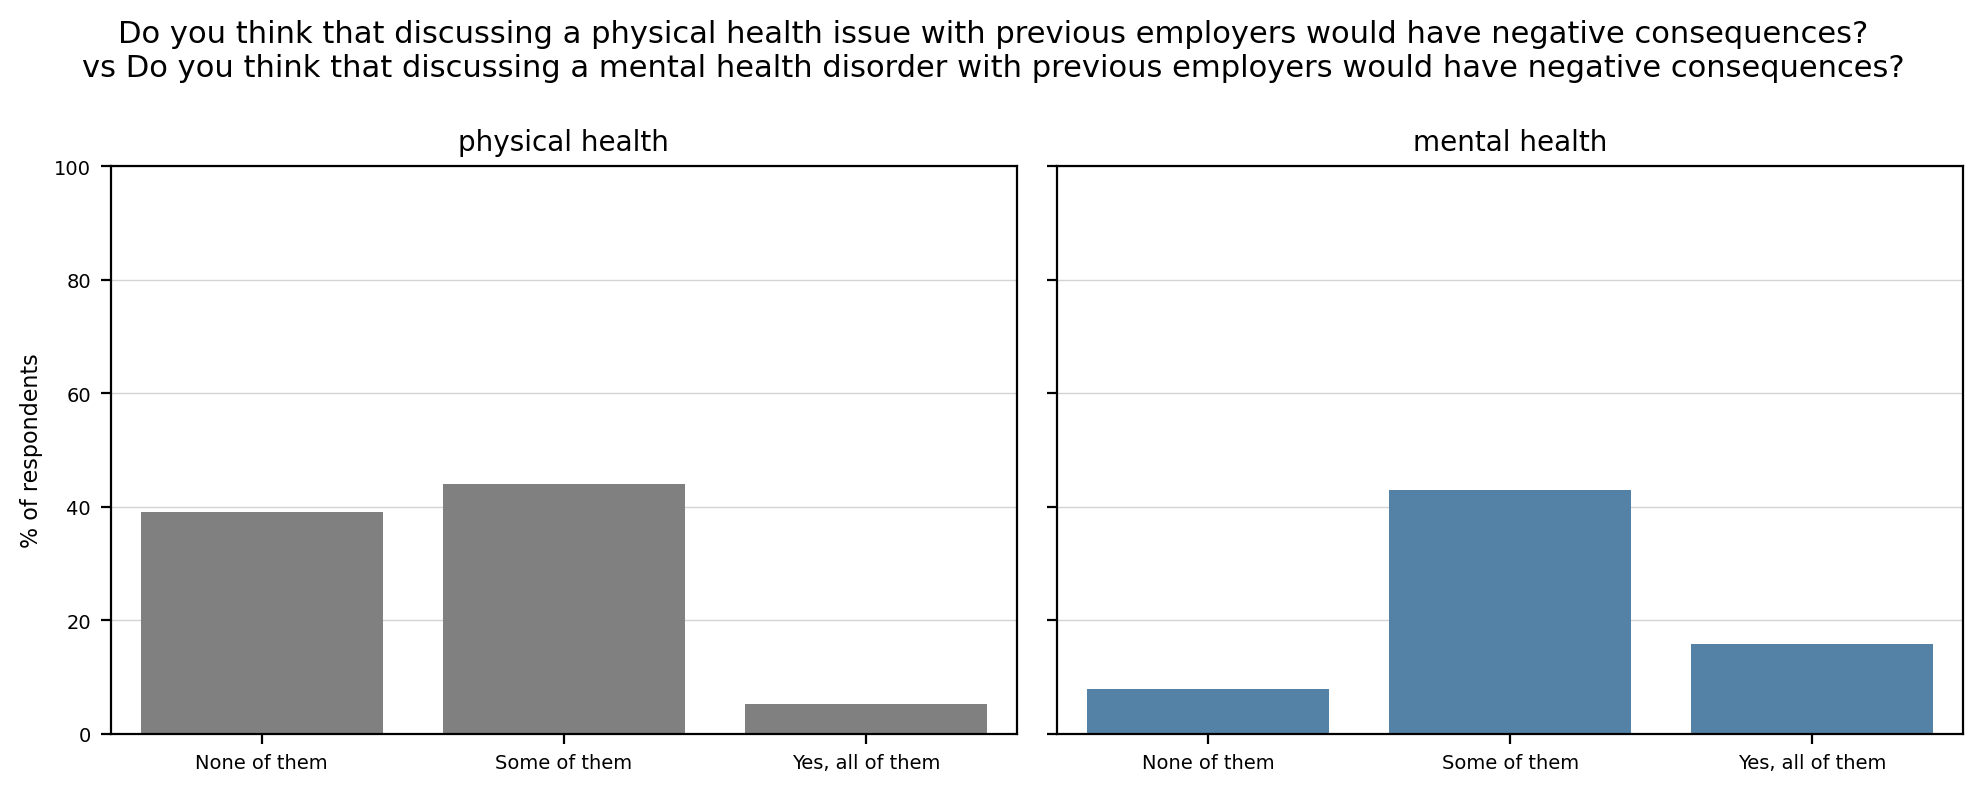

In [1729]:
for questions in physical_mental_question_sests:
    if check_significant_diff_paired(questions):
        show_physical_vs_mental(questions)

In [1075]:
def check_hypothesis(question, groups = 'tech and non-tech', relation_b_groups = '<', sig_level = 0.05):
    if groups == 'tech and non-tech':
        a, b = tech_responses[question], nontech_responses[question]
    elif groups == 'us and non-us':
        a, b = us_responses[question], nonus_responses[question]
    elif groups == 'affected and not':
        a, b = aff_responses[question], nonaff_responses[question]
    elif groups == 'lg and smb':
        a, b = lc_responses[question], nonlc_responses[question]
    elif groups == 'se vs non-se':
        a, b = se_responses[question], nonse_responses[question]
    
    if relation_b_groups == '=':
        alt, relation_descr = 'two-sided', 'differences' 
    
    else:
        alt, relation_descr = 'less', 'positive differences'
        if relation_b_groups == '>':
            alt, relation_descr = 'greater', 'negative differences'
    
    stat, pval = stats.ttest_ind(a, b, alternative = alt,
                equal_var = (round(a.std(),1) == round(b.std(),1)))
        
    if pval < sig_level*(0.5)**(relation_b_groups!='='):
        #print(f'Reject null hypothesis: responses point to significant {relation_descr} in perceptions between {groups}.')
        return question
    else:
        #print(f"Not enough evidence to conclude that {groups} differ.")
        pass

In [1071]:
mhit['How many employees does your company or organization have?'].value_counts()

How many employees does your company or organization have?
26-100            292
More than 1000    256
100-500           248
6-25              210
500-1000           80
1-5                60
Name: count, dtype: int64

In [1069]:
se_responses = responses[responses.index.isin(demo[demo['Q1']==1].index.unique())]
nonse_responses = responses[responses.index.isin(demo[demo['Q1']==0].index.unique())]
print(se_responses.shape[0], 'responses from self-employed respondents', nonse_responses.shape[0], 'company employee responses')

287 responses from self-employed respondents 1146 company employee responses


In [1074]:
lc_responses = responses[responses.index.isin(mhit[mhit['How many employees does your company or organization have?'].isin(['More than 1000', '500-1000', '100-500'])].index.unique())]
nonlc_responses = responses[~responses.index.isin(mhit[mhit['How many employees does your company or organization have?'].isin(['More than 1000', '500-1000', '100-500'])].index.unique())]
print(lc_responses.shape[0], 'responses from large company employees (100+) and', nonlc_responses.shape[0], 'smaller company employees')

584 responses from large company employees (100+) and 849 smaller company employees


In [254]:
tech_responses = responses[responses.index.isin(demo[demo['Q3']==1].index.unique())]
nontech_responses = responses[responses.index.isin(demo[demo['Q3']==0].index.unique())]
print(tech_responses.shape[0], 'responses from tech employees and', nontech_responses.shape[0], 'non-tech employee responses')

883 responses from tech employees and 263 non-tech employee responses


In [255]:
us_responses = responses[responses.index.isin(demo[demo['Q60']=='United States of America'].index.unique())]
nonus_responses = responses[responses.index.isin(demo[demo['Q60']!='United States of America'].index.unique())]
print(us_responses.shape[0], 'responses from US employees and', nonus_responses.shape[0], 'non-US employee responses')

851 responses from US employees and 582 non-US employee responses


In [295]:
aff_responses = responses[responses.index.isin(set(list(diagnosed_conditions[diagnosed_conditions.T.sum()>0].index)
                                                    +list(current_conditions[current_conditions.T.sum()>0].index)))]
nonaff_responses = responses[~responses.index.isin(aff_responses.index.unique())]
print(aff_responses.shape[0], 'responses from employees affected by mental conditions and', nonaff_responses.shape[0], 'from not affected employees')

973 responses from employees affected by mental conditions and 460 from not affected employees


##### Differences between responses from tech employees vs non-tech employees

In [305]:
significant_diff = {sign: {} for sign in ['<', '>', '=']}


for sign in ['<', '>', '=']:
    significant_diff[sign]['tech_vs_nontech'] = []
    for qid in responses.columns:
        try:
            significant_diff[sign]['tech_vs_nontech'].append(check_hypothesis(qid, relation_b_groups=sign))
        except:
            pass

In [643]:
for question in ['Q55', 'Q54', 'Q53']:#responses.columns[23:]:
    try:
        print(mhit_question_ids_rev[question])
        maxi = responses[responses[question]==responses[question].max()].sample().index.item()
        print(f"{responses[question].max()} = {mhit.loc[maxi, mhit_question_ids_rev[question]]}")
        mini = responses[responses[question]==responses[question].min()].sample().index.item()
        print(f"{responses[question].min()} = {mhit.loc[mini, mhit_question_ids_rev[question]]}")
        need_to_reverse = (input(f'Reverse?')=='y')
        if need_to_reverse:
            #pass
            responses[question] = responses[question].map({sorted(responses[question].fillna(0).unique())[i]: sorted(responses[question].fillna(0).unique(), reverse = True)[i] 
                                                            for i in range(responses[question].fillna(0).nunique())})
    except:
        pass

If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?
0.5 = Sometimes
0.0 = Often


Reverse? y


If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?
0.5 = Sometimes
0.0 = Never


Reverse? n


Have you ever sought treatment for a mental health issue from a mental health professional?
1 = 1
0 = 0


Reverse? n


In [47]:
responses = pd.read_csv('responses_w_ids.csv', index_col = 'rid')
demo = pd.read_csv('demographics_w_ids.csv', index_col = 'rid')

In [54]:
mhit_question_ids['Is your employer primarily a tech company/organization?']

'Q3'

In [625]:
mhit_question_ids['What country do you work in?']#

'Q60'

$H_{0}$: $\mu_{t}>= \mu_{nt}$     
$H_{1}$: $\mu_{t}<  \mu_{nt}$

In [ ]:
for question in set(significant_diff['<']['tech_vs_nontech']):
    if not question == None:
        print(mhit_question_ids_rev[question])

$H_{0}$: $\mu_{t}<= \mu_{nt}$     
$H_{1}$: $\mu_{t}>  \mu_{nt}$

In [478]:
mhit_question_ids_rev['Q7']

'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'

In [ ]:
for question in set(significant_diff['>']['tech_vs_nontech']):
    if not question == None:
        print(mhit_question_ids_rev[question])

Tech < non-tech for questions:
Does your employer offer resources to learn more about mental health concerns and options for seeking help?
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?

Tech > non-tech for questions:
Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?
Would you feel comfortable discussing a mental health disorder with your coworkers?
Do you think that discussing a mental health disorder with your employer would have negative consequences?


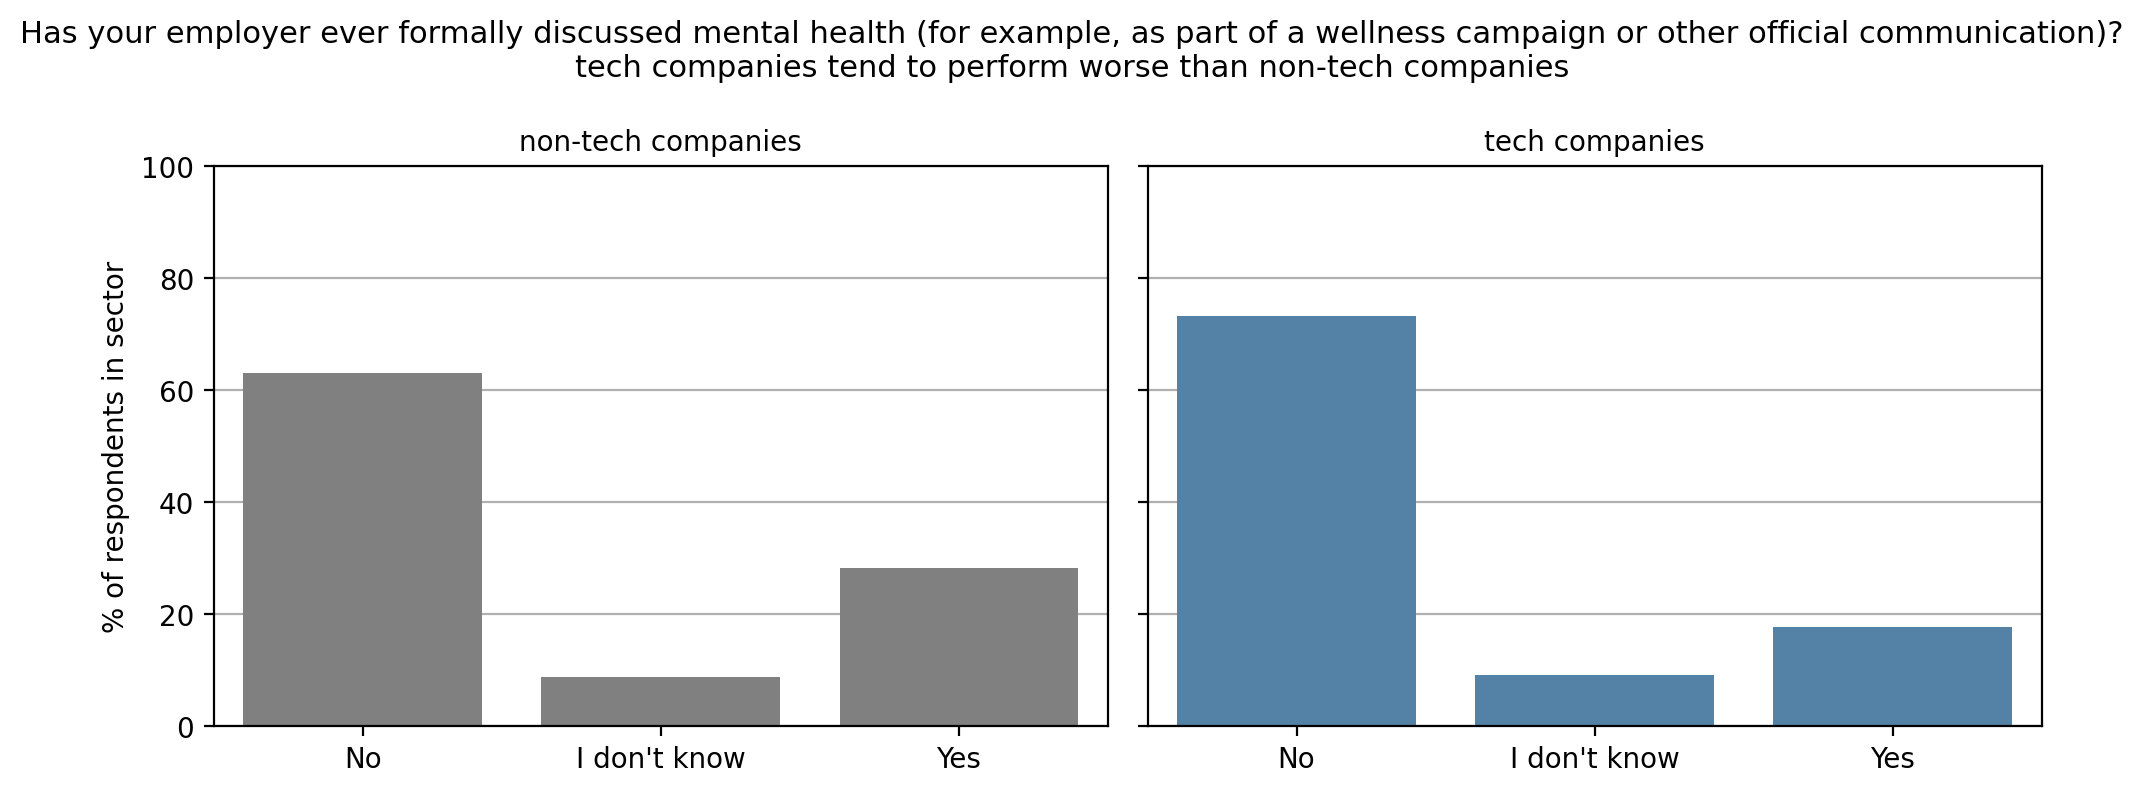

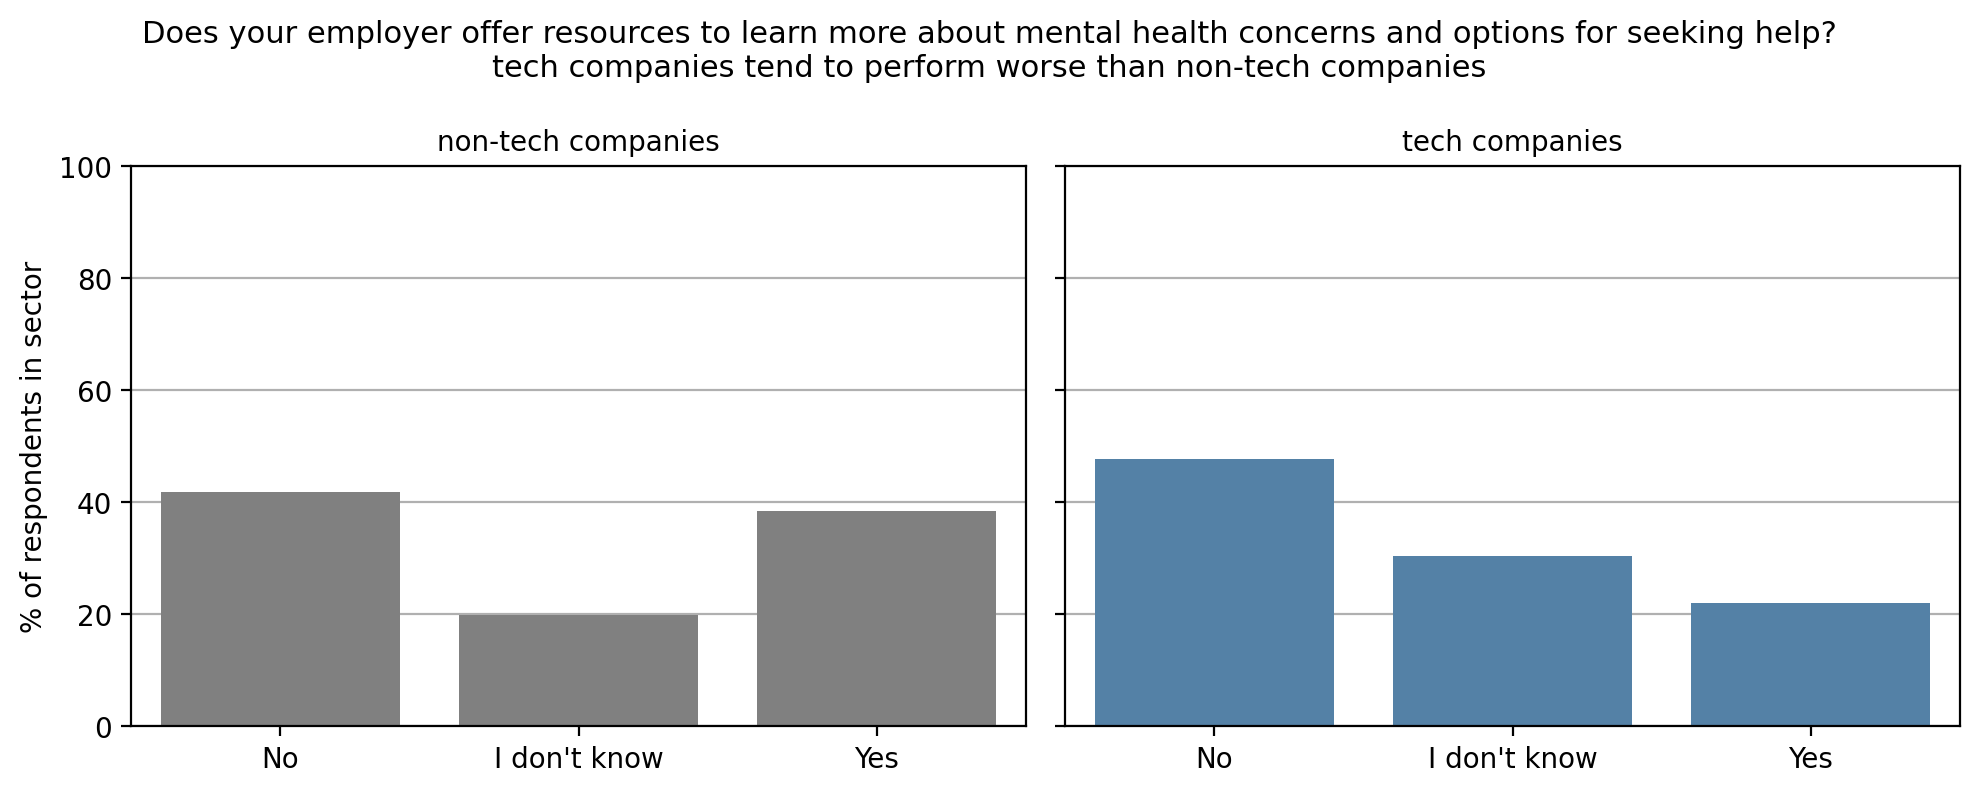

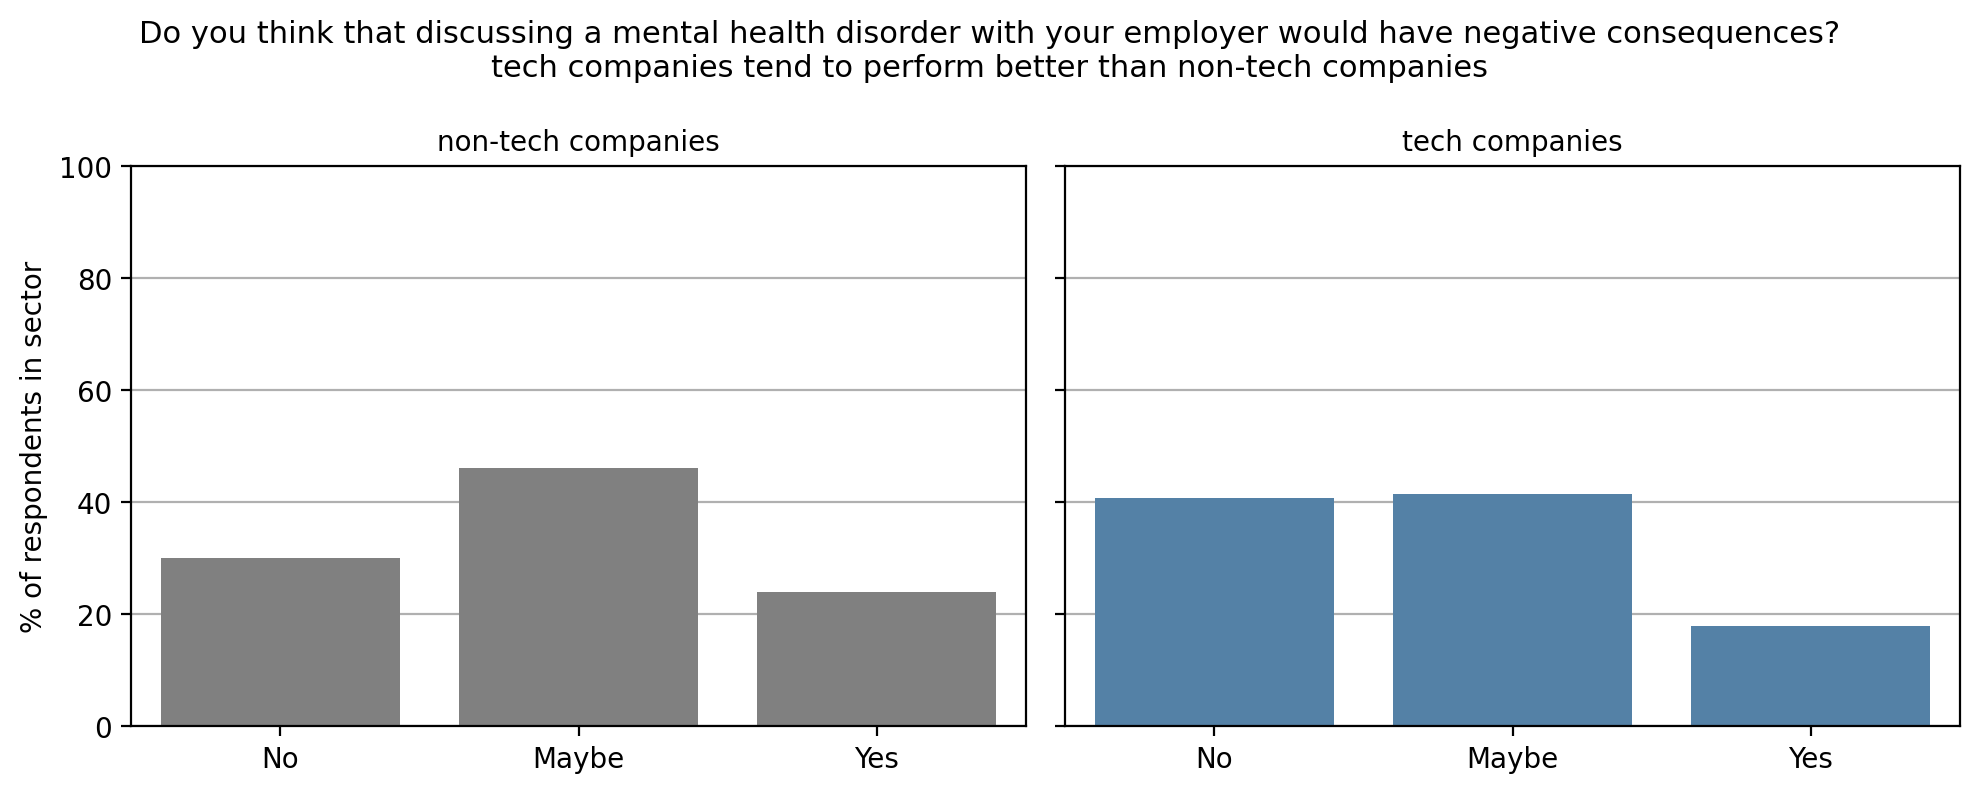

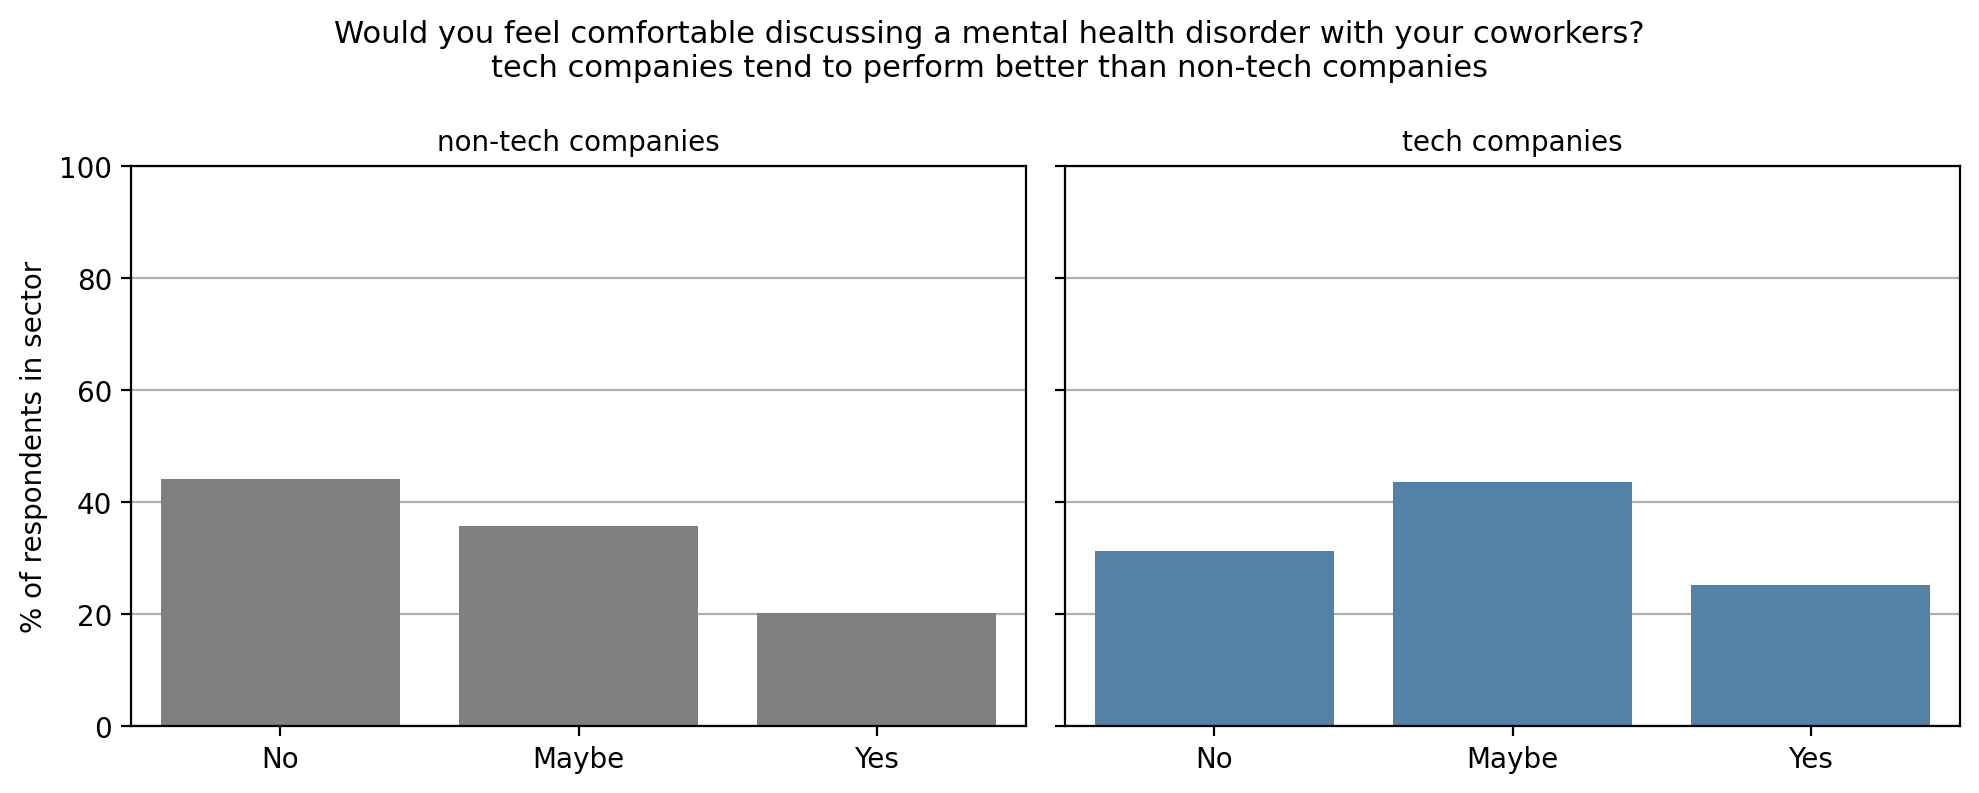

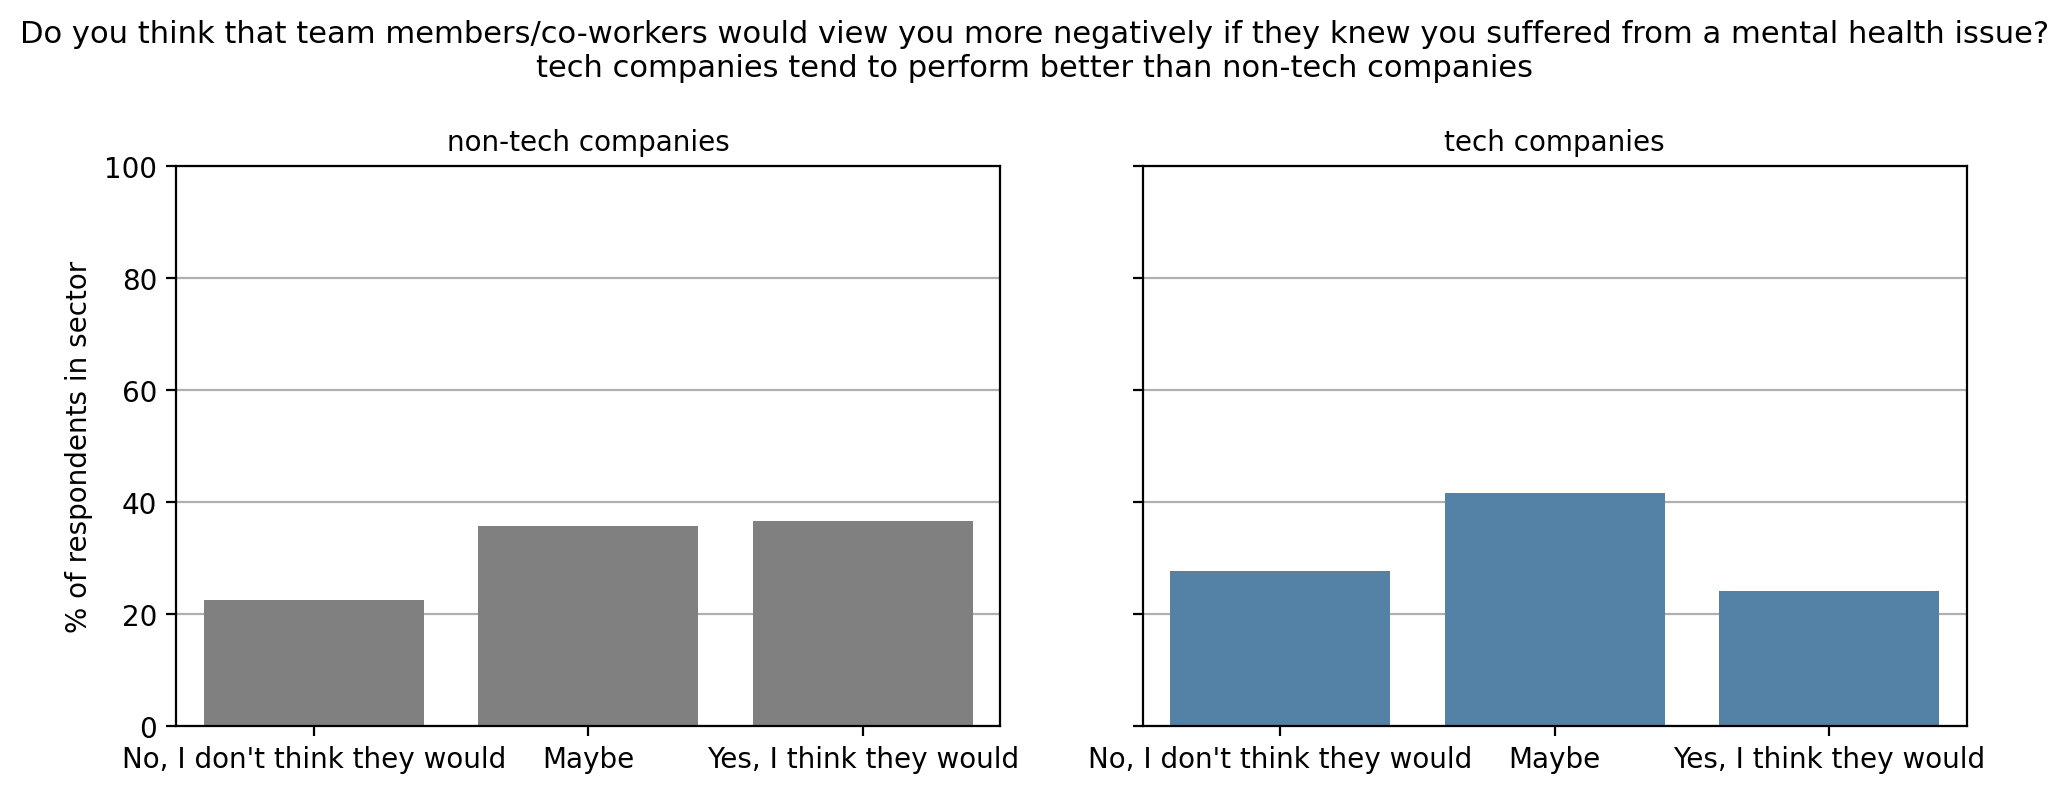

In [488]:
for question in (list(significant_diff['<']['tech_vs_nontech'])+
                 list(significant_diff['>']['tech_vs_nontech'])):
    if not question == None:
        bow = ['better', 'worse'][question in significant_diff['<']['tech_vs_nontech']]
        num_to_verbal = {n: v for v, n in zip(mhit[mhit_question_ids_rev[question]].dropna(), responses[question].dropna())}
        fig, axs = plt.subplots(1,2, figsize = (10, 4), sharey=True)
        plt.suptitle(f"{mhit_question_ids_rev[question]}\ntech companies tend to perform {bow} than non-tech companies", fontsize = 11)
        for i in range(2):
            sns.countplot(data = mhit[mhit['Is your employer primarily a tech company/organization?']==i],
                         x = mhit_question_ids_rev[question], color = ['gray', 'steelblue'][i], stat = 'percent', ax = axs[i],
                          order = [num_to_verbal[n] for n in sorted(num_to_verbal.keys(), reverse = ('Yes' in num_to_verbal[0]))])
            axs[i].set_ylim(0,100)
            axs[i].set_title(['non-tech companies', 'tech companies'][i], fontsize = 10)
            axs[i].set_xlabel('')
            axs[i].set_ylabel('% of respondents in sector')
            axs[i].grid(axis = 'y', which = 'major', zorder = 1)
            axs[i].set_axisbelow(True)

        plt.tight_layout()
        plt.show()

##### Differences between responses from large company employees vs SMB employees

In [1077]:
for sign in ['<', '>', '=']:
    significant_diff[sign]['lg_vs_smb'] = []
    for qid in responses.columns:
        try:
            significant_diff[sign]['lg_vs_smb'].append(check_hypothesis(qid, groups = 'lg and smb', relation_b_groups=sign))
        except:
            pass

$H_{0}$: $\mu_{l}>= \mu_{sm}$     
$H_{1}$: $\mu_{l}<  \mu_{sm}$

In [1080]:
for question in set(significant_diff['<']['lg_vs_smb']):
    if not question == None:
        print(mhit_question_ids_rev[question])

Would you bring up a mental health issue with a potential employer in an interview?
Would you be willing to bring up a physical health issue with a potential employer in an interview?


$H_{0}$: $\mu_{l}<= \mu_{sm}$     
$H_{1}$: $\mu_{l}>  \mu_{sm}$

In [1082]:
for question in set(significant_diff['>']['lg_vs_smb']):
    if not question == None:
        print(mhit_question_ids_rev[question])

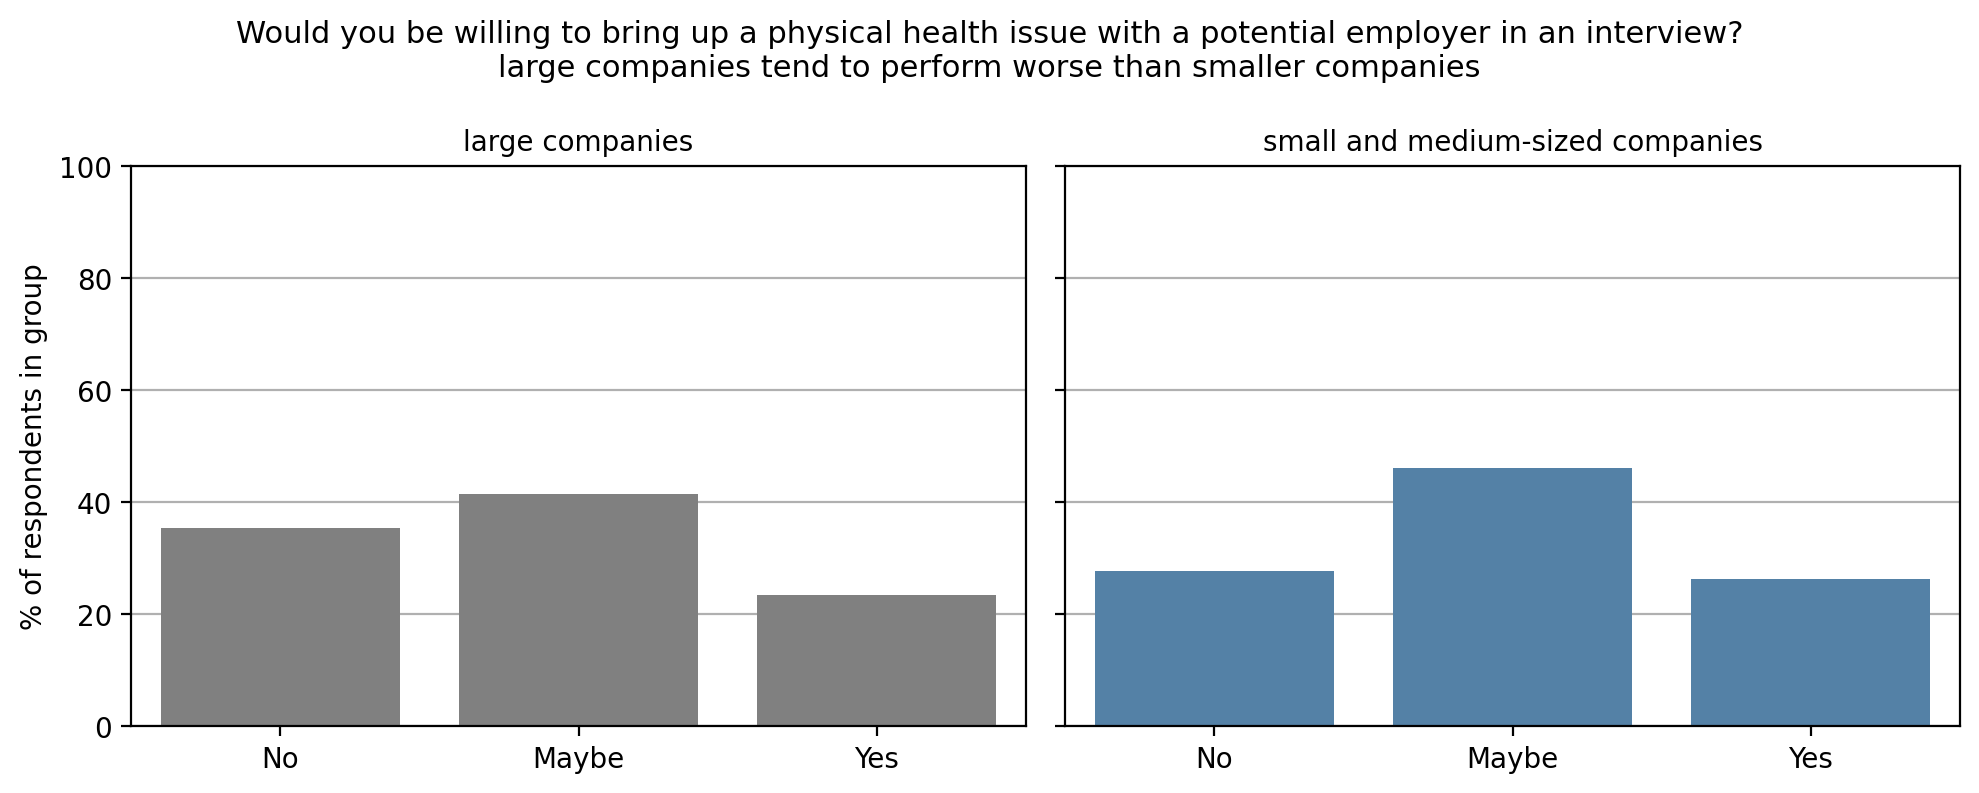

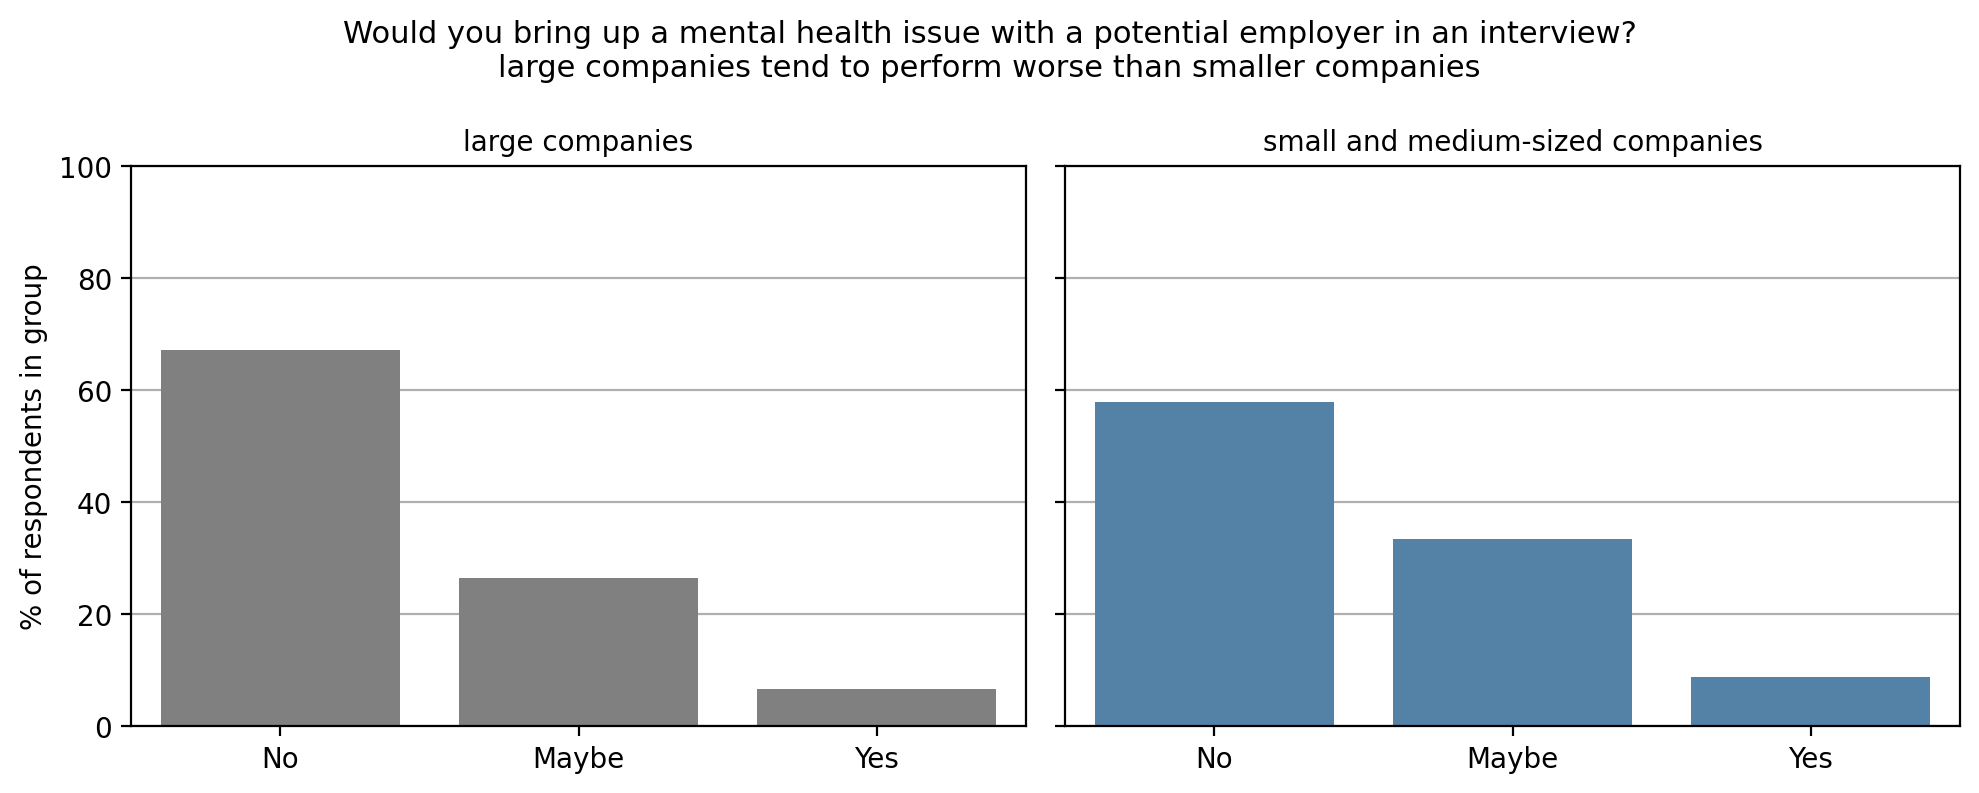

In [1088]:
for question in (list(significant_diff['<']['lg_vs_smb'])
                ):
    if not question == None:
        bow = ['better', 'worse'][question in significant_diff['<']['lg_vs_smb']]
        num_to_verbal = {n: v for v, n in zip(mhit[mhit_question_ids_rev[question]].dropna(), responses[question].dropna())}
        fig, axs = plt.subplots(1,2, figsize = (10, 4), sharey=True)
        plt.suptitle(f"{mhit_question_ids_rev[question]}\nlarge companies tend to perform {bow} than smaller companies", fontsize = 11)
        conditions = [mhit.index.isin(lc_responses.index), ~mhit.index.isin(lc_responses.index)]
        for i in range(2):
            sns.countplot(data = mhit[conditions[i]],
                         x = mhit_question_ids_rev[question], color = ['gray', 'steelblue'][i], stat = 'percent', ax = axs[i],
                          order = [num_to_verbal[n] for n in sorted(num_to_verbal.keys(), reverse = ('Yes' in num_to_verbal[0]))])
            axs[i].set_ylim(0,100)
            axs[i].set_title(['large companies', 'small and medium-sized companies'][i], fontsize = 10)
            axs[i].set_xlabel('')
            axs[i].set_ylabel('% of respondents in group')
            axs[i].grid(axis = 'y', which = 'major', zorder = 1)
            axs[i].set_axisbelow(True)

        plt.tight_layout()
        plt.show()

##### Differences between responses from company employees vs self-employed workers

In [1091]:
for sign in ['<', '>', '=']:
    significant_diff[sign]['se_vs_nse'] = []
    for qid in responses.columns:
        try:
            significant_diff[sign]['se_vs_nse'].append(check_hypothesis(qid, groups = 'se vs non-se', relation_b_groups=sign))
        except:
            pass

$H_{0}$: $\mu_{se}>= \mu_{nse}$     
$H_{1}$: $\mu_{se}<  \mu_{nse}$

In [1092]:
for question in set(significant_diff['<']['se_vs_nse']):
    if not question == None:
        print(mhit_question_ids_rev[question])

Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?


$H_{0}$: $\mu_{se}<= \mu_{nse}$     
$H_{1}$: $\mu_{se}>  \mu_{nse}$

In [1089]:
for question in set(significant_diff['>']['se_vs_nse']):
    if not question == None:
        print(mhit_question_ids_rev[question])

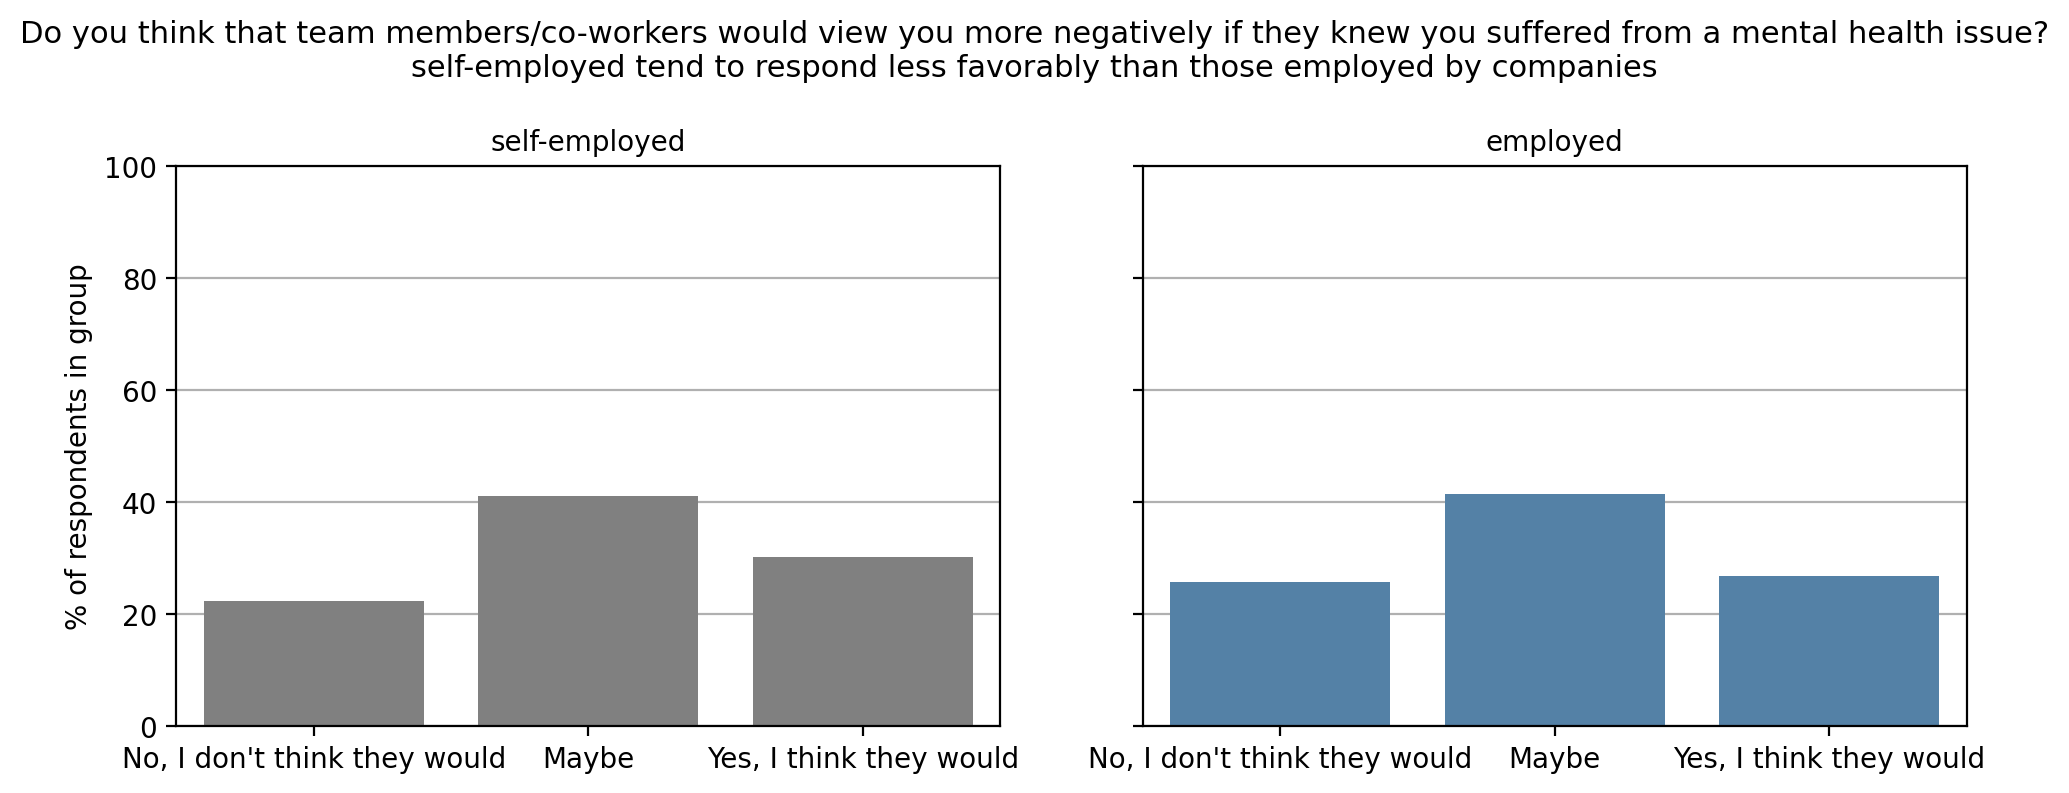

In [1090]:
for question in (list(significant_diff['<']['se_vs_nse'])
                ):
    if not question == None:
        bow = ['more', 'less'][question in significant_diff['<']['se_vs_nse']]
        num_to_verbal = {n: v for v, n in zip(mhit[mhit_question_ids_rev[question]].dropna(), responses[question].dropna())}
        fig, axs = plt.subplots(1,2, figsize = (10, 4), sharey=True)
        plt.suptitle(f"{mhit_question_ids_rev[question]}\nself-employed tend to respond {bow} favorably than those employed by companies", fontsize = 11)
        conditions = [mhit.index.isin(lc_responses.index), ~mhit.index.isin(lc_responses.index)]
        for i in range(2):
            sns.countplot(data = mhit[conditions[i]],
                         x = mhit_question_ids_rev[question], color = ['gray', 'steelblue'][i], stat = 'percent', ax = axs[i],
                          order = [num_to_verbal[n] for n in sorted(num_to_verbal.keys(), reverse = ('Yes' in num_to_verbal[0]))])
            axs[i].set_ylim(0,100)
            axs[i].set_title(['self-employed', 'employed'][i], fontsize = 10)
            axs[i].set_xlabel('')
            axs[i].set_ylabel('% of respondents in group')
            axs[i].grid(axis = 'y', which = 'major', zorder = 1)
            axs[i].set_axisbelow(True)

        plt.tight_layout()
        plt.show()

##### Differences between responses from employees based in the US vs non-US employees

In [306]:
for sign in ['<', '>', '=']:
    significant_diff[sign]['us_vs_nonus'] = []
    for qid in responses.columns:
        try:
            significant_diff[sign]['us_vs_nonus'].append(check_hypothesis(qid, groups = 'US and non US', relation_b_groups=sign))
        except:
            pass

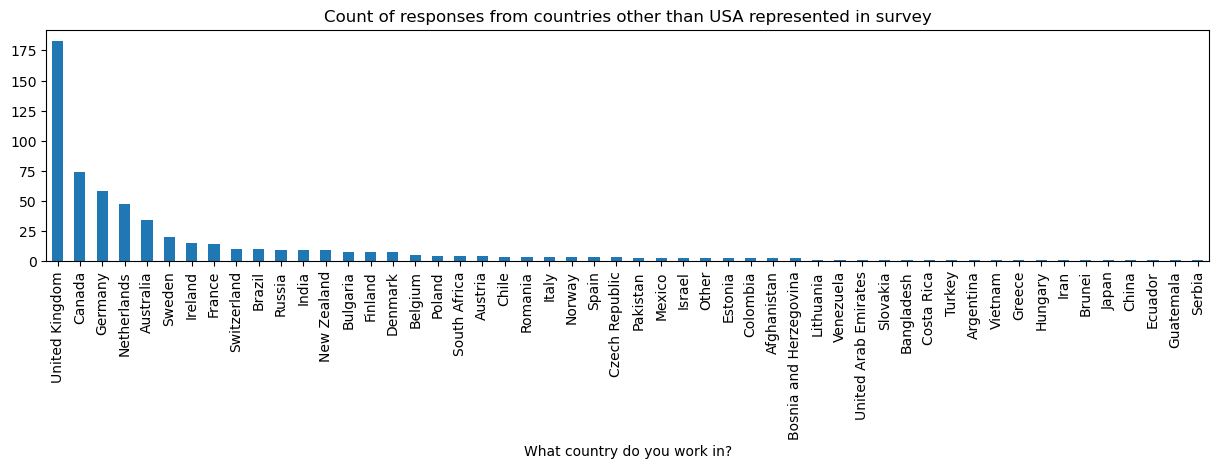

In [628]:
mhit[mhit['What country do you work in?']!='United States of America']['What country do you work in?'].value_counts().plot(kind = 'bar', figsize = (15,3))
plt.xticks(range(mhit[mhit['What country do you work in?']!='United States of America']['What country do you work in?'].value_counts().shape[0]),
          mhit[mhit['What country do you work in?']!='United States of America']['What country do you work in?'].value_counts().index, 
          rotation = 90)
plt.title('Count of responses from countries other than USA represented in survey');

$H_{0}$: $\mu_{US}>= \mu_{non-US}$     
$H_{1}$: $\mu_{US}<  \mu_{non-US}$

In [ ]:
for question in set(significant_diff['<']['us_vs_nonus']):
    if not question == None:
        print(mhit_question_ids_rev[question])

$H_{0}$: $\mu_{US}<= \mu_{non-US}$     
$H_{1}$: $\mu_{US}>  \mu_{non-US}$

In [ ]:
for question in set(.significant_diff['>']['us_vs_nonus']):
    if not question == None:
        print(mhit_question_ids_rev[question])

US < non-US for questions:
Would you bring up a mental health issue with a potential employer in an interview?
Would you be willing to bring up a physical health issue with a potential employer in an interview?

US > non-US for questions:
Do you have a family history of mental illness?
Do you have previous employers?
Have you ever sought treatment for a mental health issue from a mental health professional?
Do you currently have a mental health disorder?
Have you been diagnosed with a mental health condition by a medical professional?
Have you had a mental health disorder in the past?


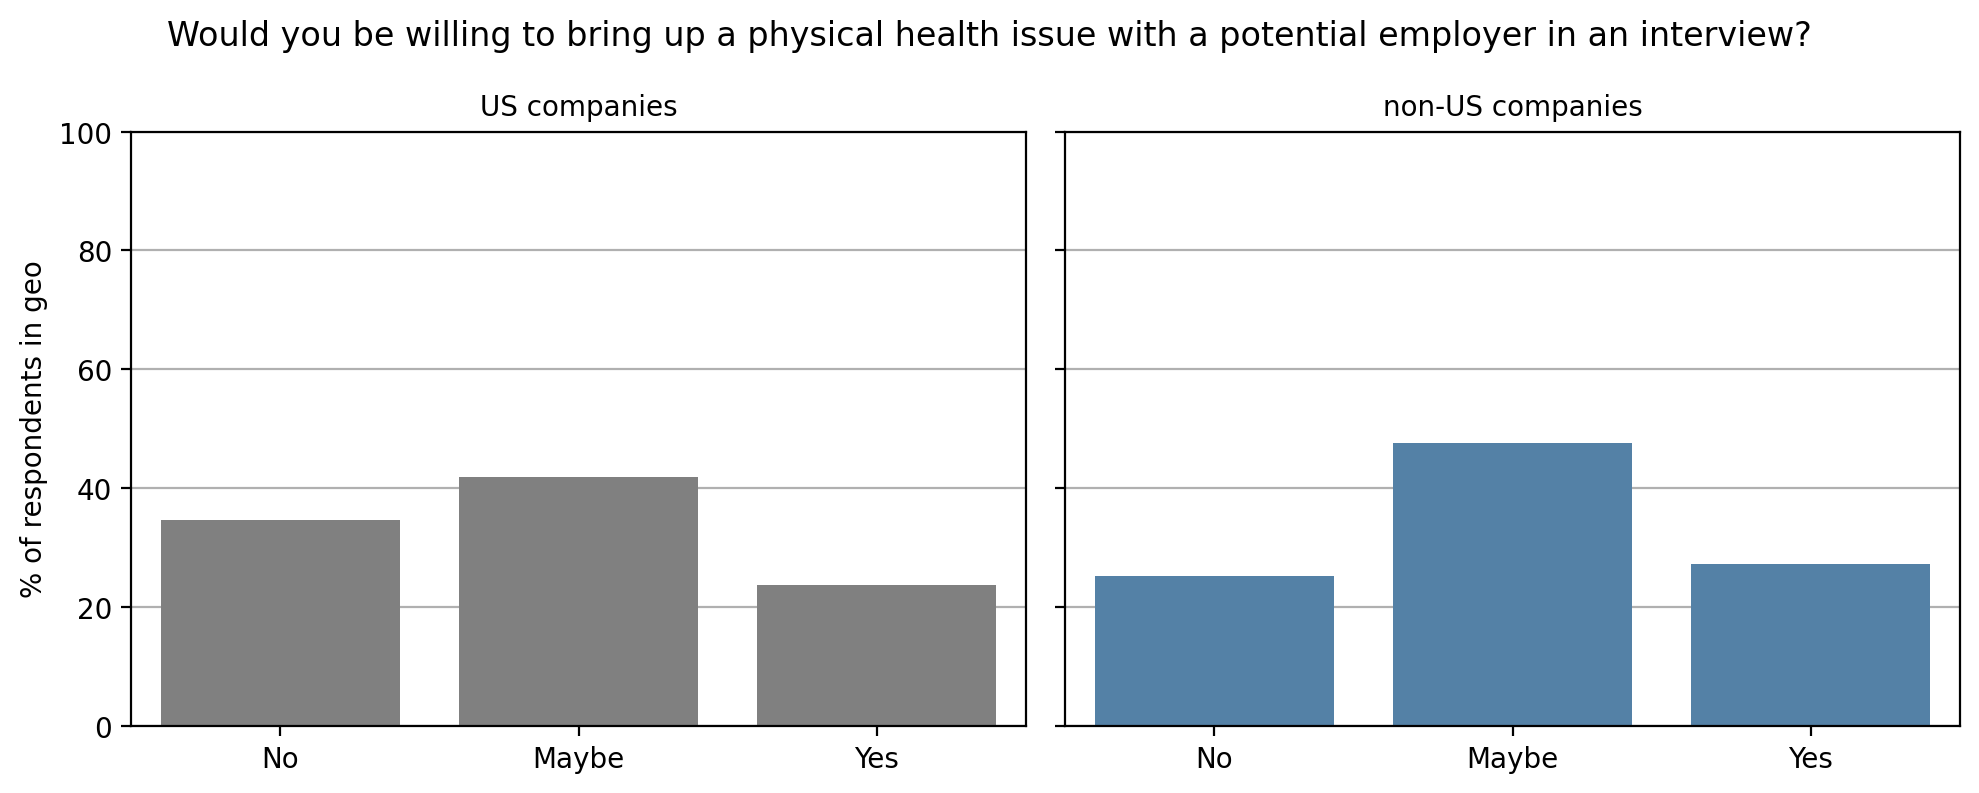

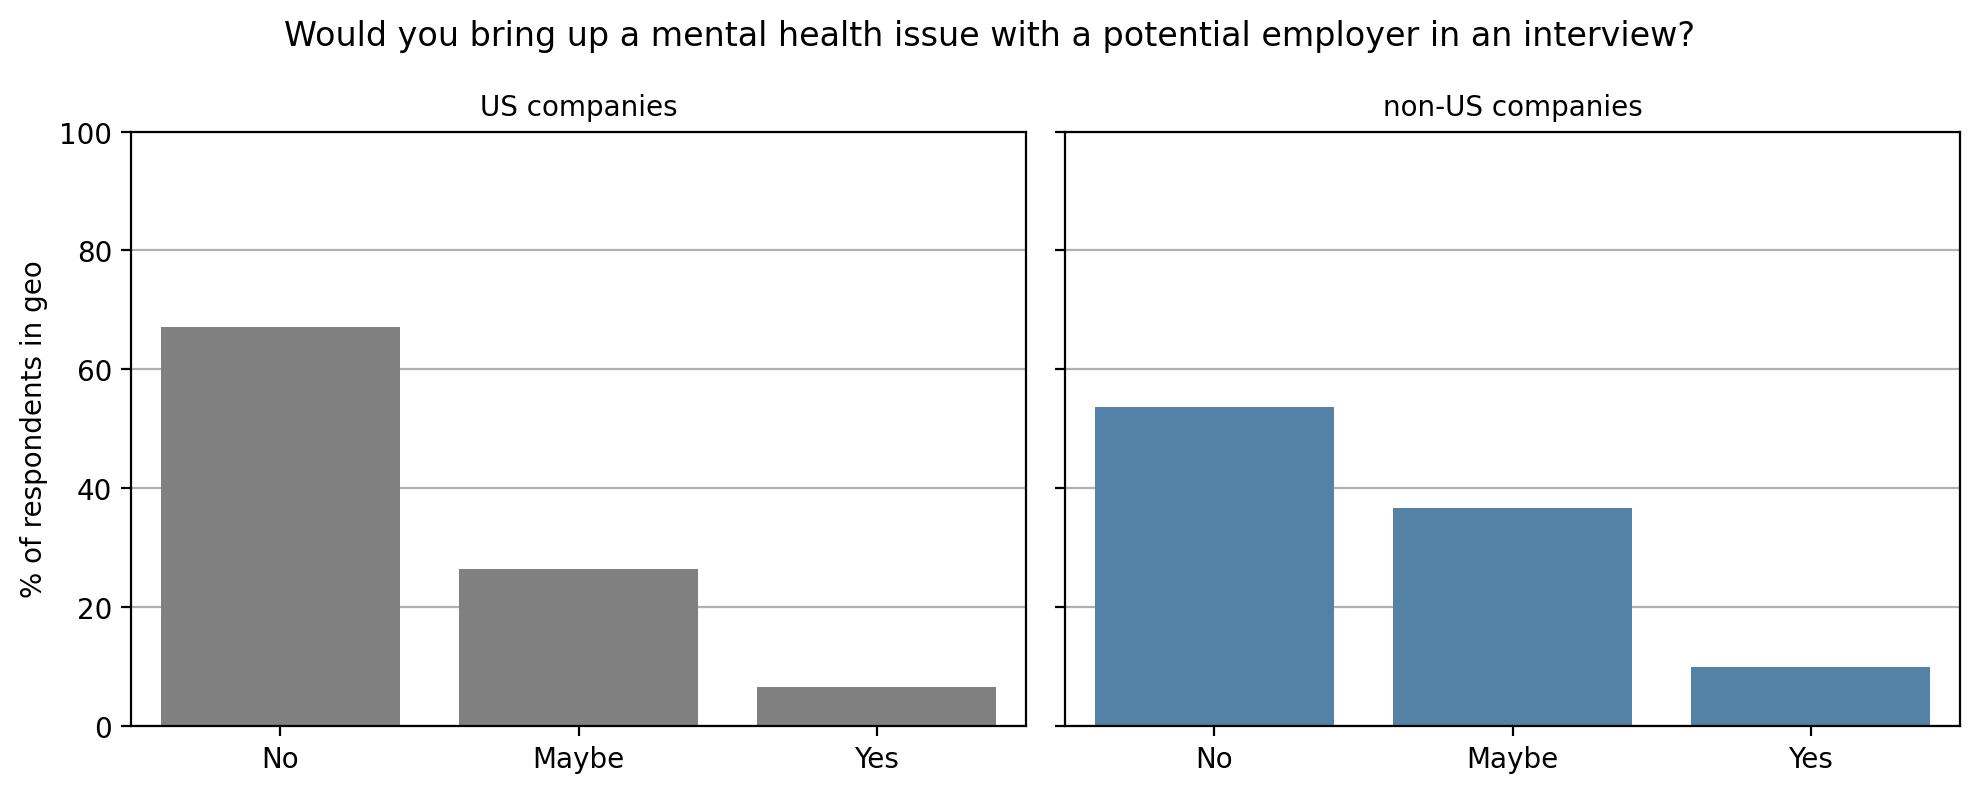

In [281]:
for question in (list(.significant_diff['<']['us_vs_nonus'])
                ):
    if not question == None:
        bow = ['better', 'worse'][question in significant_diff['<']['us_vs_nonus']]
        num_to_verbal = {n: v for v, n in zip(mhit[mhit_question_ids_rev[question]].dropna(), responses[question].dropna())}
        fig, axs = plt.subplots(1,2, figsize = (10, 4), sharey=True)
        plt.suptitle(f"{mhit_question_ids_rev[question]}\nUS companies tend to perform {bow} than non-US companies", fontsize = 11)
        conditions = [mhit['What country do you work in?']=='United States of America', 
                      mhit['What country do you work in?']!='United States of America']
        for i in range(2):
            sns.countplot(data = mhit[conditions[i]],
                         x = mhit_question_ids_rev[question], color = ['gray', 'steelblue'][i], stat = 'percent', ax = axs[i],
                          order = [num_to_verbal[n] for n in sorted(num_to_verbal.keys(), reverse = ('Yes' in num_to_verbal[0]))])
            axs[i].set_ylim(0,100)
            axs[i].set_title(['US companies', 'non-US companies'][i], fontsize = 10)
            axs[i].set_xlabel('')
            axs[i].set_ylabel('% of respondents in geo')
            axs[i].grid(axis = 'y', which = 'major', zorder = 1)
            axs[i].set_axisbelow(True)

        plt.tight_layout()
        plt.show()

##### Differences between responses from employees affected by mental health conditions vs unaffected employees

#### v1

All employees who either declared they do or "maybe" have a condition or have been diagnosed with a condition are considered "affected"

In [288]:
diagnosed_conditions = pd.read_csv('current_conditions_w_ids.csv', index_col = 'rid')
current_conditions = pd.read_csv('diagnosed_conditions_w_ids.csv', index_col = 'rid')

In [307]:
for sign in ['<', '>', '=']:
    significant_diff[sign]['aff_vs_noaff'] = []
    for qid in responses.columns:
        try:
            significant_diff[sign]['aff_vs_noaff'].append(check_hypothesis(qid, groups = 'affected and not', relation_b_groups=sign))
        except:
            pass

$H_{0}$: $\mu_{a}>= \mu_{na}$     
$H_{1}$: $\mu_{a}<  \mu_{na}$

In [ ]:
for question in set(significant_diff['<']['aff_vs_noaff']):
    if not question == None:
        print(mhit_question_ids_rev[question])

$H_{0}$: $\mu_{a}<= \mu_{na}$     
$H_{1}$: $\mu_{a}>  \mu_{na}$

In [ ]:
for question in set(significant_diff['>']['aff_vs_noaff']):
    if not question == None:
        print(mhit_question_ids_rev[question])

affected < non-affected for questions:
Would you bring up a mental health issue with a potential employer in an interview?
Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?

affected > non-affected for questions:
Do you have a family history of mental illness?
Have you ever sought treatment for a mental health issue from a mental health professional?
Do you currently have a mental health disorder?
Have you been diagnosed with a mental health condition by a medical professional?
Have you had a mental health disorder in the past?


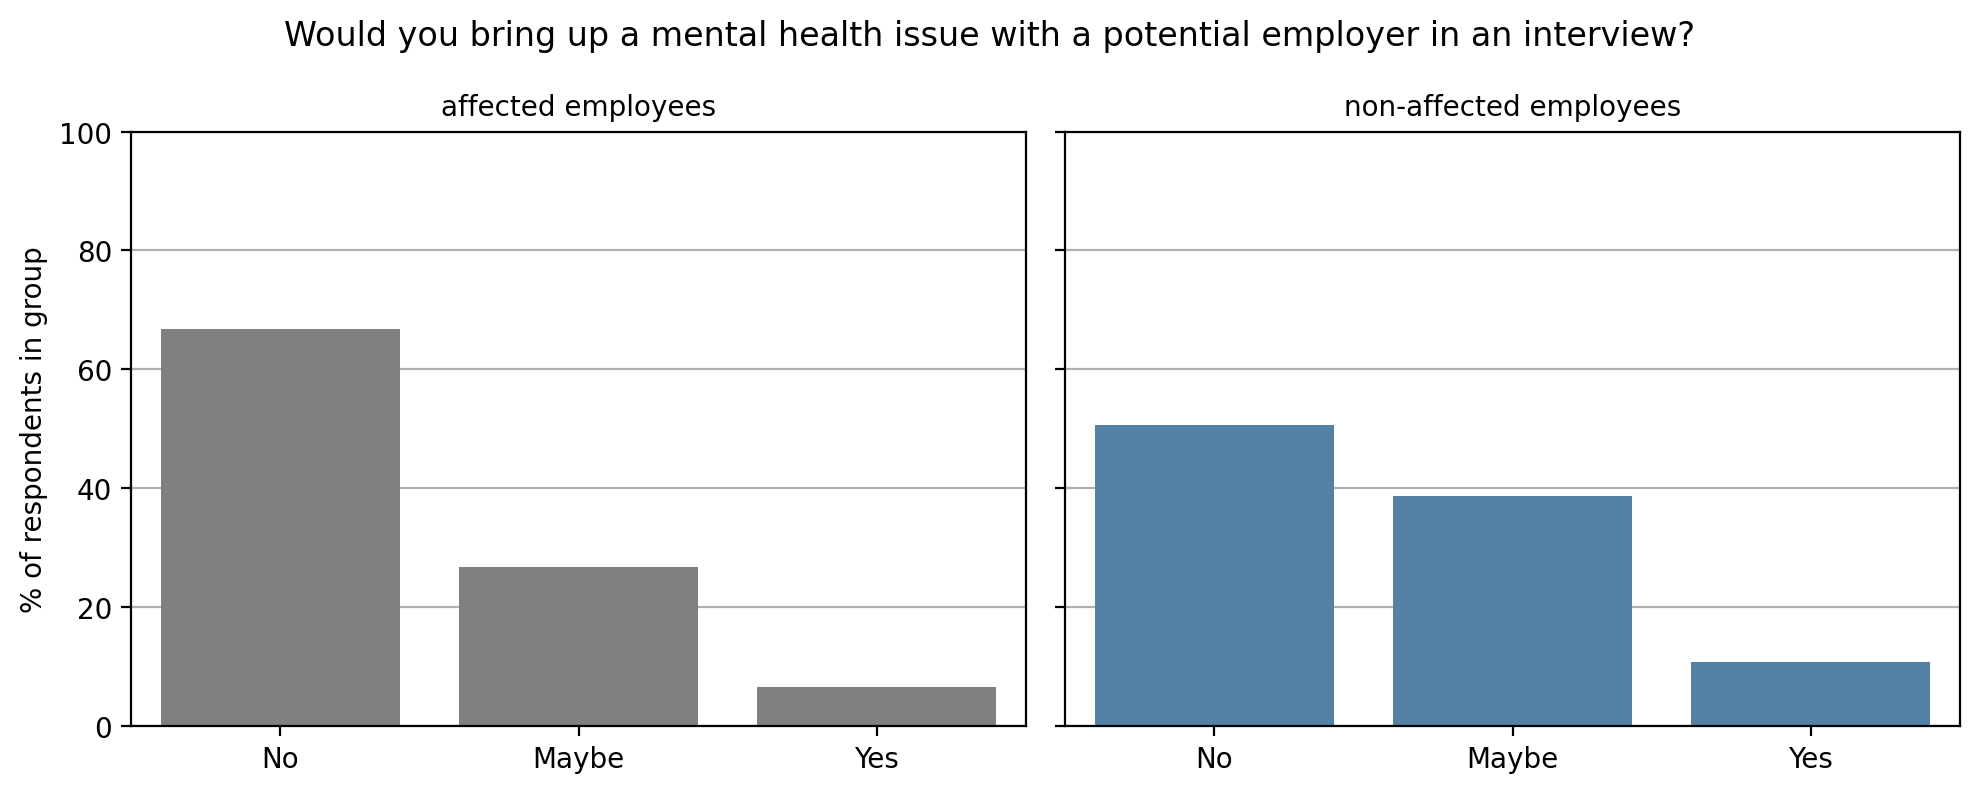

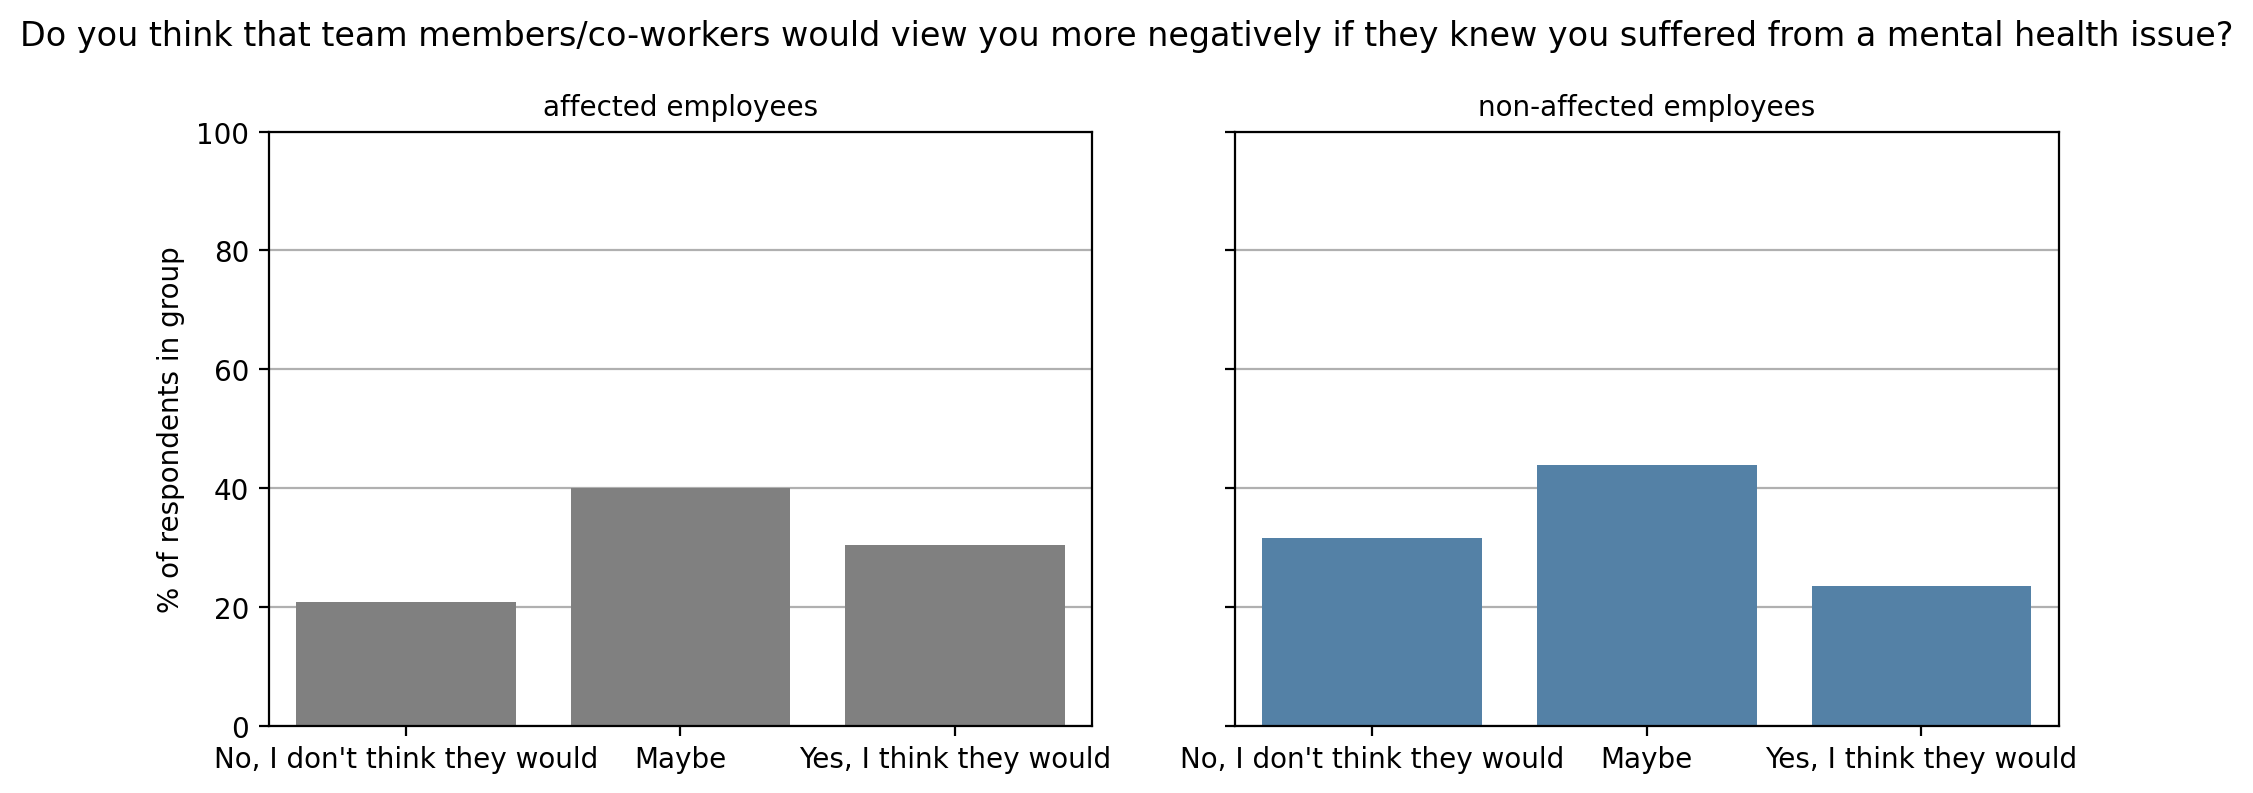

In [312]:
for question in (list(significant_diff['<']['aff_vs_noaff'])
                # +list(.significant_diff['>']['tech_vs_nontech'])
                ):
    if not question == None:
        bow = ['more', 'less'][question in significant_diff['<']['aff_vs_noaff']]
        num_to_verbal = {n: v for v, n in zip(mhit[mhit_question_ids_rev[question]].dropna(), responses[question].dropna())}
        fig, axs = plt.subplots(1,2, figsize = (10, 4), sharey=True)
        plt.suptitle(f"{mhit_question_ids_rev[question]}\naffected employees tend to respond {more} favorably than non-affected employees", fontsize = 11)
        conditions = [mhit.index.isin(aff_responses.index), 
                     ~mhit.index.isin(aff_responses.index)]
        for i in range(2):
            sns.countplot(data = mhit[conditions[i]],
                         x = mhit_question_ids_rev[question], color = ['gray', 'steelblue'][i], stat = 'percent', ax = axs[i],
                          order = [num_to_verbal[n] for n in sorted(num_to_verbal.keys(), reverse = ('Yes' in num_to_verbal[0]))])
            axs[i].set_ylim(0,100)
            axs[i].set_title(['affected employees', 'non-affected employees'][i], fontsize = 10)
            axs[i].set_xlabel('')
            axs[i].set_ylabel('% of respondents in group')
            axs[i].grid(axis = 'y', which = 'major', zorder = 1)
            axs[i].set_axisbelow(True)

        plt.tight_layout()
        plt.show()

#### v2

In [491]:
yaff_responses = responses[responses.index.isin(set(list(diagnosed_conditions[diagnosed_conditions.T.sum()==1].index)
                                                    +list(current_conditions[current_conditions.T.sum()==1].index)))]
maff_responses = responses[responses.index.isin(set(list(diagnosed_conditions[diagnosed_conditions.T.sum()==0.5].index)
                                                    +list(current_conditions[current_conditions.T.sum()==0.5].index)))]
naff_responses = responses[responses.index.isin(set(list(diagnosed_conditions[diagnosed_conditions.T.sum()==0].index)
                                                    +list(current_conditions[current_conditions.T.sum()==0].index)))]
print(yaff_responses.shape[0], 'responses from employees affected by mental conditions and', maff_responses.shape[0], 'from maybe affected employees', naff_responses.shape[0], 'from not affected employees')

238 responses from employees affected by mental conditions and 60 from maybe affected employees 805 from not affected employees


Employees who either declared they do have a condition or have been diagnosed with a condition are considered "affected".<br> All employees who declared they "maybe" have a condition are considered "maybe affected".<br> Employees who declared they do not have and have not been diagnosed are considered "not affected".

In [498]:
def check_aff_maff_naff(question, sig_level = 0.05):
    F, p_value = stats.f_oneway(aff_responses[question], maff_responses[question], naff_responses[question])
    if p_value < sig_level:
        return question

$H_{0}$: $\mu_{y}= \mu_{m}= \mu_{n} $ **or** The mean of the samples is the same.      
$H_{1}$: At least one of them is different.    

In [510]:
significant_diff['=']['aff_vs_maff_vs_noaff'] = []
for qid in responses.columns:
    try:
        significant_diff['=']['aff_vs_maff_vs_noaff'].append(check_aff_maff_naff(qid))
    except:
        pass

In [513]:
for question in set(significant_diff['=']['aff_vs_maff_vs_noaff']):
    if not question == None:
        print(mhit_question_ids_rev[question])

Do you have a family history of mental illness?
Would you bring up a mental health issue with a potential employer in an interview?
Have you ever sought treatment for a mental health issue from a mental health professional?
Do you currently have a mental health disorder?
Have you been diagnosed with a mental health condition by a medical professional?
Have you had a mental health disorder in the past?


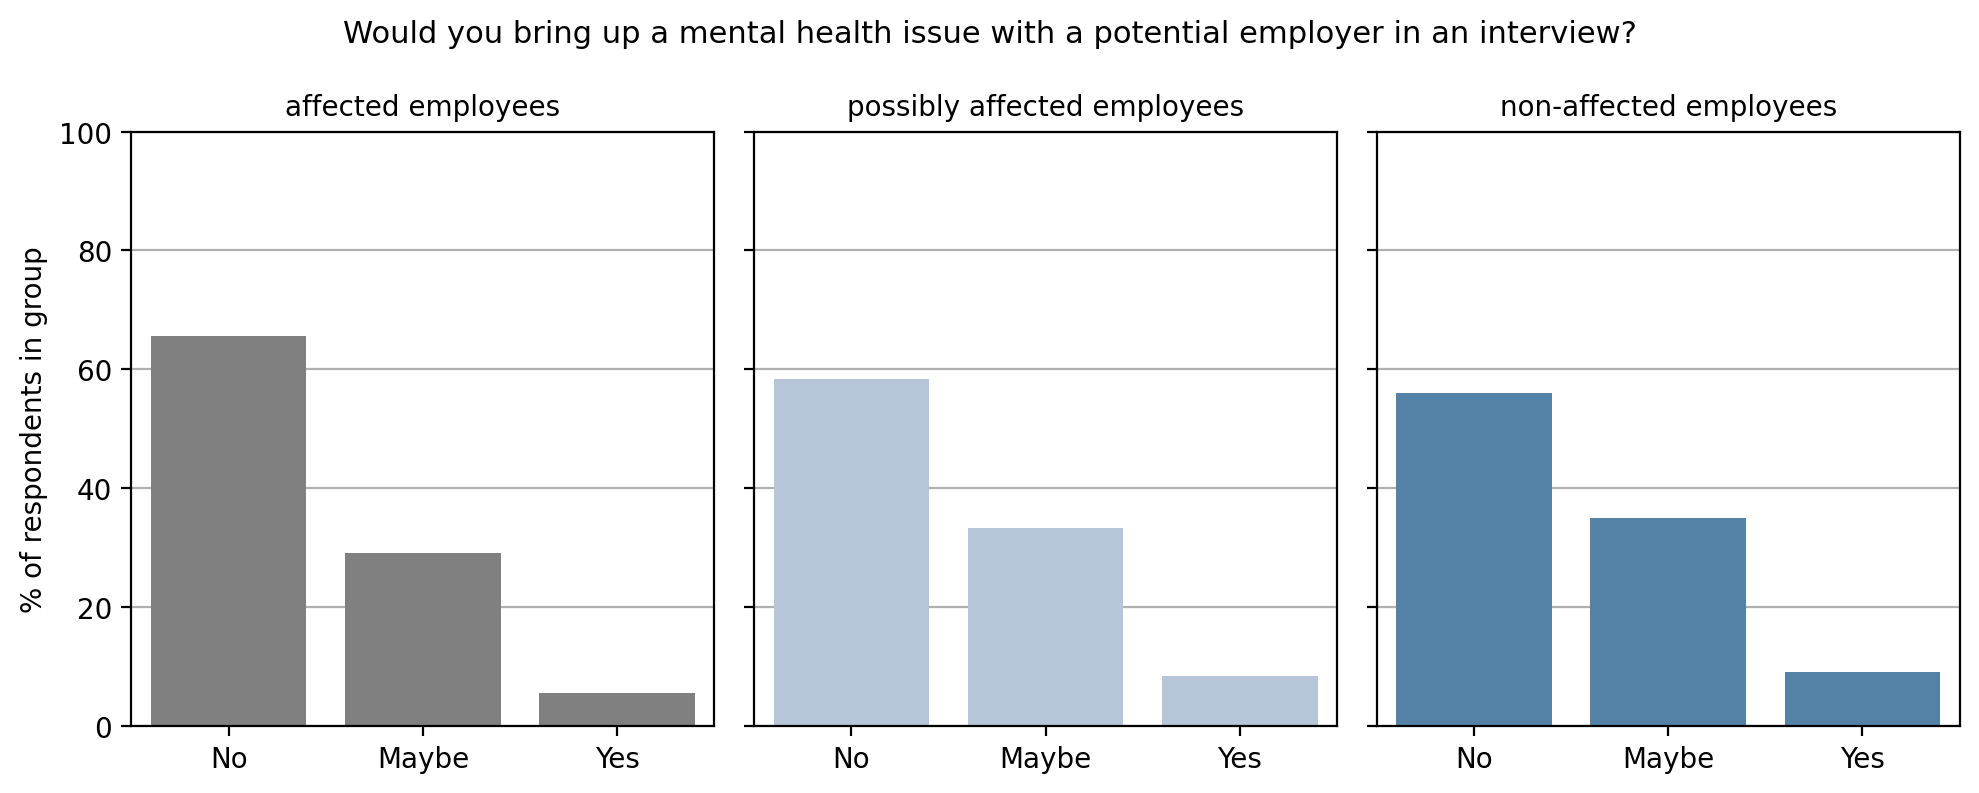

In [516]:
for question in (list(significant_diff['=']['aff_vs_maff_vs_noaff'])
                # +list(.significant_diff['>']['tech_vs_nontech'])
                ):
    if question!=None and mhit_question_ids_rev[question] == 'Would you bring up a mental health issue with a potential employer in an interview?':
        num_to_verbal = {n: v for v, n in zip(mhit[mhit_question_ids_rev[question]].dropna(), responses[question].dropna())}
        fig, axs = plt.subplots(1,3, figsize = (10, 4), sharey=True)
        plt.suptitle(f"{mhit_question_ids_rev[question]}", fontsize = 11)
        conditions = [mhit.index.isin(yaff_responses.index),
                      mhit.index.isin(maff_responses.index),
                      mhit.index.isin(naff_responses.index)]
        for i in range(3):
            sns.countplot(data = mhit[conditions[i]],
                         x = mhit_question_ids_rev[question], color = ['gray', 'lightsteelblue', 'steelblue'][i], stat = 'percent', ax = axs[i],
                          order = [num_to_verbal[n] for n in sorted(num_to_verbal.keys(), reverse = ('Yes' in num_to_verbal[0]))])
            axs[i].set_ylim(0,100)
            axs[i].set_title(['affected employees', 'possibly affected employees', 'non-affected employees'][i], fontsize = 10)
            axs[i].set_xlabel('')
            axs[i].set_ylabel('% of respondents in group')
            axs[i].grid(axis = 'y', which = 'major', zorder = 1)
            axs[i].set_axisbelow(True)

        plt.tight_layout()
        plt.show()

In [536]:
question = 'Would you bring up a mental health issue with a potential employer in an interview?'

(2206, 2)

In [543]:
ymnr = pd.concat([yaff_responses, maff_responses, naff_responses])[mhit_question_ids[question]]
ymni = pd.DataFrame(columns = ['affected?'], data = np.array(['yes'] * yaff_responses.shape[0]
                                                + ['maybe'] * maff_responses.shape[0] + ['no'] * naff_responses.shape[0]).T,
                   index = ymnr.index)

In [545]:
posthoc_df = sp.posthoc_ttest(pd.concat([ymnr, ymni], axis = 1),
                              group_col = 'affected?', val_col = mhit_question_ids[question], equal_var=True, p_adjust="bonferroni")

group_names= ["affected", "maybe affected","unaffected"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:lightsteelblue" if x<0.05 else "background-color: white")

/var/folders/s5/1c98d9r93rg6lzxgmf01jj0m0000gn/T/ipykernel_914/1212537334.py:7: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  posthoc_df.style.applymap(lambda x: "background-color:steelblue" if x<0.05 else "background-color: white")


**At the significance level of 0.05, it can be concluded that**
- "unaffected employees" responded differently than  "unaffected" employees

In [1101]:
for q in [f'Q{i}' for i in range(37, 41)]:
    print(mhit_question_ids_rev[q])

Would you be willing to bring up a physical health issue with a potential employer in an interview?
Why or why not?
Would you bring up a mental health issue with a potential employer in an interview?
Why or why not?.1


### Tokenization

In [1140]:
stop_words = set(stopwords.words("english"))
print(", ".join(np.random.choice(list(stop_words), size = 3, replace = False)))

don't, where, himself


In [ ]:
punks = set(stopwords.words(""))

In [1120]:
sample_sentence = "I wouldn't want to bring up anything that may trigger unconscious bias and therefore hinder my chances of receiving a job"

In [1125]:
tokenized = tokenize.wordpunct_tokenize(sample_sentence)
tokenized

['I',
 'wouldn',
 "'",
 't',
 'want',
 'to',
 'bring',
 'up',
 'anything',
 'that',
 'may',
 'trigger',
 'unconscious',
 'bias',
 'and',
 'therefore',
 'hinder',
 'my',
 'chances',
 'of',
 'receiving',
 'a',
 'job']

In [1133]:
stemmer = SnowballStemmer('english')

In [1134]:
[stemmer.stem(w) for w in tokenized]

['i',
 'wouldn',
 "'",
 't',
 'want',
 'to',
 'bring',
 'up',
 'anyth',
 'that',
 'may',
 'trigger',
 'unconsci',
 'bias',
 'and',
 'therefor',
 'hinder',
 'my',
 'chanc',
 'of',
 'receiv',
 'a',
 'job']

In [1284]:
cv = CountVectorizer(stop_words='english')
cv.fit(responses['Q38'].fillna('').to_list())

X = cv.transform(responses['Q38'].fillna(''))

q38 = pd.DataFrame(data = X.toarray(), index = responses.index,
                  columns = cv.get_feature_names_out())

In [1285]:
cv = CountVectorizer(stop_words='english')
cv.fit(responses['Q40'].fillna('').to_list())

X = cv.transform(responses['Q40'].fillna(''))

q40 = pd.DataFrame(data = X.toarray(), index = responses.index,
                  columns = cv.get_feature_names_out())

In [1291]:
count_comp = q38.sum().reset_index().merge(q40.sum().reset_index(), 
                                          left_on = 'index', right_on = 'index').set_index('index').rename({'0_x': 'Q38', 
                                                                                                            '0_y': 'Q40'}, axis = 1)

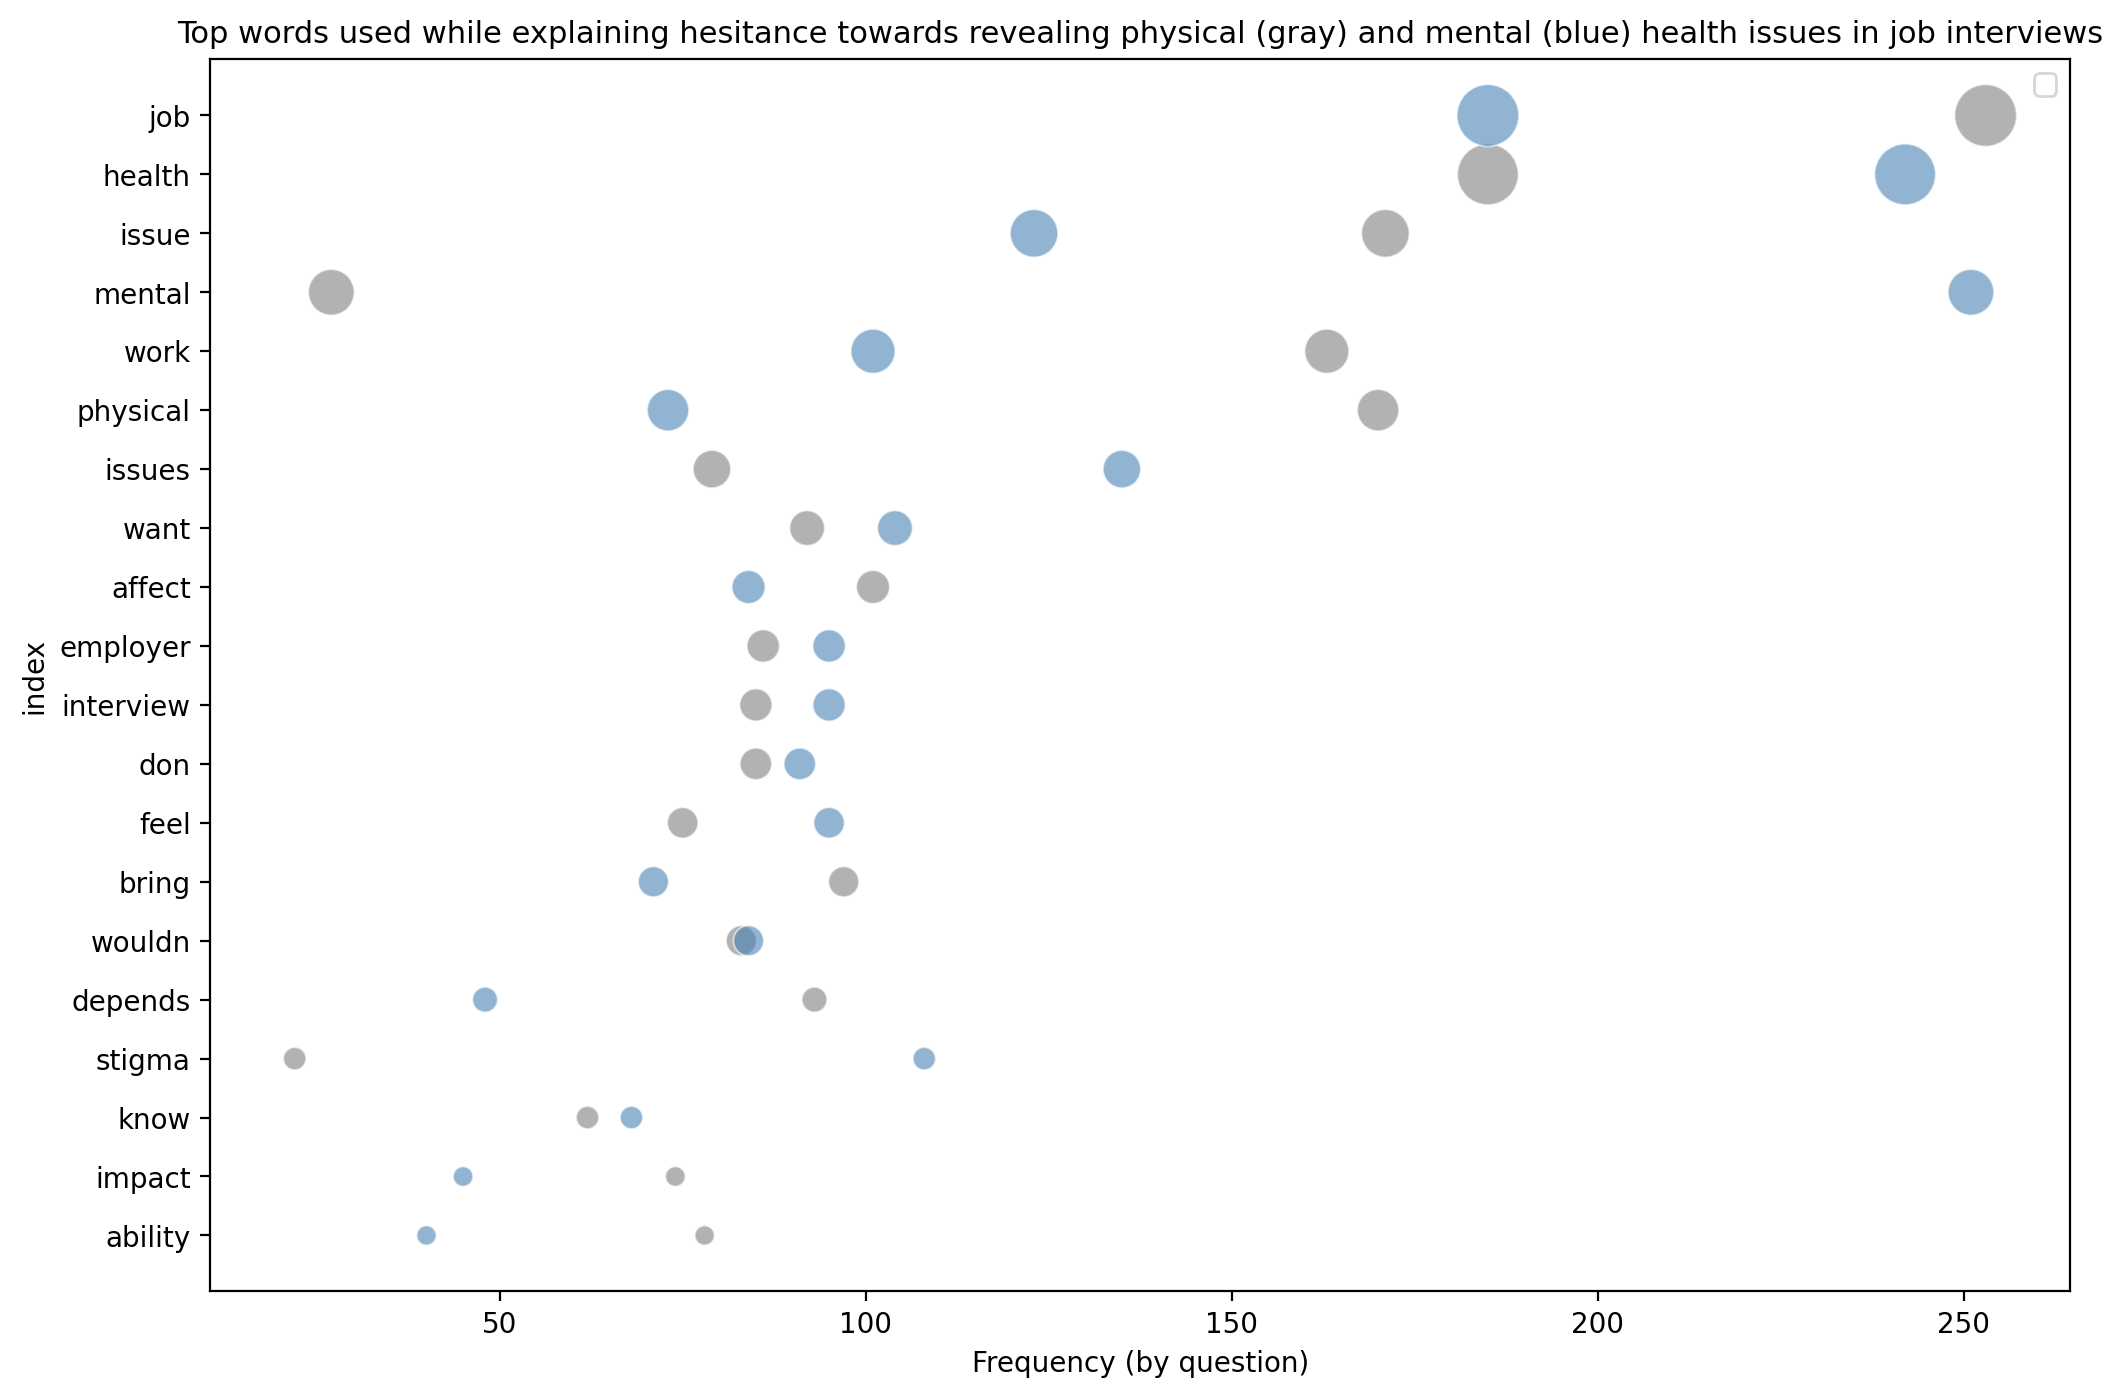

In [1317]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=count_comp.reset_index().sort_values('total', ascending = False).head(20), x='Q38', y='index', 
                size='total', sizes=(50, 500), color='gray', alpha=0.6, )
sns.scatterplot(data=count_comp.reset_index().sort_values('total', ascending = False).head(20), x='Q40', y='index', 
                size='total', sizes=(50, 500), color='steelblue', alpha=0.6)
plt.xlabel("Frequency (by question)")
plt.title("Top words used while explaining hesitance towards revealing physical (gray) and mental (blue) health issues in job interviews",
         fontsize = 11)
plt.legend('')
plt.show()

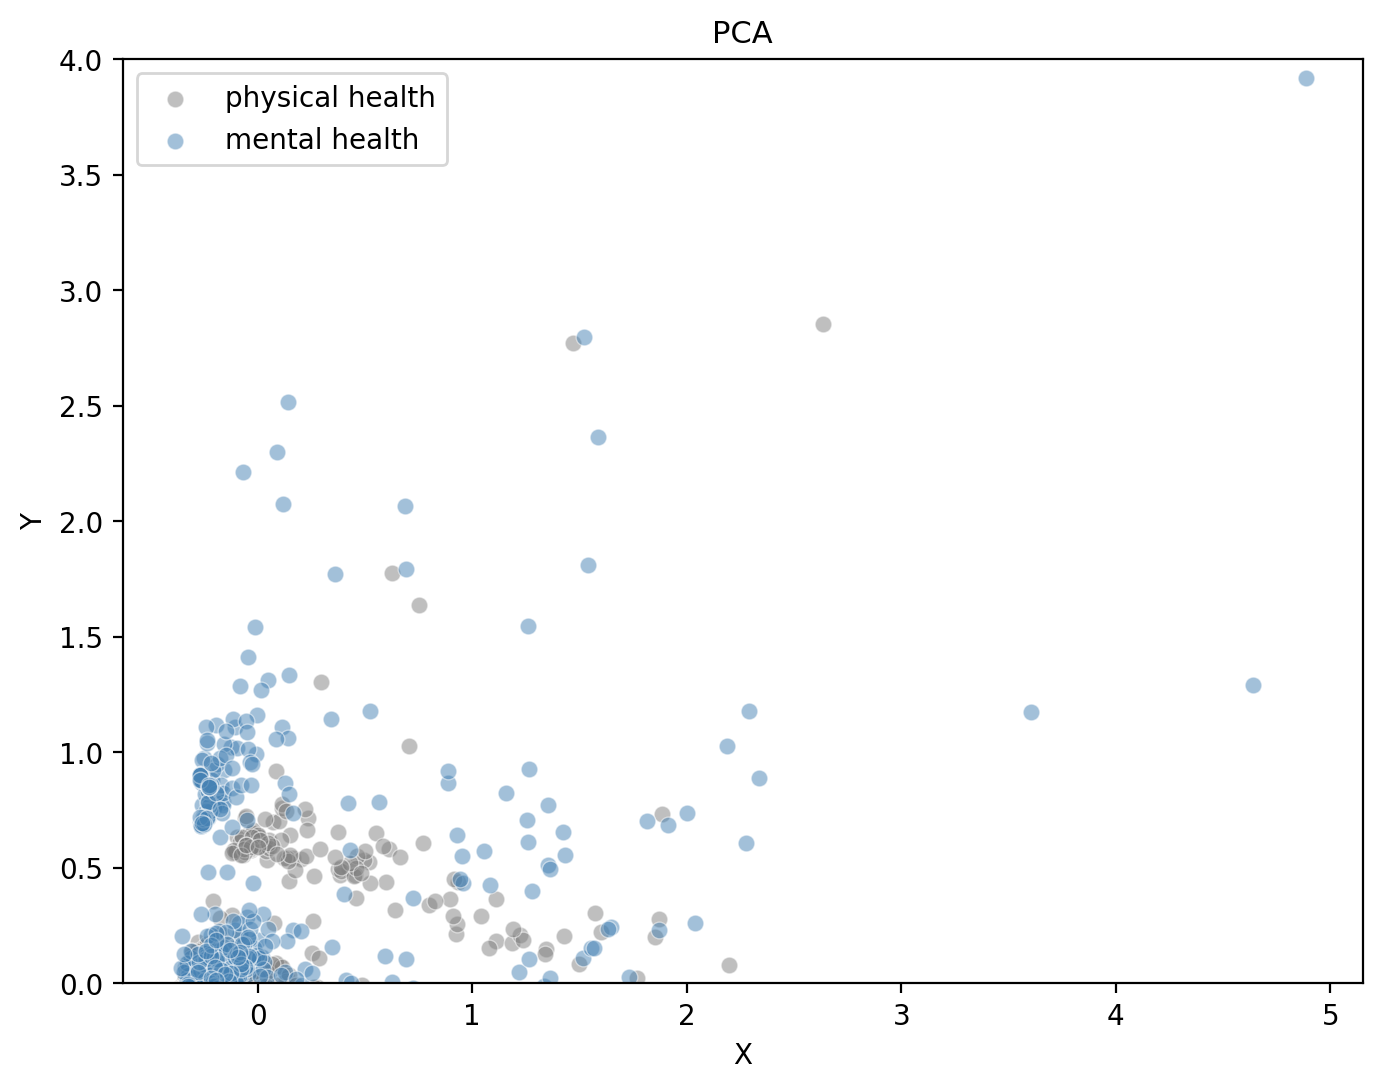

In [1336]:
pca = PCA(n_components=2)

pca_df = pd.DataFrame(pca.fit_transform(q38), columns=['PC1Q38', 'PC2Q38'], index=q38.index)
pca_df = pca_df.merge(pd.DataFrame(pca.fit_transform(q40), 
                                   columns=['PC1Q40', 'PC2Q40'], index=q40.index), left_index = True, right_index = True)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df['PC1Q38'], y=pca_df['PC2Q38'], alpha=0.5, color = 'gray', label = 'physical health')
sns.scatterplot(x=pca_df['PC1Q40'], y=pca_df['PC2Q40'], alpha=0.5, color = 'steelblue', label = 'mental health')
plt.ylim(0,4)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("PCA", fontsize = 11)
plt.legend()
plt.show()

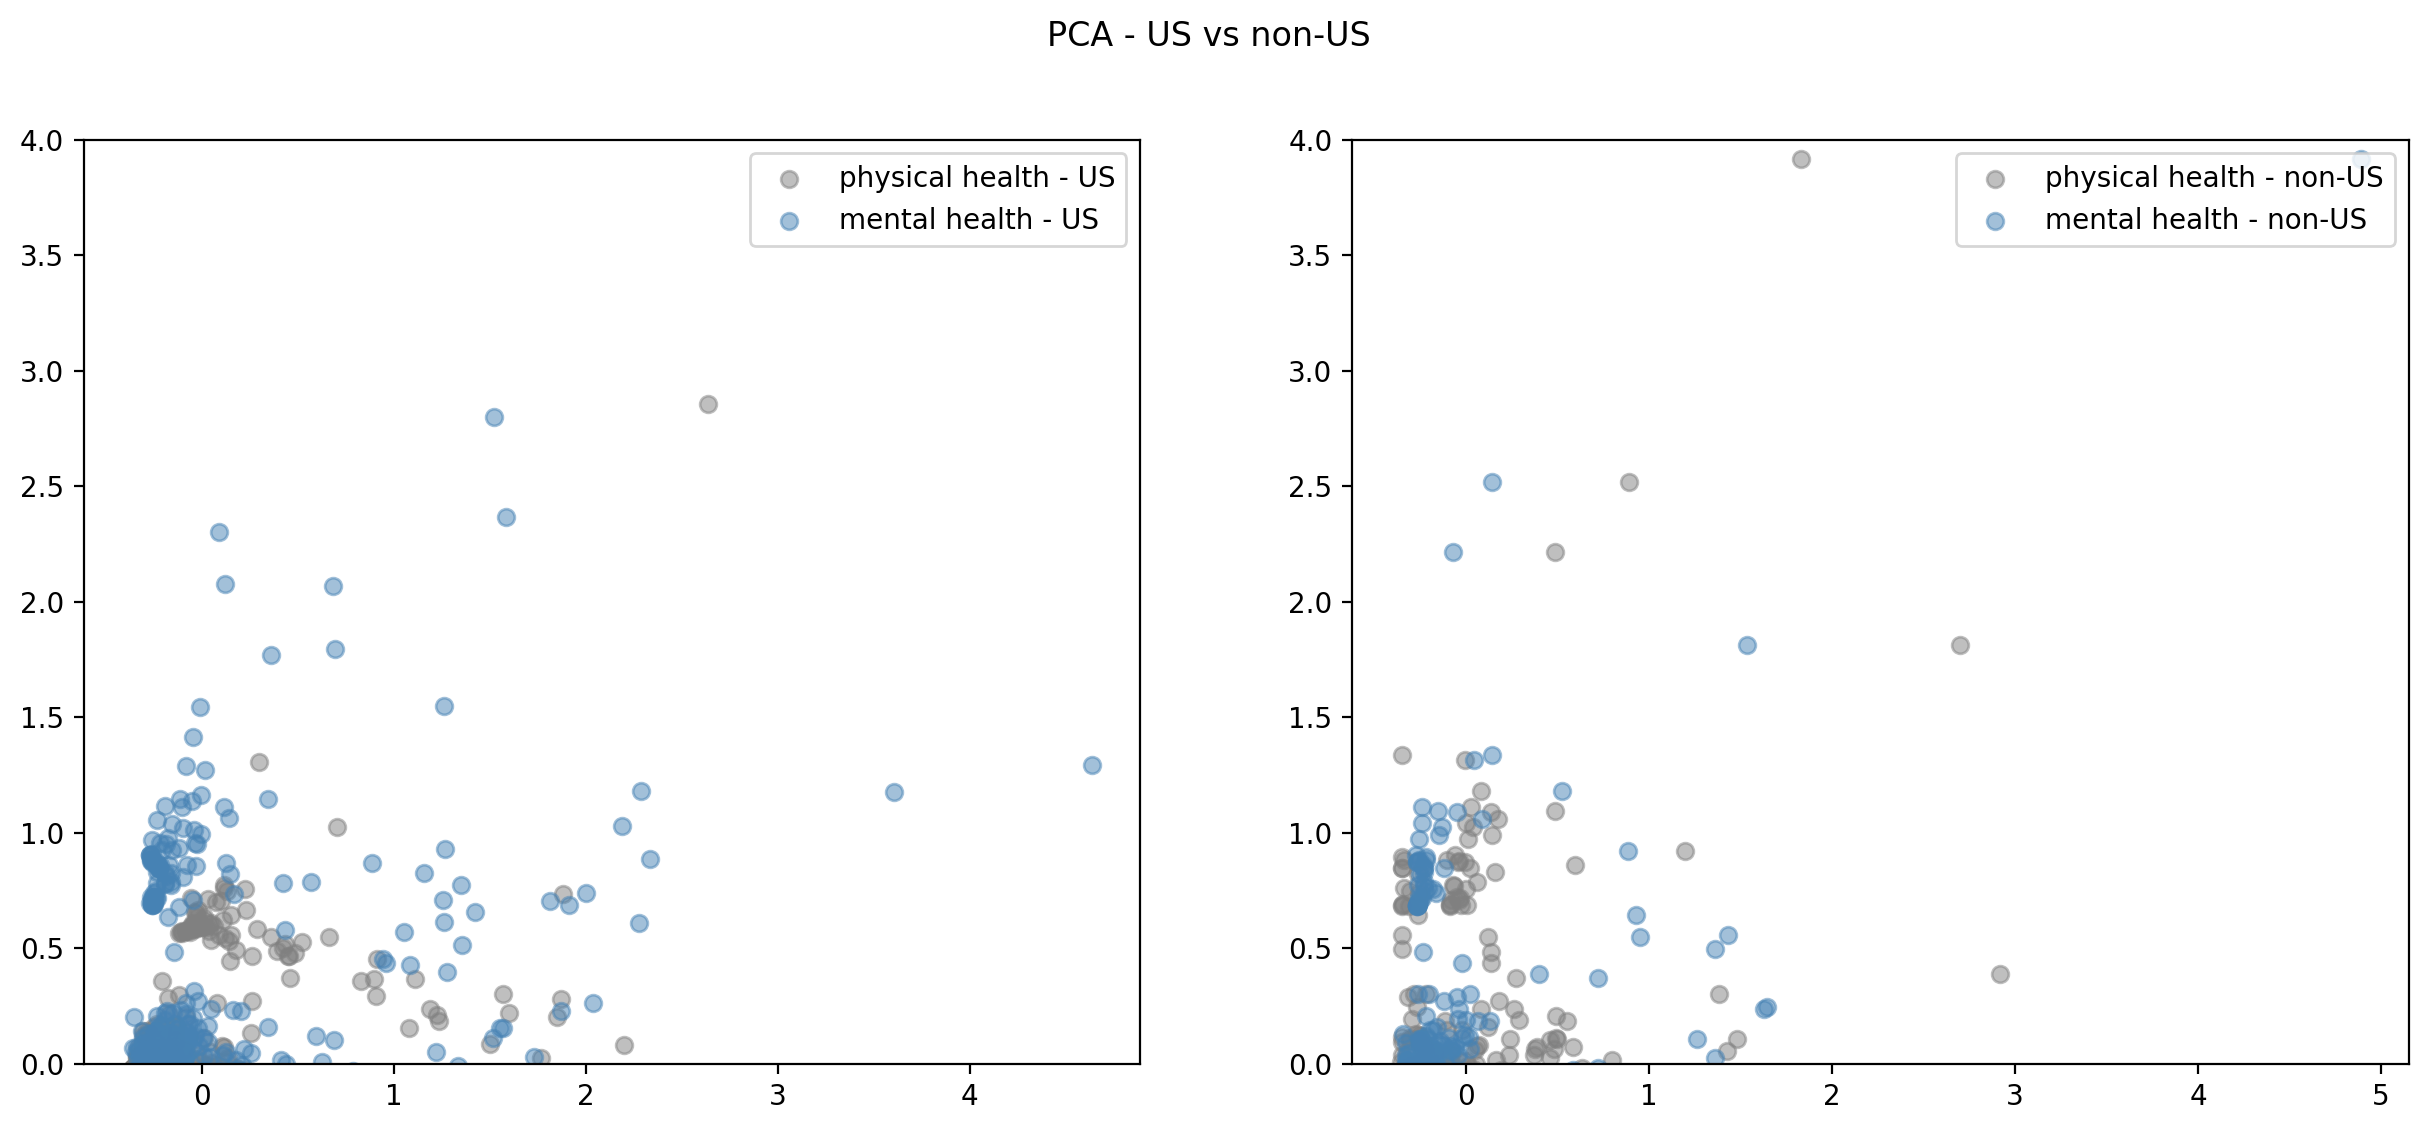

In [1337]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
pca_df1 = pca_df.loc[us_responses.index]
pca_df2 = pca_df.loc[nonus_responses.index]

axs[0].scatter(x=pca_df1['PC1Q38'], y=pca_df1['PC2Q38'], alpha=0.5, color = 'gray', label = 'physical health - US')
axs[0].scatter(x=pca_df1['PC1Q40'], y=pca_df1['PC2Q40'], alpha=0.5, color = 'steelblue', label = 'mental health - US')
axs[0].set_ylim(0,4)
axs[1].scatter(x=pca_df2['PC1Q38'], y=pca_df2['PC2Q40'], alpha=0.5, color = 'gray', label = 'physical health - non-US')
axs[1].scatter(x=pca_df2['PC1Q40'], y=pca_df2['PC2Q40'], alpha=0.5, color = 'steelblue', label = 'mental health - non-US')
axs[1].set_ylim(0,4)
plt.suptitle("PCA - US vs non-US")
axs[0].legend()
axs[1].legend()
plt.show()

In [1338]:
!pip install networkx

In [1346]:
cooccurrence_matrix = (q38[q38.sum().sort_values(ascending = False).head(50).index].T @ 
                       q38[q38.sum().sort_values(ascending = False).head(50).index])

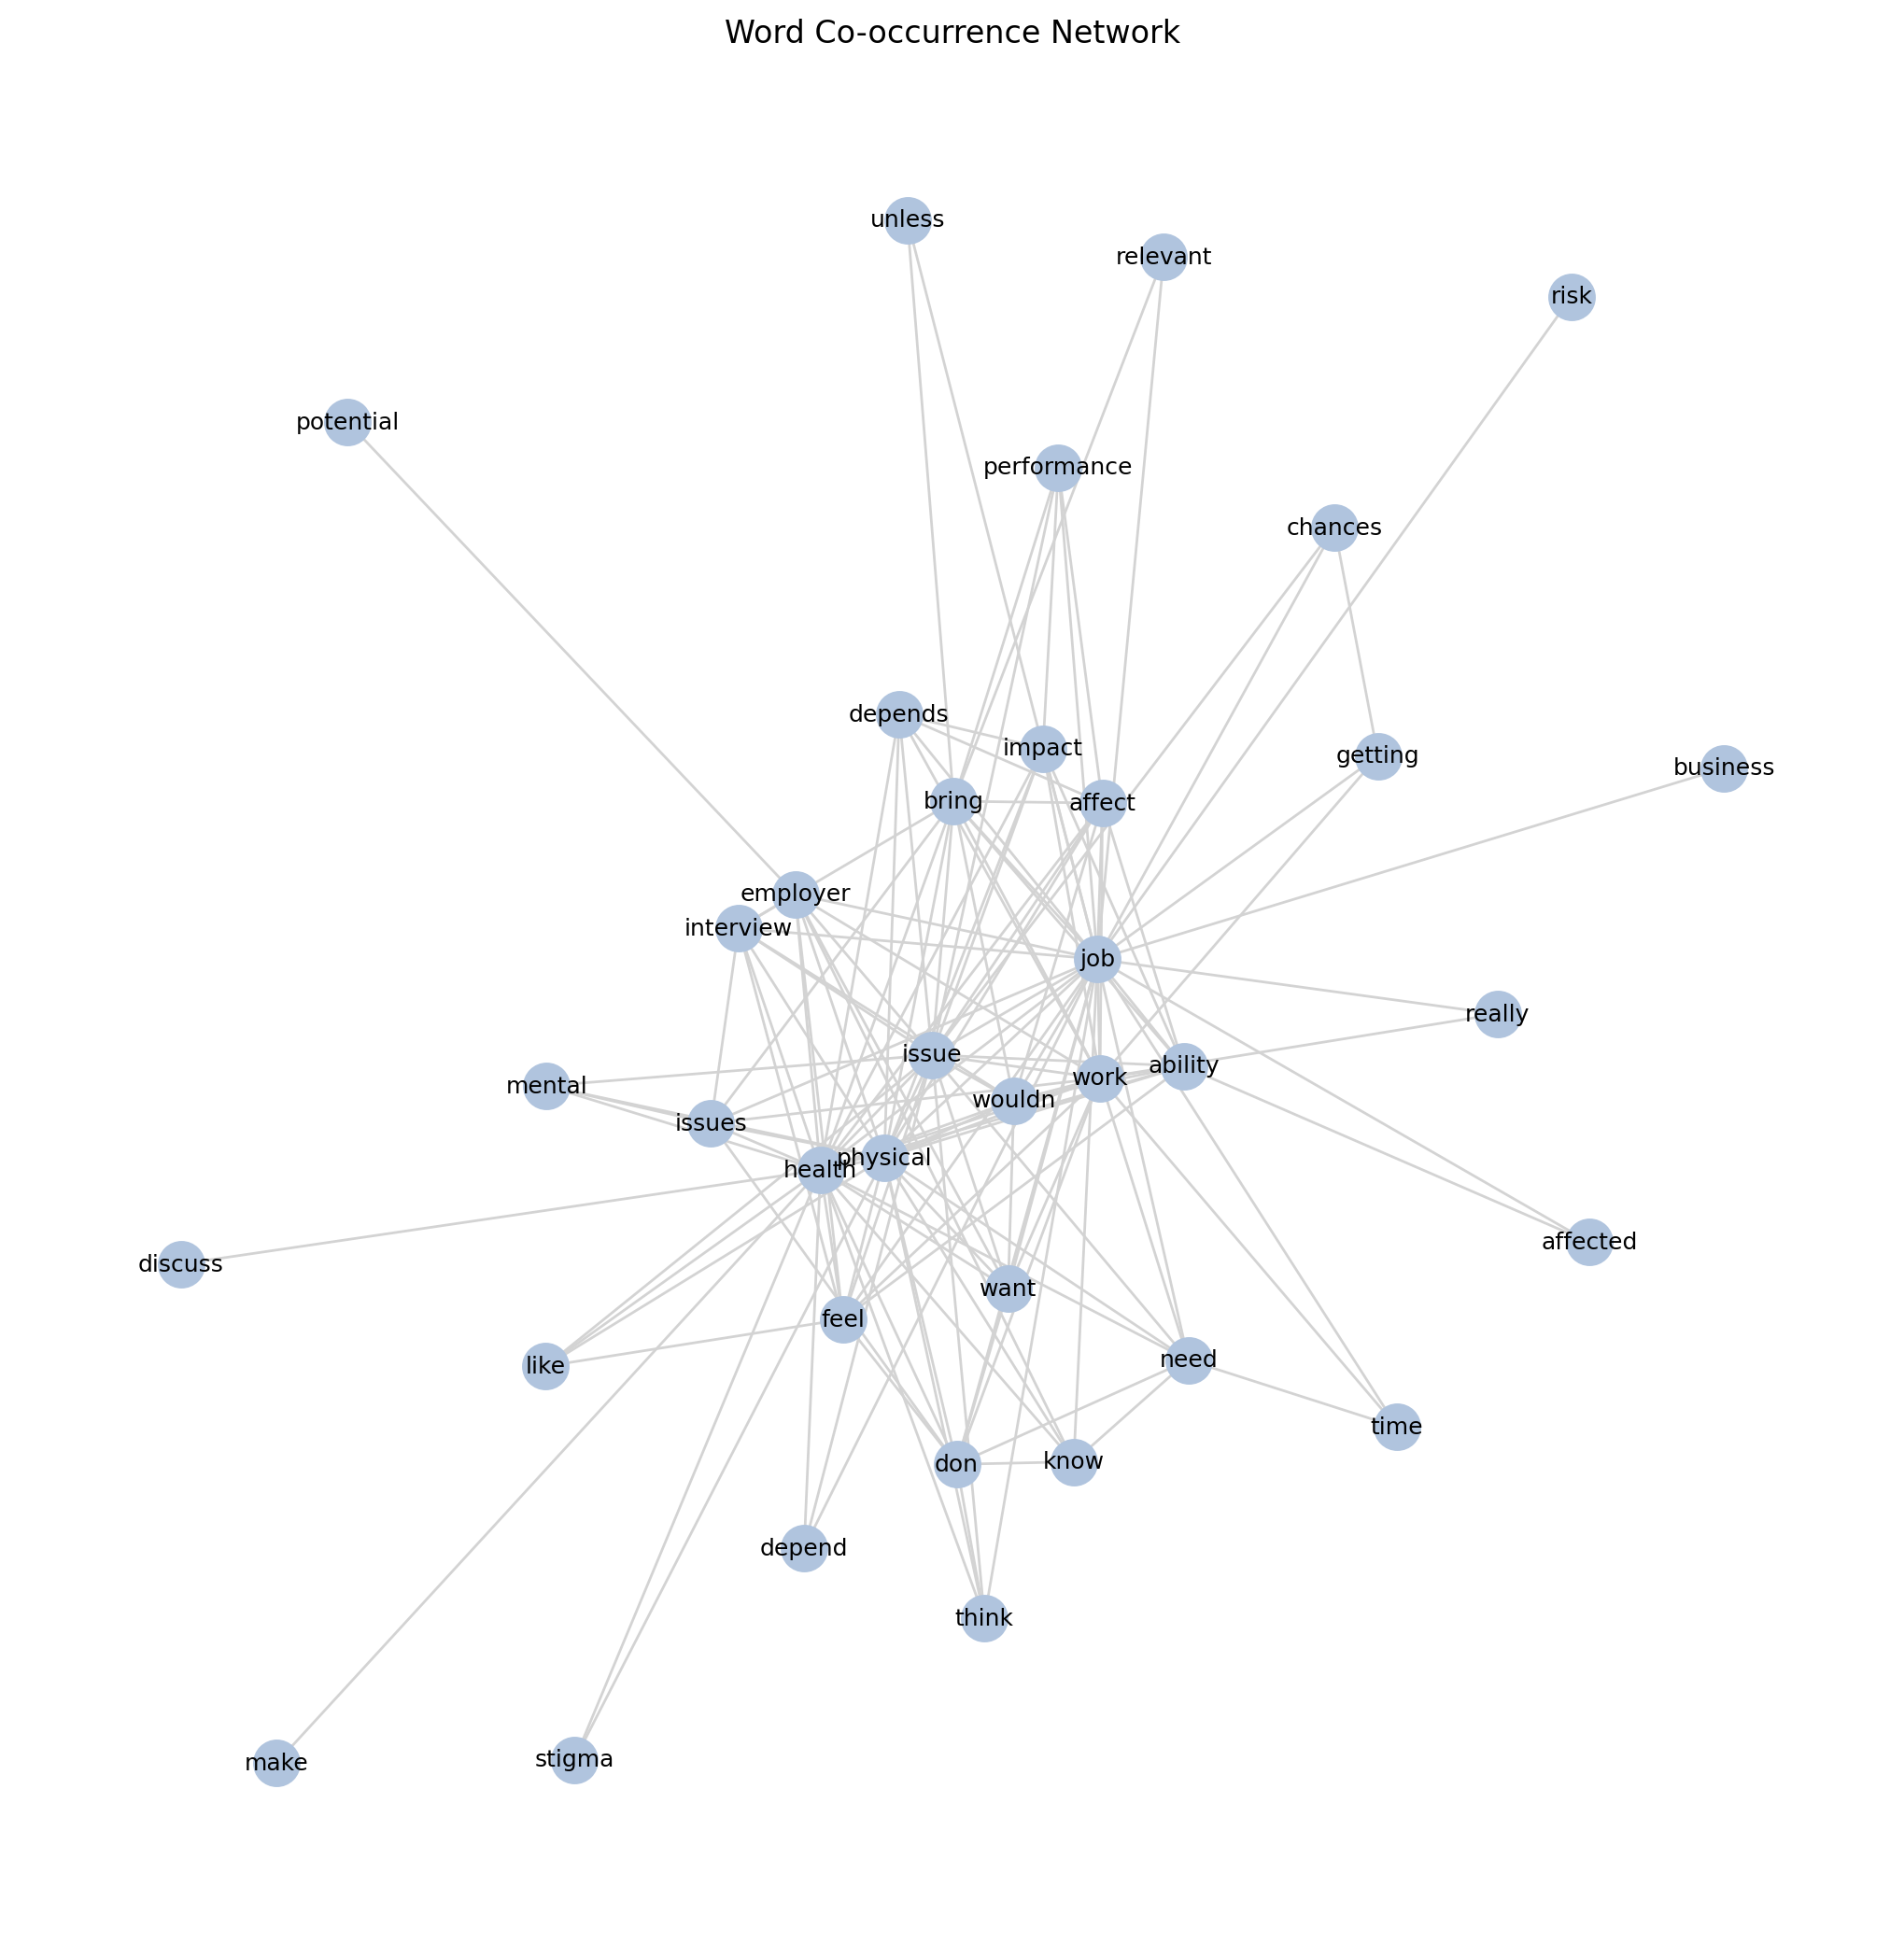

In [1352]:
G = nx.Graph()
for word1, word2 in cooccurrence_matrix.stack().index:
    if word1 != word2 and cooccurrence_matrix.loc[word1, word2] > 10:  # Adjust threshold
        G.add_edge(word1, word2, weight=cooccurrence_matrix.loc[word1, word2])

# Plot the network
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=300, node_color = 'lightsteelblue', edge_color='lightgray', font_size=9)
plt.title("Word Co-occurrence Network")
plt.show()

### Sentiment analysis

In [1353]:
sia = SentimentIntensityAnalyzer()

In [1360]:
sia_scores = responses[[f'Q{q}' for q in range(37, 41)]]
for q in ['Q38', 'Q40']:
    sia_scores[f"sia{q}"] = sia_scores[q].apply(lambda x: sia.polarity_scores(str(x))['compound'])

/var/folders/s5/1c98d9r93rg6lzxgmf01jj0m0000gn/T/ipykernel_914/3818249868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sia_scores[f"sia{q}"] = sia_scores[q].apply(lambda x: sia.polarity_scores(str(x))['compound'])
/var/folders/s5/1c98d9r93rg6lzxgmf01jj0m0000gn/T/ipykernel_914/3818249868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sia_scores[f"sia{q}"] = sia_scores[q].apply(lambda x: sia.polarity_scores(str(x))['compound'])


In [1105]:
pd.set_option('display.max_colwidth', None)

In [1362]:
sia_scores.sample(3)

Q37  \
rid                                         
e78a7f1c-470d-4644-86bd-f2da8e88d43c  0.0   
ef582f69-f89d-47dc-b8ca-724d0e70cfc5  1.0   
2460ae04-d91c-47bf-9321-783f60bd871e  1.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Q38  \
rid                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
e78a7f1c-470d-4644-86bd-f2da8e88d43c                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Fear of discrimination as a racial minority with a physical health issue   
ef582f69-f89d-47dc-b8ca-724d0e70cfc5  This is all a point of basic surviving. If I had problems to bring food to my table or pay for rent in case I don't get the job I would keep my mouth shut and work as hard as I can. If not, like the case is now, I would take the liberty of trying to get the most comfortable work position. It is easy to ask for your rights and better work environment when basic life needs are met and are safe regardless of your work. In case they are not, then you don't have the liberty of emotions, problems, sickness and what not, you have to survive and you do what you have to do it.    
2460ae04-d91c-47bf-9321-783f60bd871e                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              NaN   

                                      Q39  \
rid                                         
e78a7f1c-470d-4644-86bd-f2da8e88d43c  0.0   
ef582f69-f89d-47dc-b8ca-724d0e70cfc5  1.0   
2460ae04-d91c-47bf-9321-783f60bd871e  0.5   

                                                                                                         Q40  \
rid                                                                                                            
e78a7f1c-470d-4644-86bd-f2da8e88d43c  Fear of discrimination as a racial minority with a mental health issue   
ef582f69-f89d-47dc-b8ca-724d0e70cfc5                                      Same as the above for the physical   
2460ae04-d91c-47bf-9321-783f60bd871e                

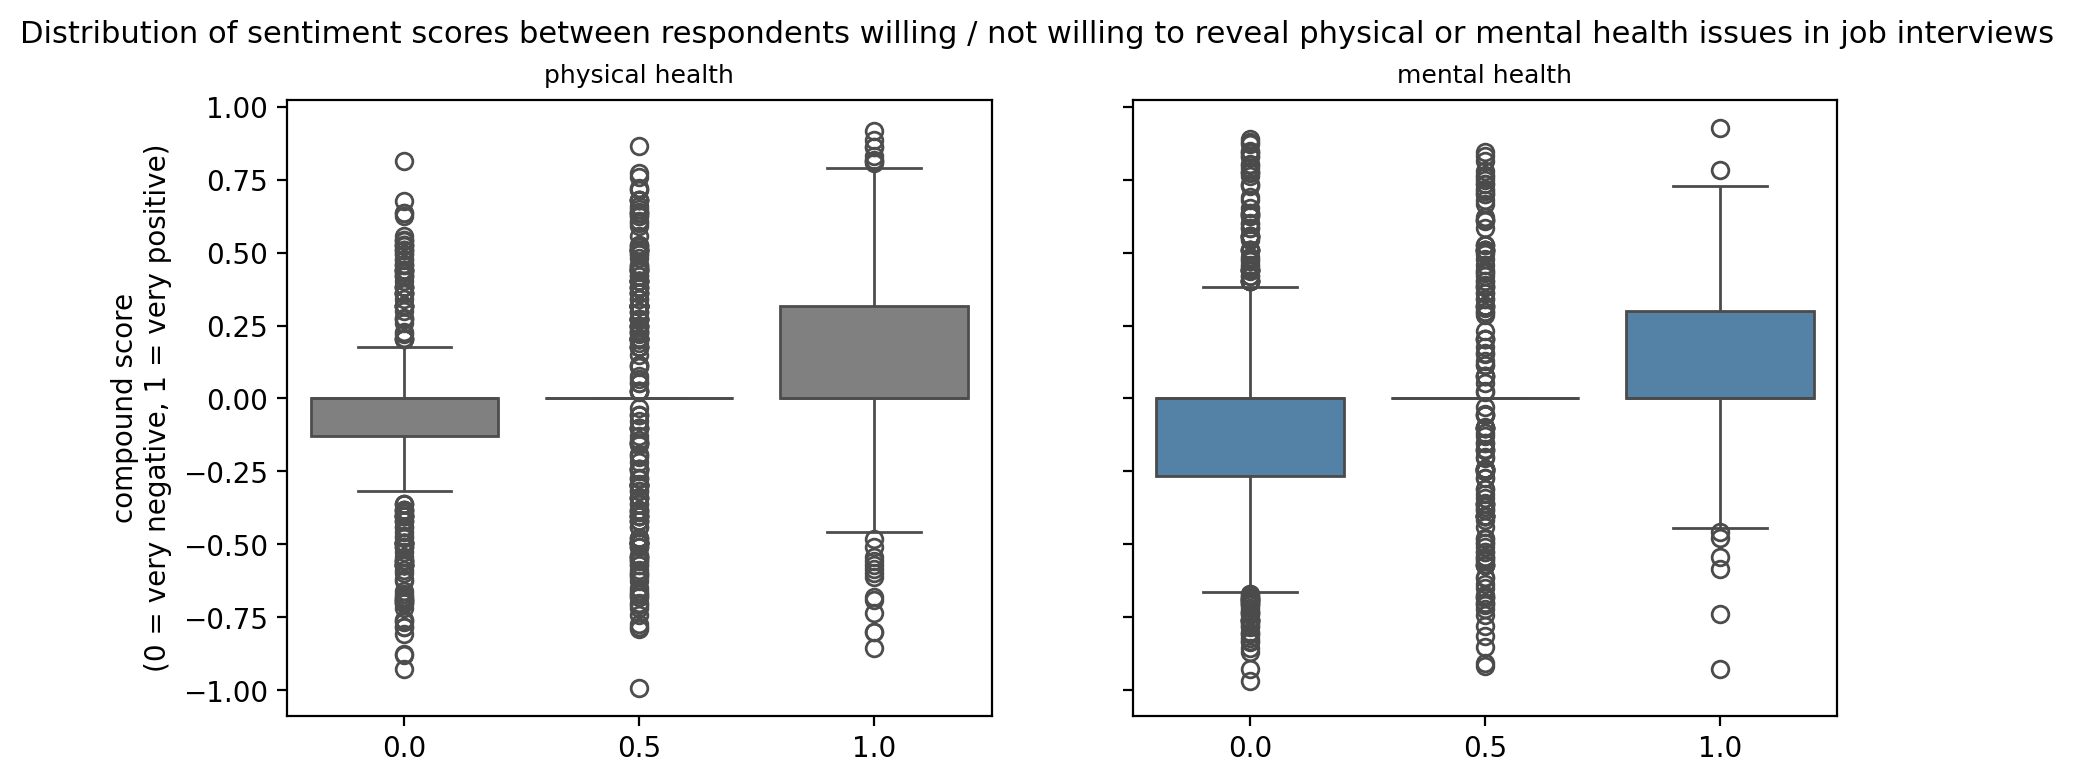

In [1373]:
fig, axs = plt.subplots(1,2, figsize = (10,4), sharey=True)
plt.suptitle('Distribution of sentiment scores between respondents willing / not willing to reveal physical or mental health issues in job interviews', fontsize = 11)
axs[0].set_title('physical health', fontsize = 9)
sns.boxplot(sia_scores, x = 'Q37', y = 'siaQ38', color = 'gray', ax = axs[0]);
axs[0].set_xlabel('')
axs[0].set_ylabel('compound score\n(0 = very negative, 1 = very positive)')
sns.boxplot(sia_scores, x = 'Q39', y = 'siaQ40', color = 'steelblue', ax = axs[1]);
axs[1].set_xlabel('')
axs[1].set_title('mental health', fontsize = 9);